In [112]:
import sys
del sys.modules["get_data"]

In [3]:
import numpy as np
from get_data import xor_data
from get_data import donut_data
from get_data import fig_data
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm,beta
from functools import reduce


class NaiveBayes(object):
    
        
    def fit(self,X,Y,smoothing=0.001):
        self.X=X
        self.Y=Y
        self.label=set(Y)
        self.prior=[]
        self.alpha_=[]
        self.beta_=[]
        self.c1_=[]
        self.d1_=[]
        alpha__=[]
        beta__=[]
        c1__=[]
        d1__=[]
        
        #mu=np.zeros(len(label))
        
        for i in range(0,10):    #label:
            
            xi=X[np.round(Y)==i]
            yi=Y[np.round(Y)==i]
            
            alpha__=[]
            beta__=[]
            c1__=[]
            d1__=[]            
            
            for j in range(np.shape(xi)[1]):

                #a,b,c,d=beta.fit(xi[:,j],loc=0, scale=1)

                #alpha__.append(a)
                #beta__.append(b)
                #c1__.append(c)
                #d1__.append(d)   
                
                #alpha__.append(2.0)
                #beta__.append(5.0)
                #c1__.append(c)
                #d1__.append(d)       
                
                a=np.mean(xi[:,j],axis=0)   #median even better
                b=np.var(xi[:,j],axis=0)
                
                alpha__.append(a)
                beta__.append(b)
                #c1__.append(c)
                #d1__.append(d)                
                
            self.alpha_.append(np.array(alpha__))
            self.beta_.append(np.array(beta__)+smoothing)
            #self.c1_.append(c1__)
            #self.d1_.append(d1__)                
                
            
            #a,b,c,d=beta.fit(xi,loc=0, scale=1)
            
            #self.alpha_.append(a)
            #self.beta_.append(b)
            #self.c1_.append(c)
            #self.d1_.append(d)
            
            #t1=np.mean(xi,axis=0)
            #self.mu.append(t1)
            #t2=np.var(xi,axis=0)+smoothing
            #self.var.append(t2)
            
            t3=float(len(yi)/len(Y))
            self.prior.append(t3)
            #self.prior[i]=float(len(yi)/len(Y))     #a 784 element array

            
    def accuracy(self,X,Y):
        YP=self.predict(X)
        return np.mean(YP==Y)            
            
       
    def predict(self,X):
        
        Y_pred=np.zeros(len(X))
        result=np.zeros((len(X),len(self.label)))

#        for i,xx in enumerate(X):   #pick a point loop over all domain for distances
            
#            for j in range(0,10):   #self.label:
                
#                mean_=self.mu[int(j)]
#                var_=self.var[int(j)]
                
#                result[i,int(j)]=mvn.logpdf(xx,mean=mean_,cov=var_)+np.log(self.prior[int(j)])
                #pick a point loop over all domain for distances
                
        for i,xx in enumerate(X):   
             
            for j in range(0,10):   #self.label:
                
                #product_=beta.logpdf(xx,self.alpha_[j],self.beta_[j],self.c1_[j],self.d1_[j])
                #product_=beta.logpdf(xx,self.alpha_[j],self.beta_[j],loc=0,scale=1)   #w/ log pdf 0.1, 0.12 train test

                #result[i,j]= reduce((lambda aa, bb: aa + bb), product_)+self.prior[j]
                
                #result[:,int(j)]=mvn.logpdf(X,mean=mean_,cov=var_)+np.log(self.prior[int(j)])
                
                #product_=beta.logpdf(xx,self.alpha_[j],self.beta_[j],loc=0,scale=1)   #w/ log pdf 0.1, 0.12 train test

                product_=norm.logpdf(xx,loc=self.alpha_[j],scale=self.beta_[j])
                result[i,j]= reduce((lambda aa, bb: aa + bb), product_)+np.log(self.prior[j])                
                
                
                
        Y_pred=np.argmax(result,axis=1)   # return loc of maximum accurance of probability per category      
                                           #---> axis 1 across this direction, could also loop for max
        return Y_pred

    def accuracy(self,X,Y):
        YP=self.predict(X)
        return np.mean(np.round(YP)==np.round(Y))


if __name__=='__main__':
    

    
    print('Read data')
    Xtrain,Ytrain,Xtest,Ytest=fig_data(limit=1000,ratio=0.5,seed=100)
    print(len(Xtrain),len(Ytrain),len(Xtest),len(Ytest))
    print(np.max(Xtrain),np.max(Ytrain))
    print(np.min(Xtrain),np.min(Ytrain))
    NB=NaiveBayes()
    NB.fit(Xtrain,Ytrain)
    print('Fit')
    print('Train accuracy',NB.accuracy(Xtrain,Ytrain))
    print('Test accuracy',NB.accuracy(Xtest,Ytest))

    

    
    

Read data
500 500 500 500
1.0 9.0
0.0 0.0
Fit
Train accuracy 0.854
Test accuracy 0.704


In [95]:
list_=[0,1,2,3]
a=10
np.array(list_)+10


#a=np.array(len(list_))


array([10, 11, 12, 13])

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


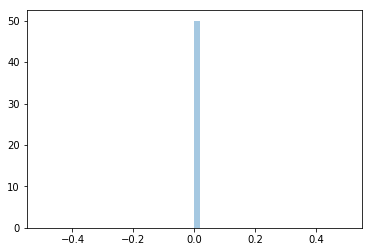

In [63]:
import seaborn as sns
sns.distplot(Xtrain[:,15])

In [82]:
np.unravel_index(np.argmax(Xtrain, axis=None), Xtrain.shape)

(1, 541)

In [83]:
Xtrain[1,541]

1.0

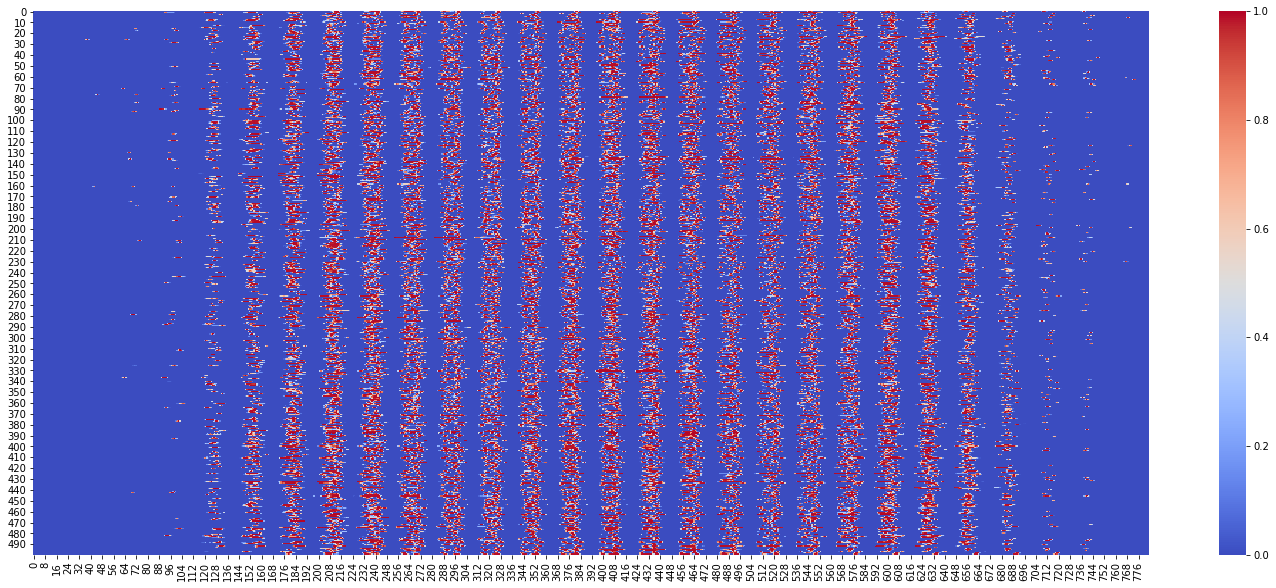

In [98]:
plt.figure(figsize=(25,10))
sns.heatmap(Xtrain,cmap='coolwarm')   #blue spaces are due to each line of image, going to next, since is flattened here

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


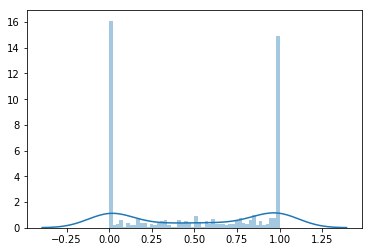

In [95]:
sns.distplot(Xtrain[:,603],bins=50)

In [97]:
print(np.mean(Xtrain[:,603]))
print(np.var(Xtrain[:,603]))

0.5035607843137255
0.18373421816224528


C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


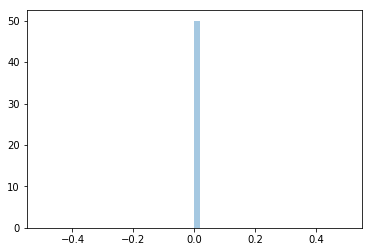

In [99]:
sns.distplot(Xtrain[:,392],bins=50)

In [100]:
 x = np.linspace(norm.ppf(0.01),
...                 norm.ppf(0.99), 100)

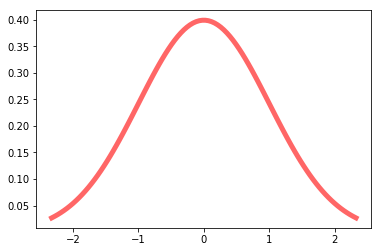

In [102]:
plt.plot(x, norm.pdf(x),
...        'r-', lw=5, alpha=0.6, label='norm pdf')

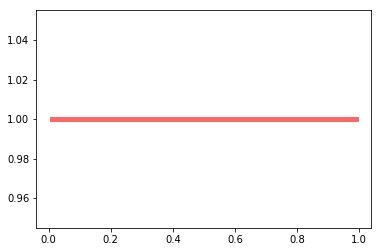

In [106]:
from scipy.stats import uniform
x = np.linspace(uniform.ppf(0.01),uniform.ppf(0.99), 100)
plt.plot(x, uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')

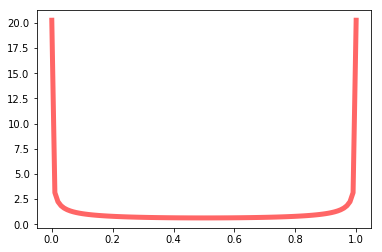

In [8]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
a, b = 0.5, 0.5
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
sns.distplot(Xtrain[:,603],bins=50)

In [50]:
print(beta.fit(Xtrain[:,603]))
a,b,c,d=beta.fit(Xtrain[:,603],loc=0, scale=1)

(0.1918174433361466, 0.18119794797232985, -0.011046942039979154, 1.0110469420399795)


C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-0.01, 1.01)

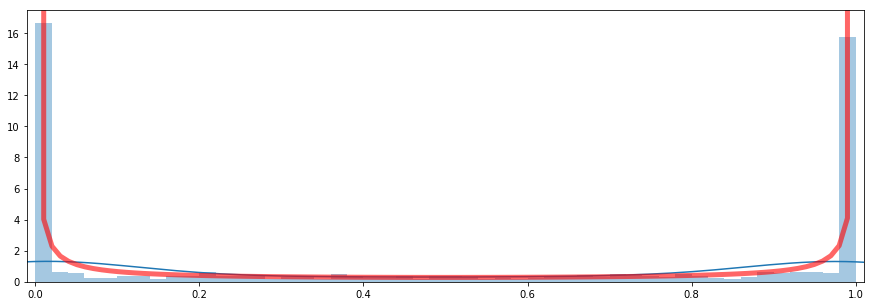

In [51]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.distplot(Xtrain[:,603],bins=50)
x = np.linspace(beta.ppf(0.01, a, b,c,d),beta.ppf(0.99, a, b,c,d), 100)
plt.plot(x, beta.pdf(x, a, b,c,d),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.xlim(-.01,1.01)

0.308954043271695 1.6316007269276036 -3.198095144523431e-32 1.3673159545672715


C:\Users\niava\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:412: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)
C:\Users\niava\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return m4 / m2**2 - 3
C:\Users\niava\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nob

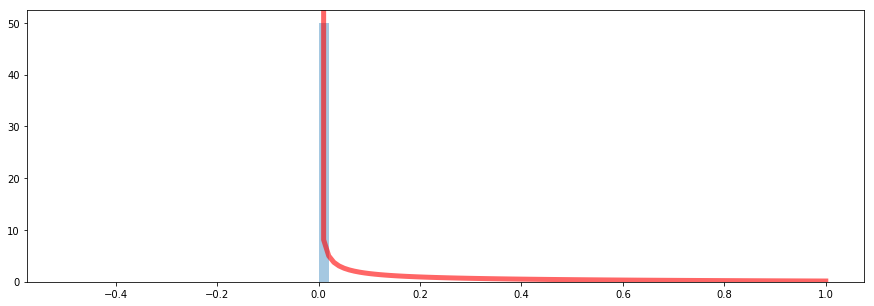

In [49]:
import seaborn as sns
a,b,c,d=beta.fit(Xtrain[:,392],loc=0, scale=1)
print(a,b,c,d)
plt.figure(figsize=(15,5))
sns.distplot(Xtrain[:,392],bins=50)
x = np.linspace(0.0,1.0,100)
plt.plot(x, beta.pdf(x, a, b,c,d),'r-', lw=5, alpha=0.6, label='beta pdf')
#plt.xlim(-.01,1.01)

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


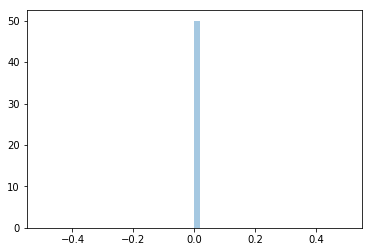

In [21]:
sns.distplot(Xtrain[:,392],bins=50)

In [66]:
beta.fit(Xtrain,loc=0,scale=1)

C:\Users\niava\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.029133122772868603,
 0.17602069817593474,
 0.00037481407367071325,
 0.9996251859263294)

In [63]:
alpha_=[]
beta_=[]
c1_=[]
d1_=[]

for i in range(np.shape(Xtrain)[1]):
    
    a,b,c,d=beta.fit(Xtrain[:,i])

    alpha_.append(a)
    beta_.append(b)
    c1_.append(c)
    d1_.append(d)

C:\Users\niava\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:412: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)
C:\Users\niava\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:423: RuntimeWarning: invalid value encountered in double_scalars
  return m4 / m2**2 - 3
C:\Users\niava\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\niava\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\niava\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(m

In [57]:
np.shape(alpha_)

(784,)

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


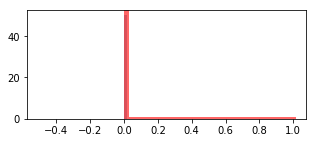

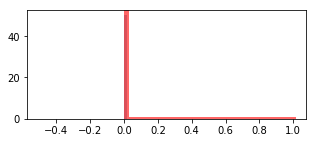

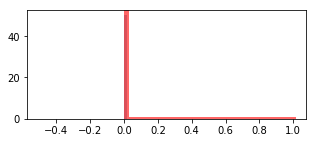

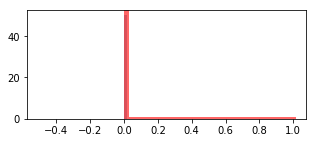

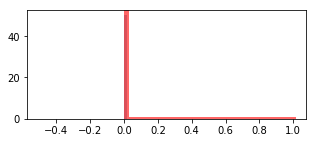

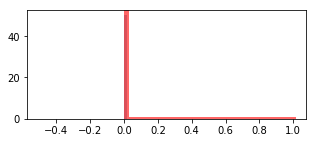

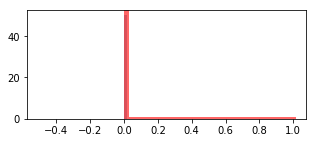

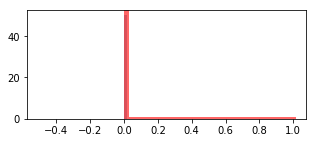

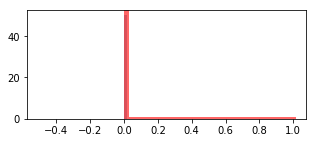

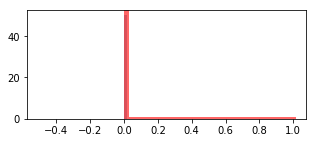

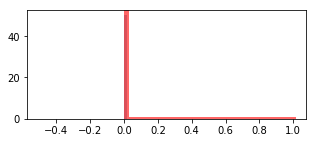

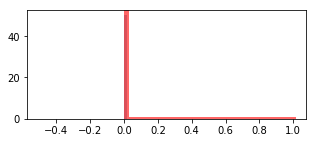

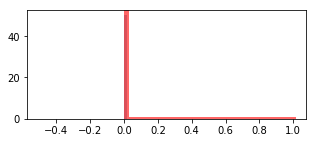

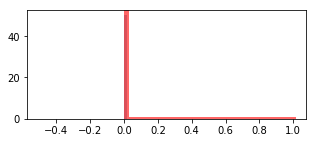

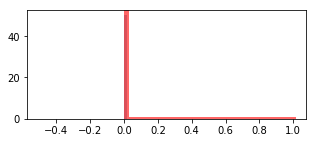

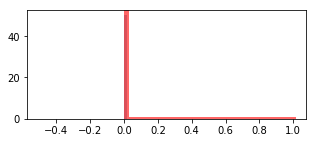

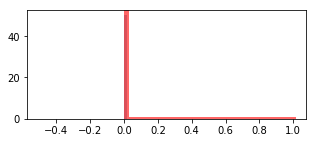

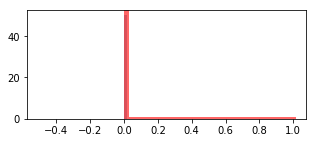

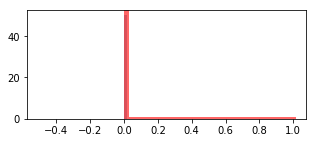

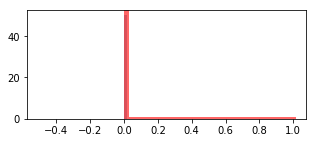

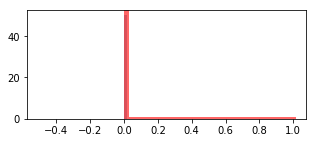

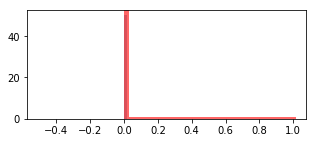

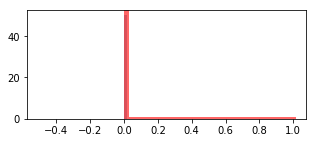

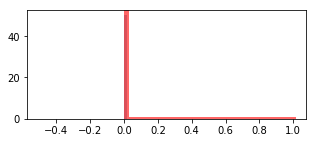

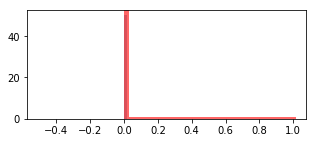

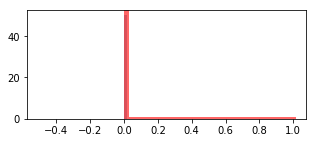

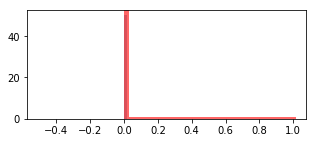

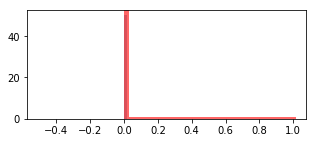

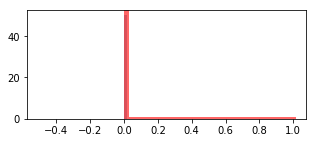

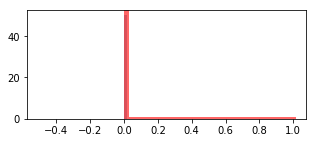

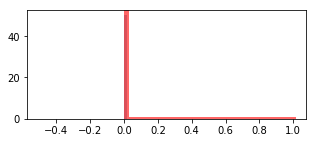

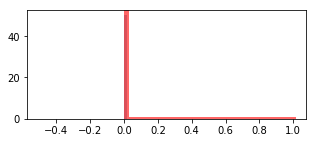

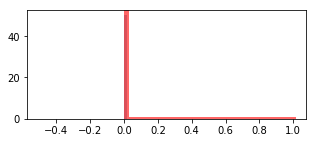

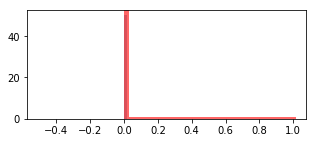

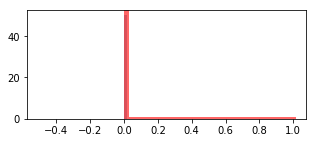

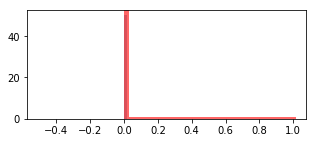

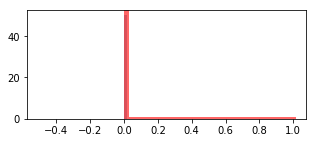

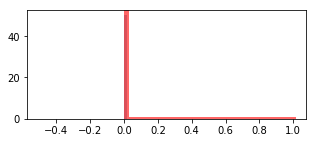

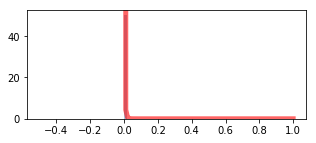

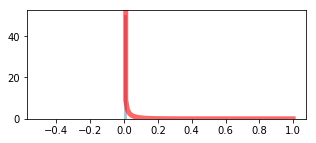

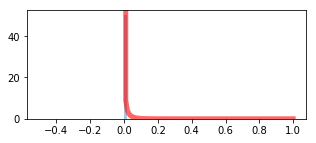

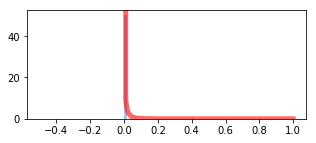

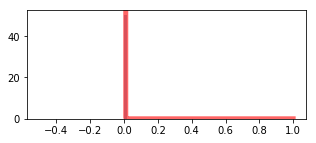

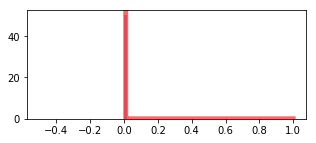

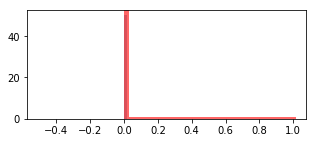

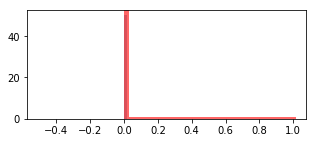

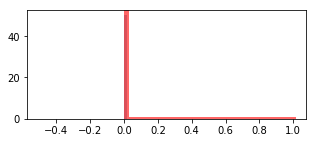

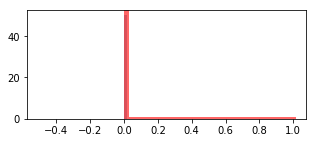

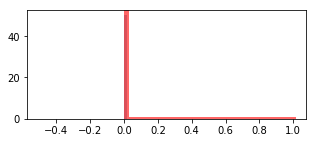

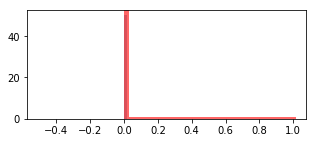

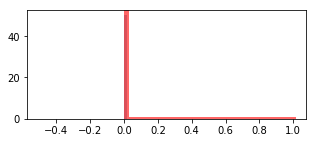

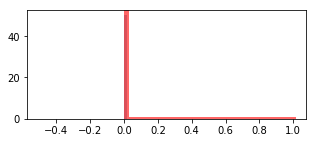

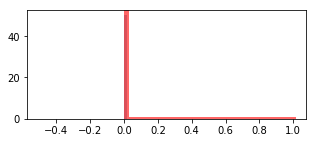

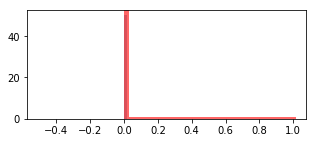

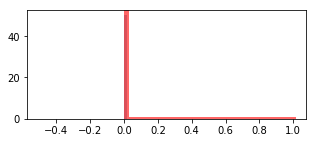

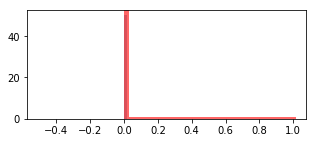

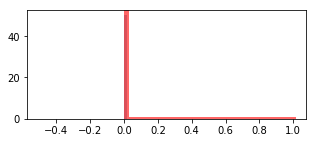

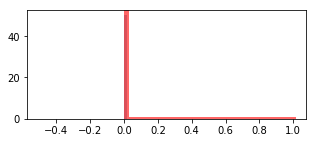

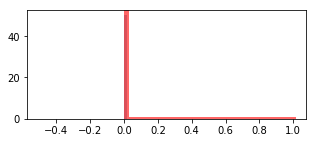

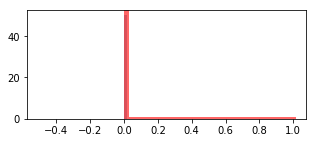

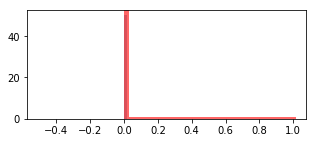

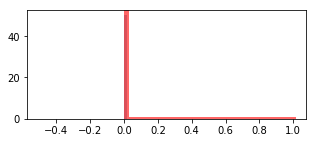

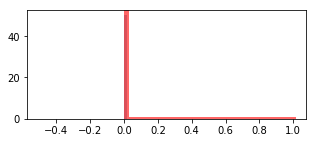

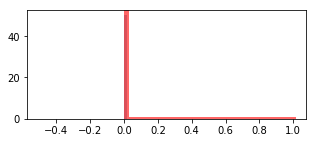

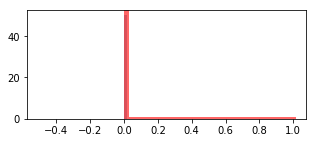

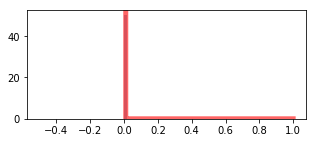

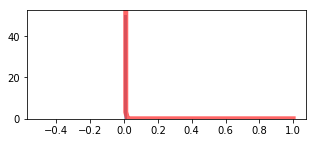

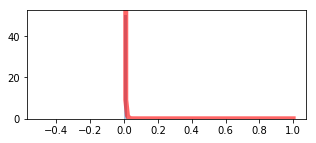

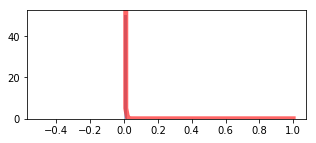

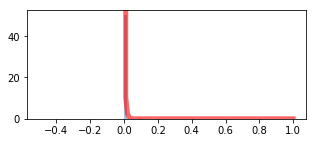

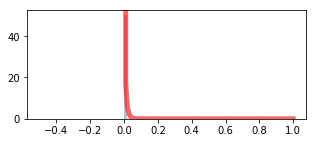

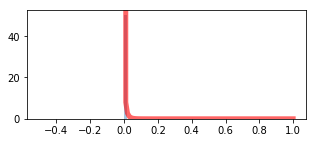

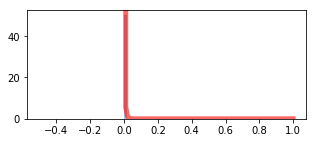

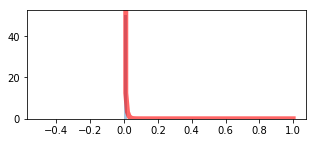

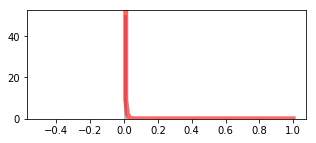

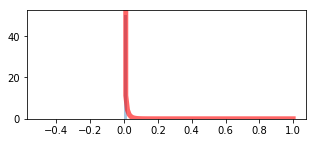

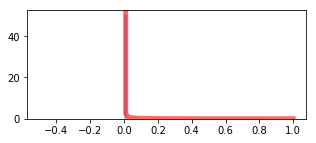

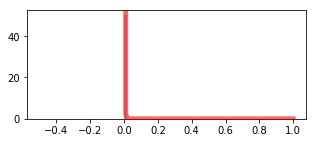

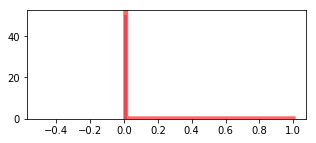

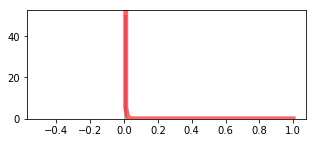

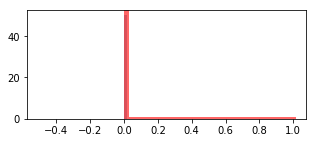

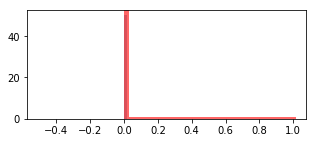

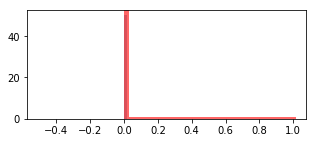

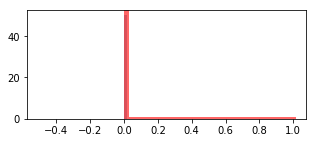

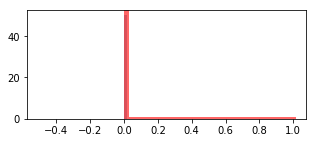

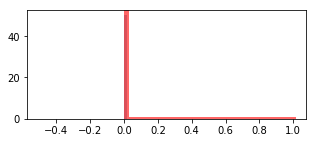

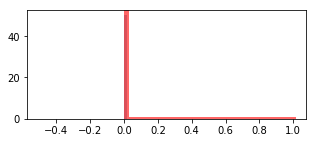

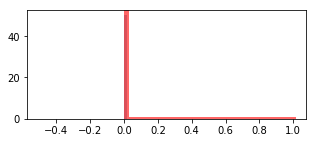

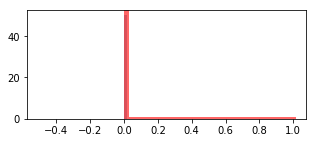

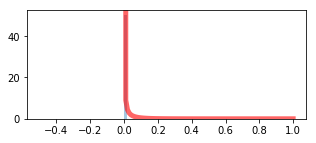

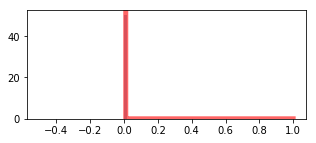

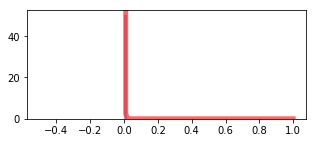

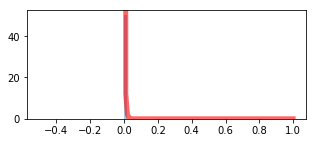

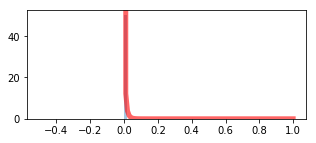

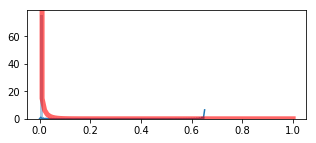

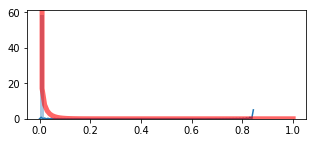

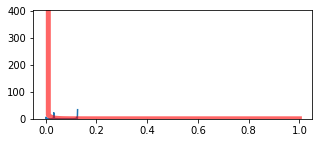

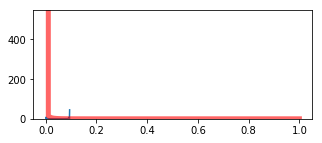

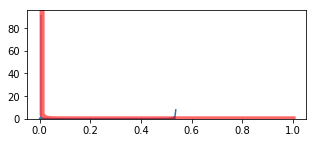

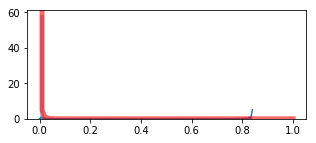

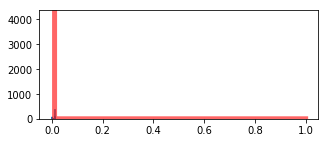

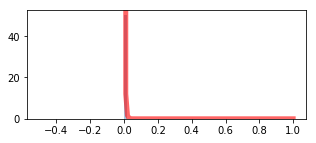

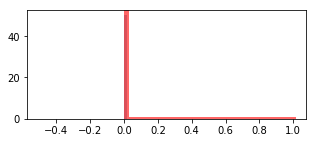

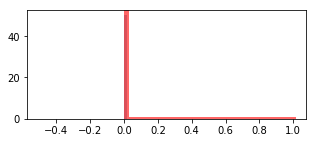

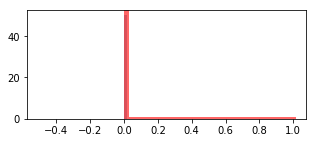

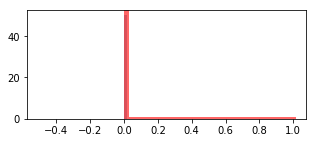

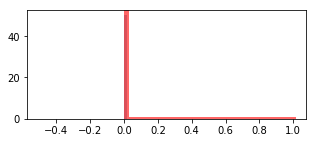

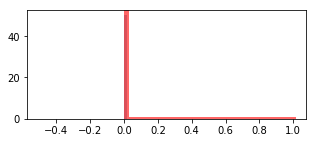

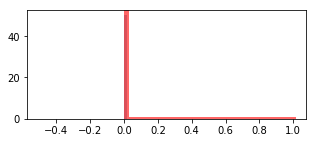

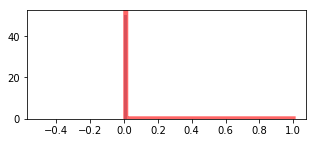

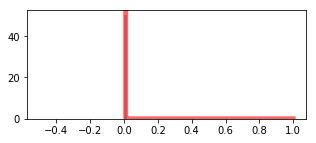

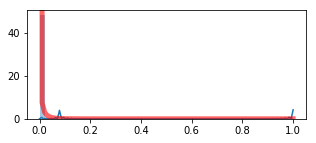

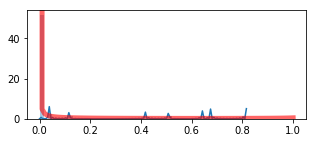

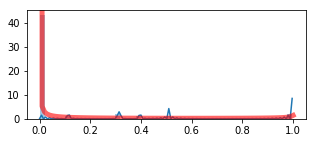

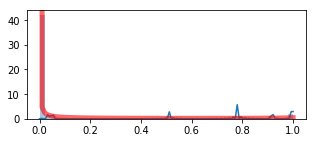

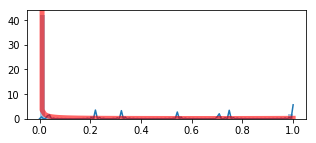

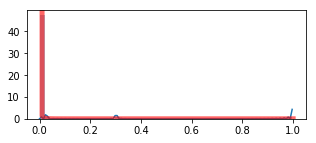

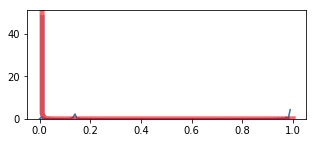

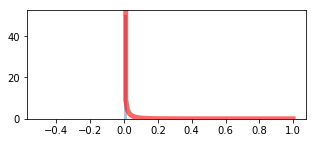

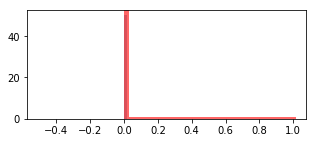

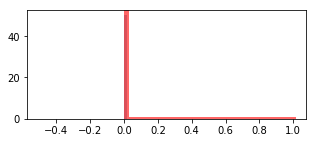

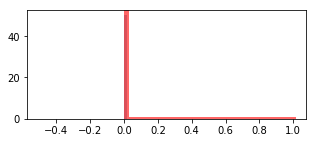

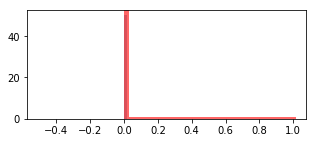

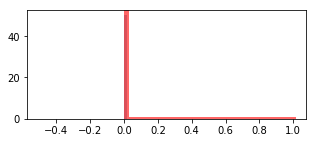

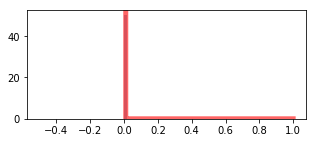

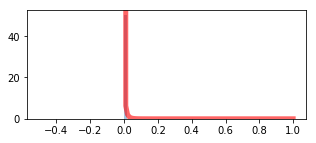

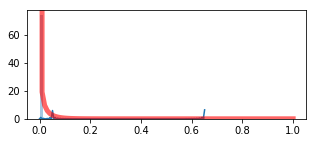

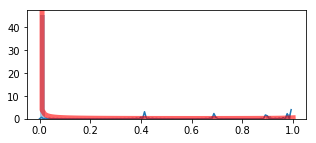

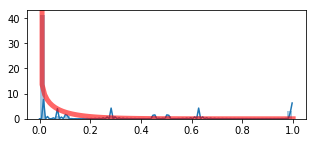

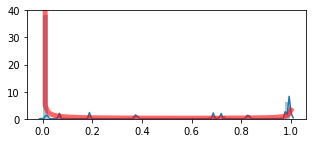

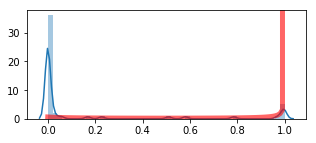

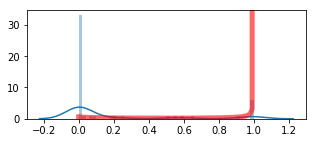

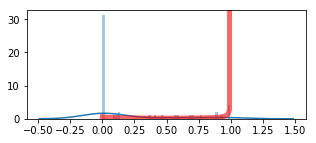

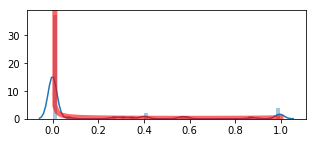

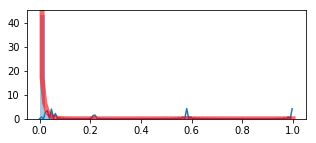

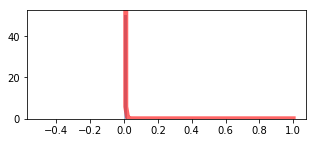

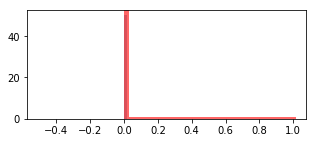

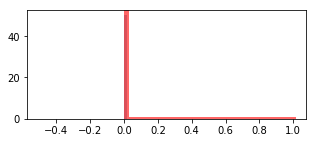

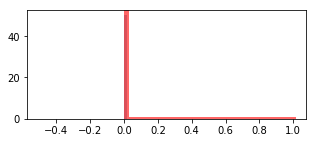

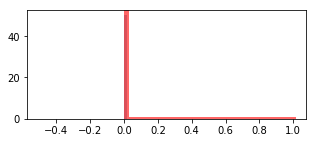

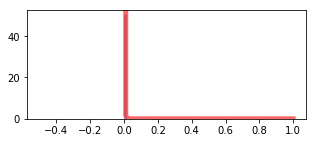

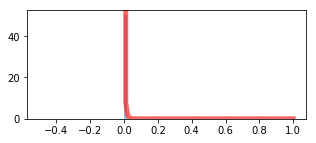

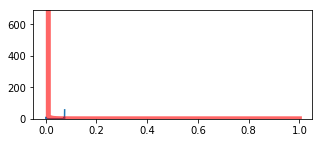

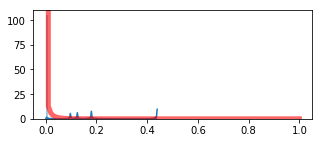

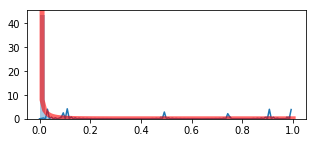

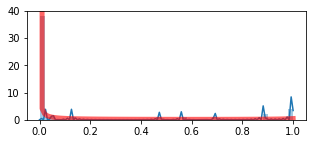

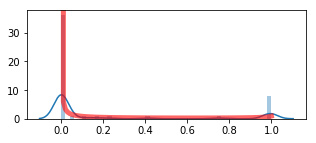

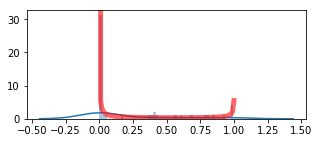

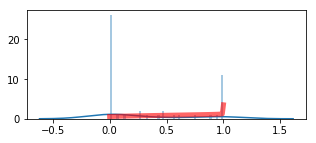

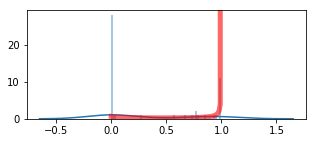

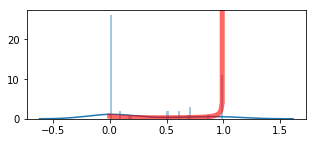

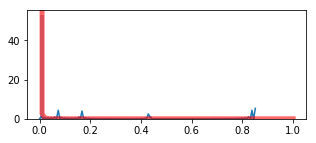

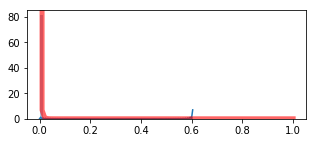

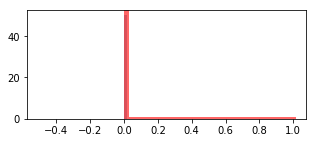

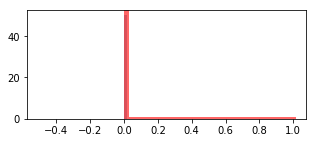

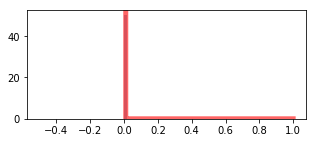

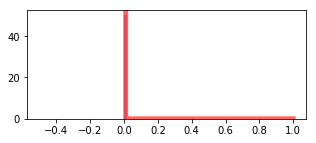

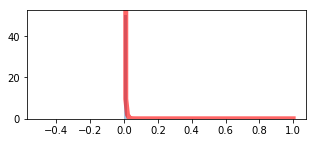

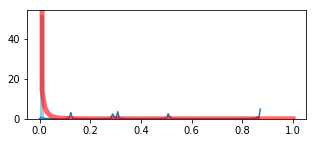

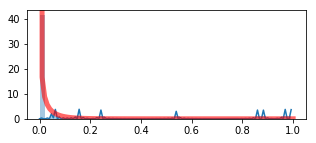

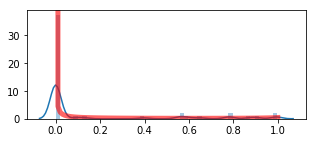

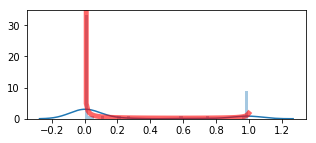

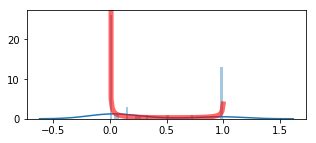

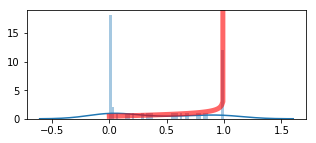

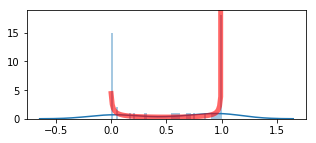

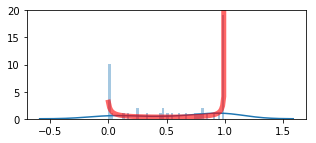

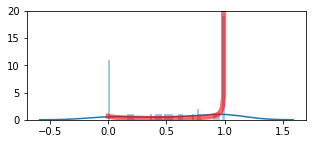

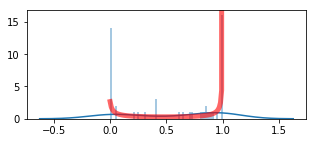

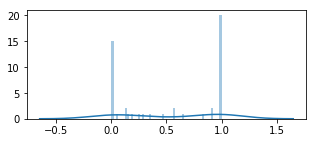

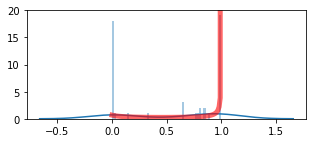

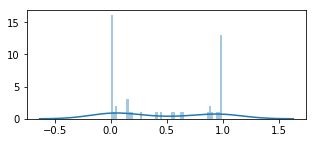

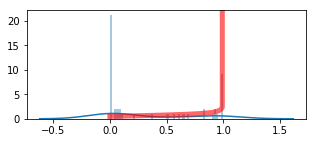

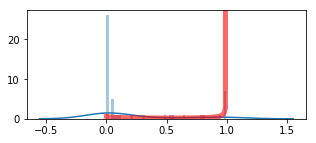

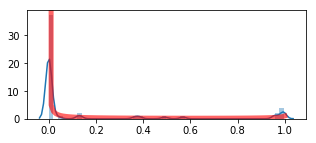

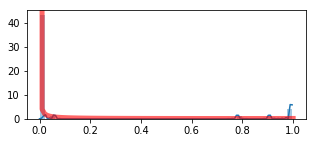

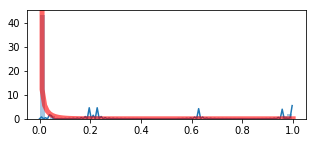

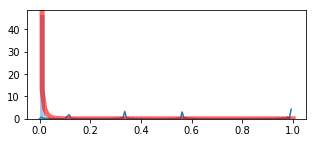

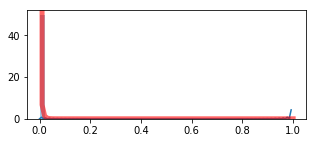

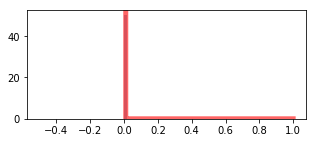

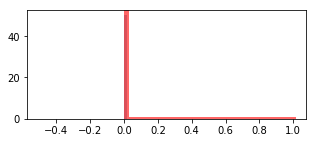

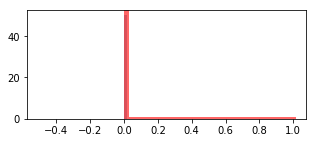

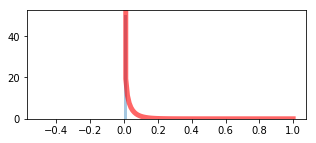

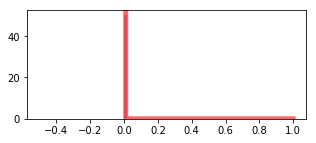

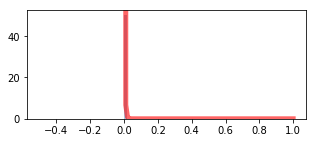

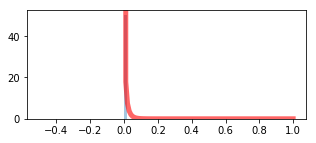

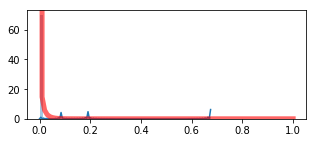

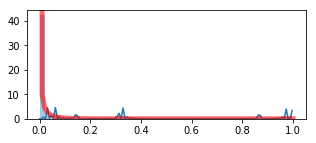

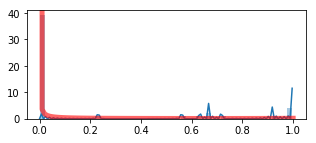

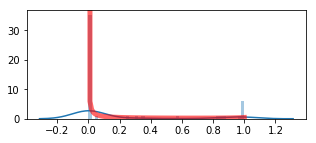

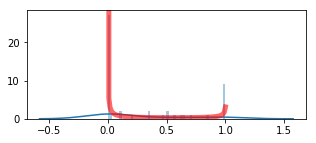

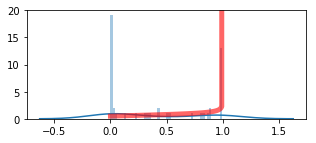

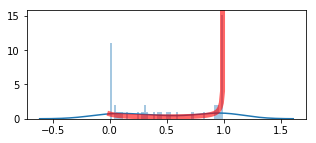

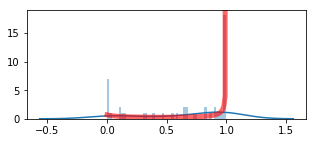

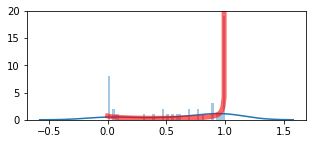

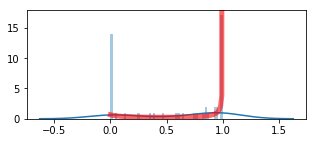

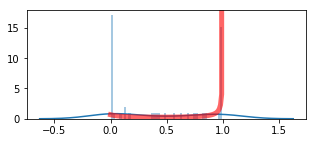

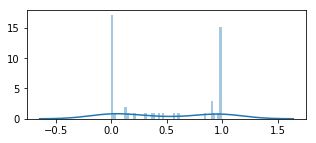

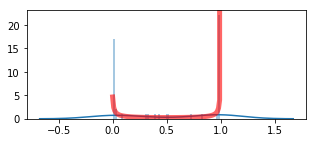

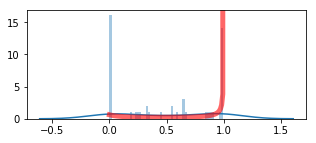

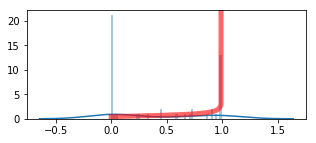

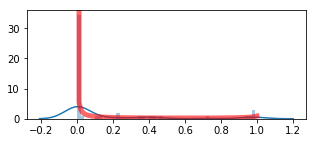

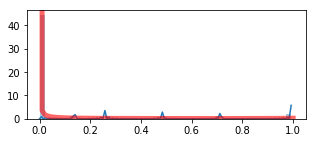

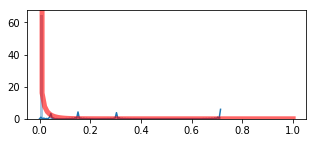

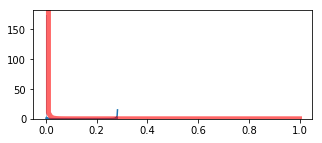

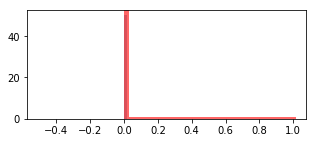

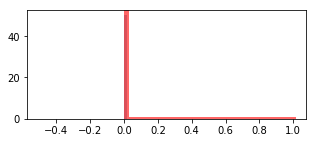

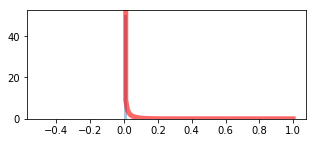

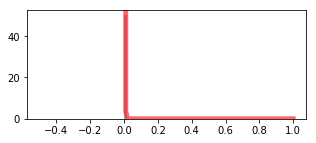

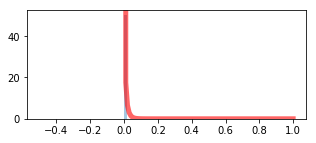

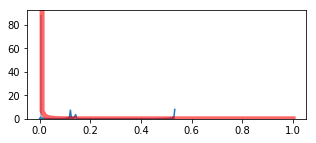

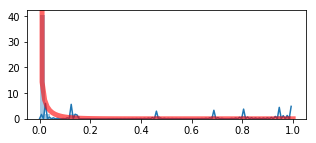

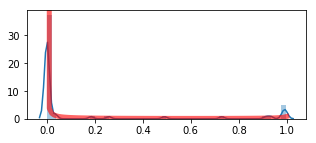

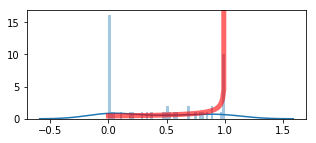

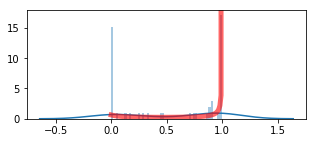

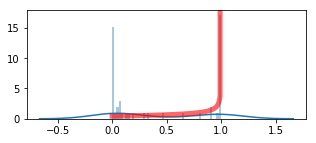

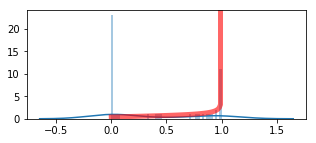

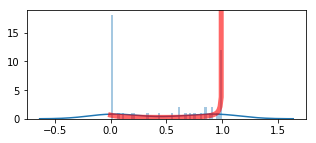

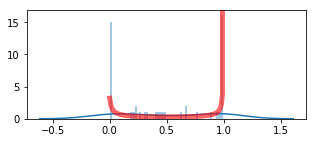

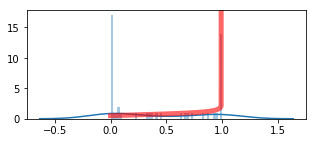

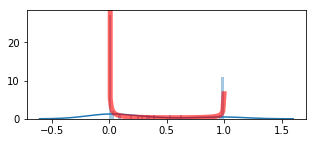

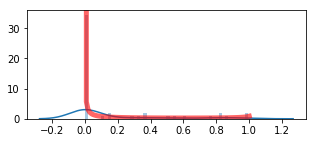

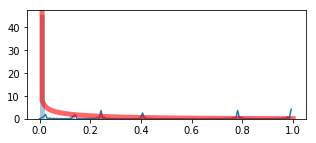

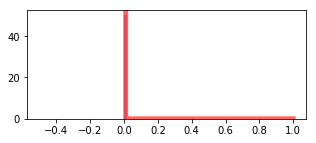

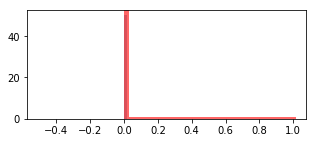

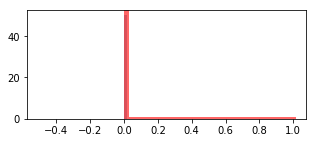

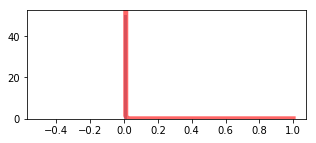

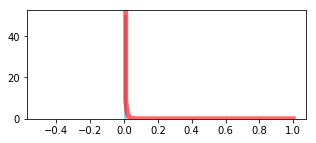

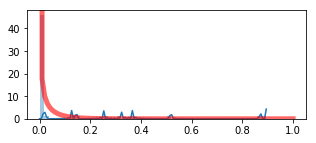

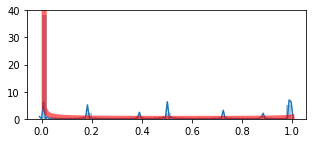

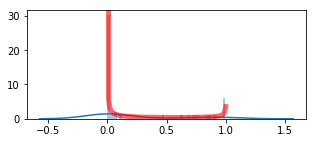

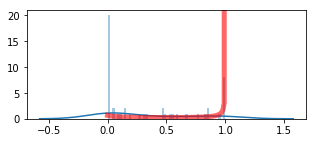

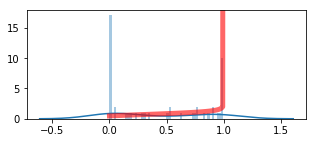

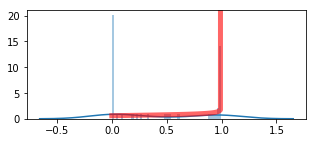

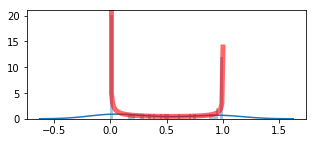

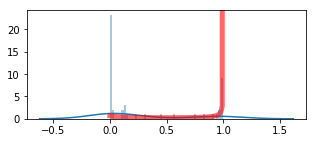

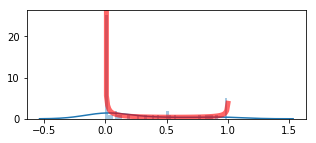

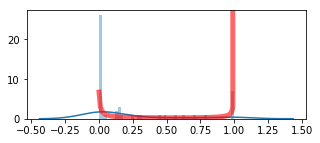

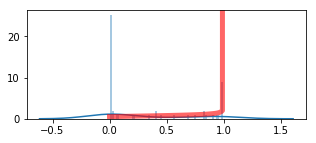

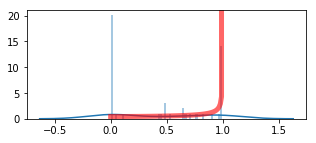

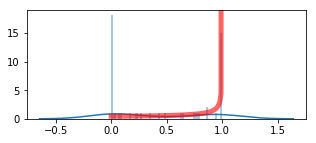

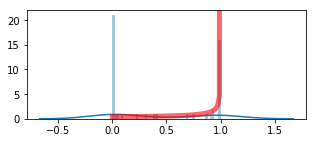

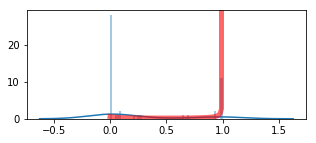

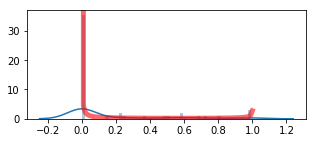

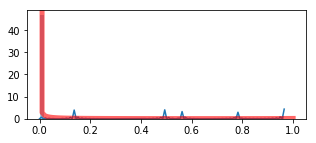

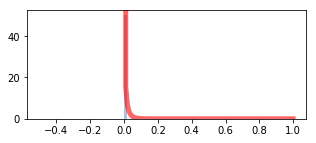

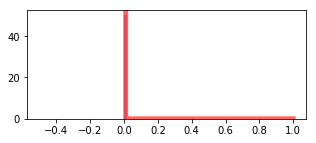

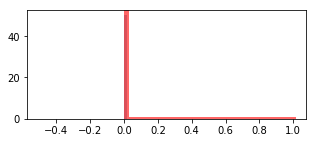

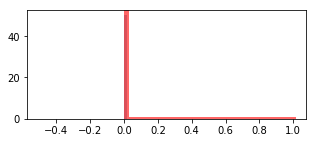

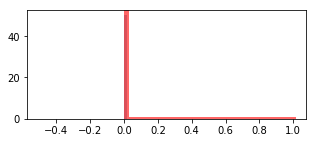

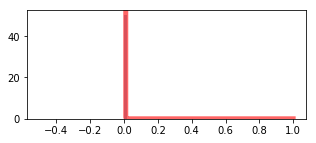

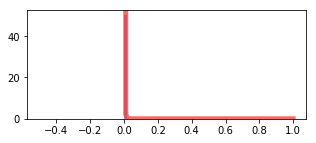

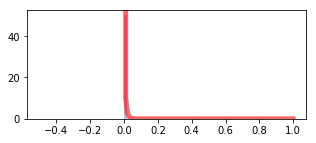

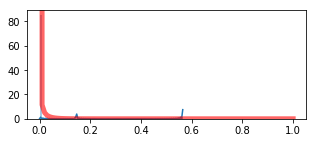

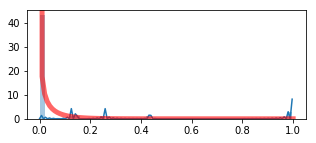

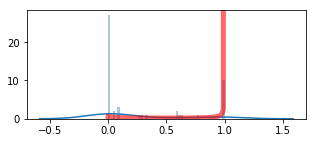

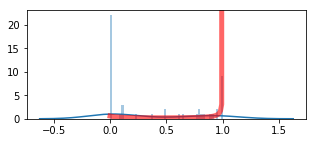

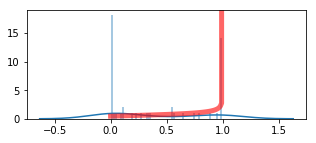

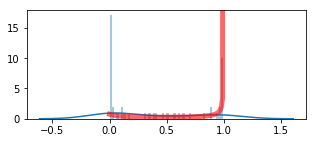

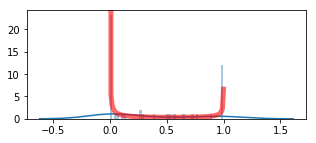

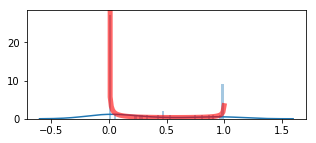

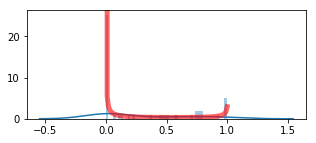

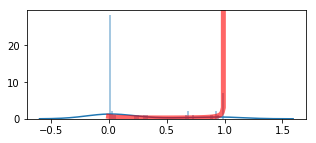

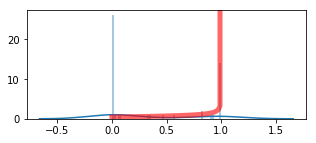

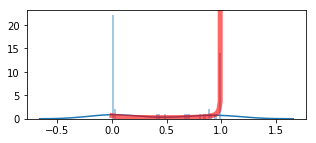

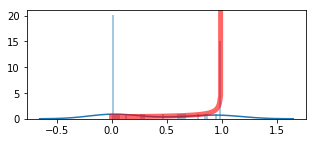

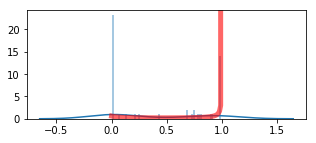

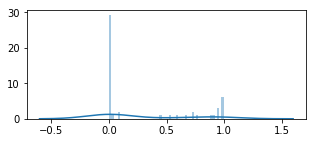

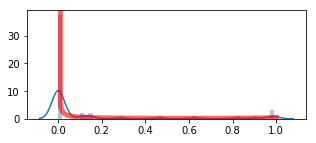

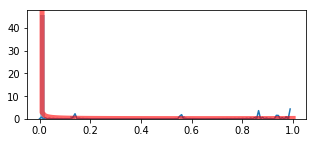

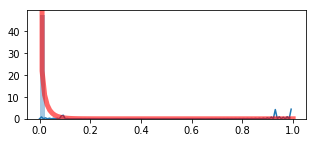

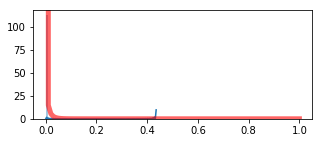

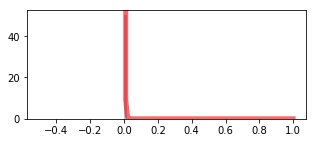

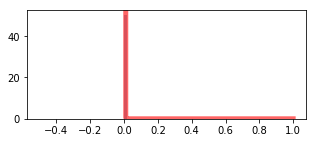

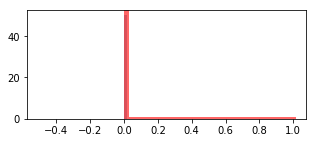

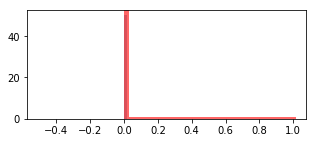

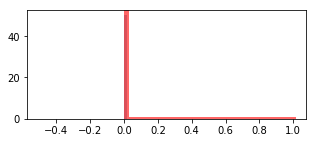

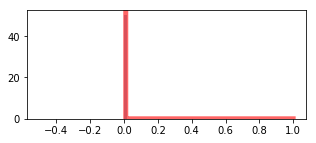

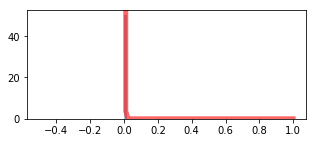

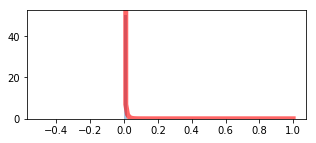

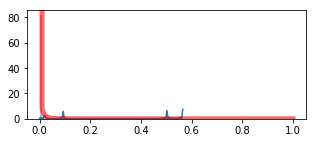

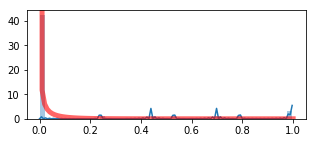

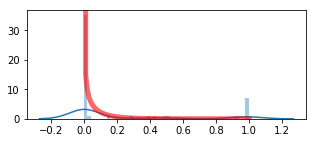

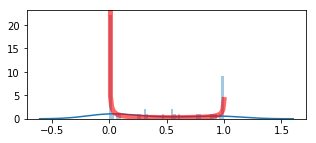

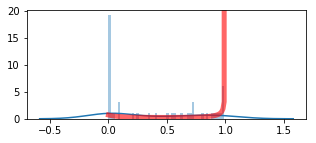

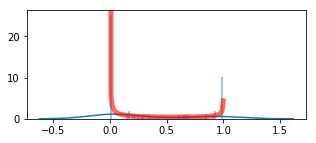

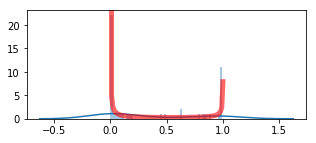

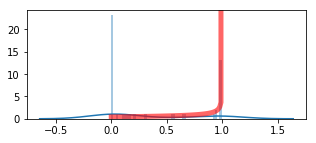

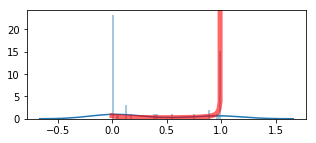

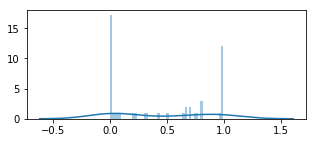

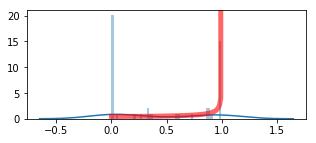

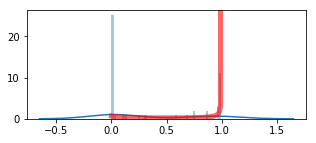

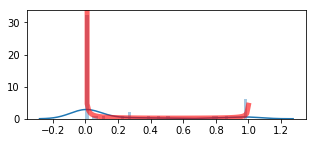

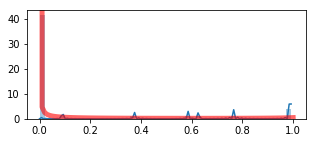

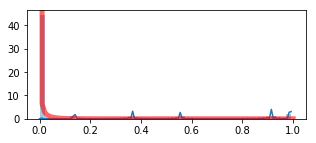

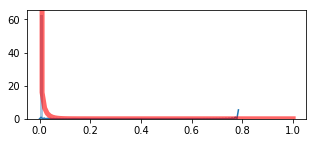

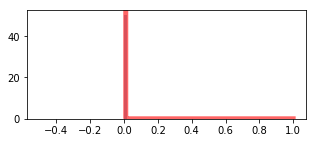

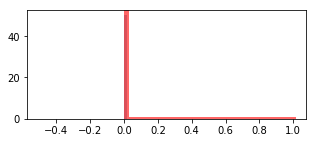

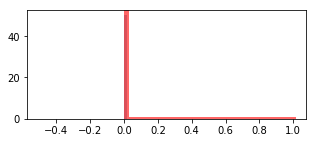

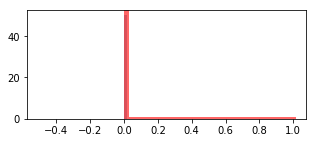

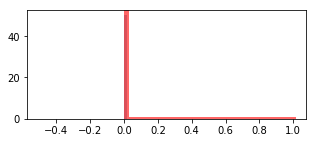

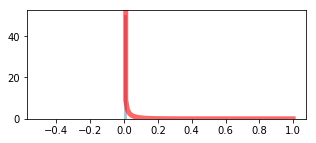

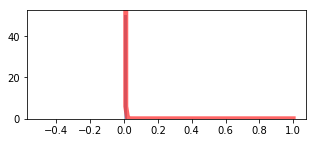

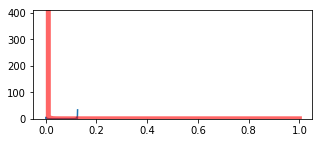

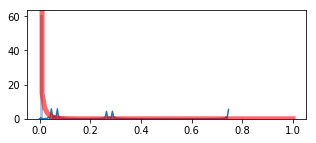

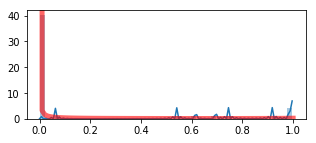

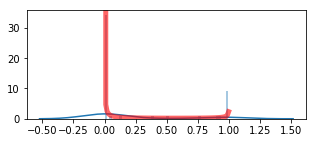

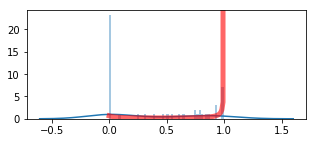

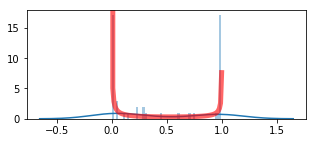

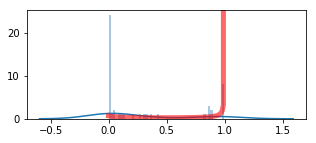

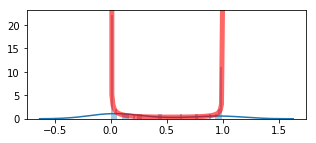

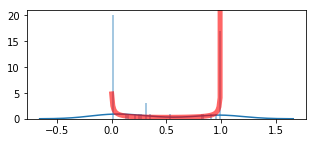

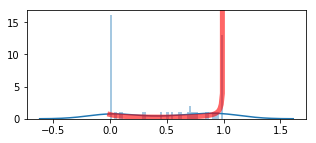

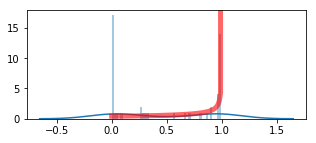

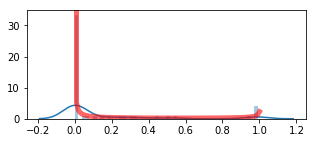

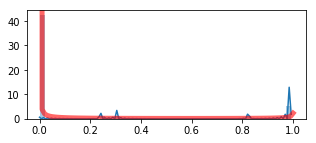

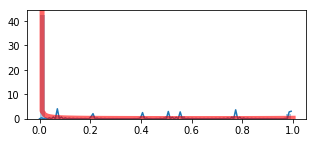

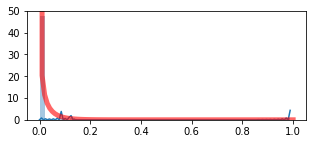

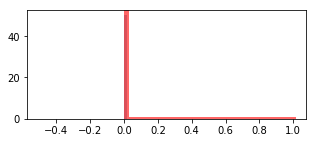

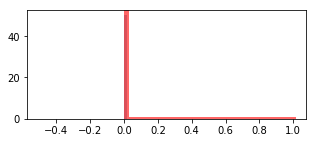

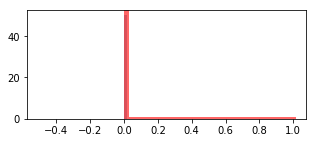

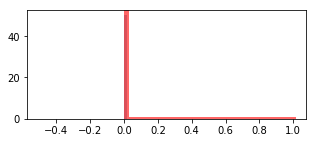

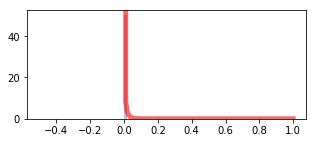

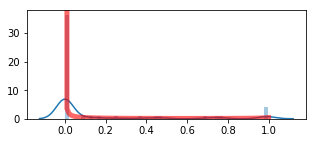

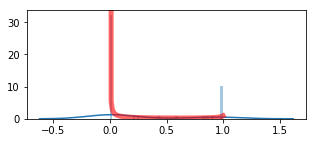

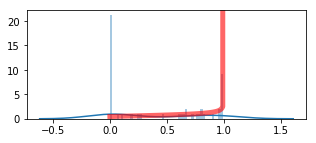

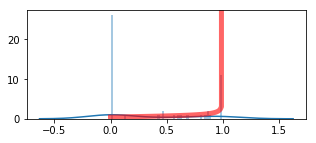

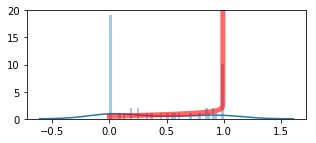

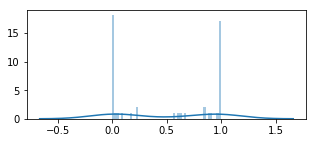

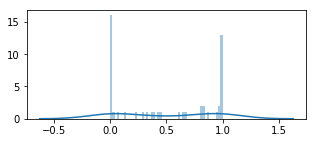

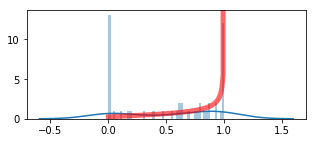

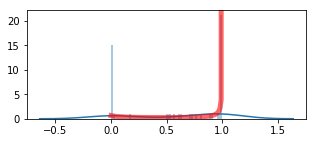

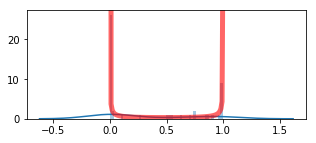

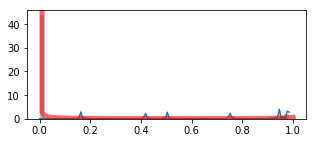

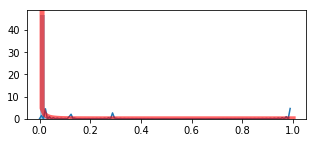

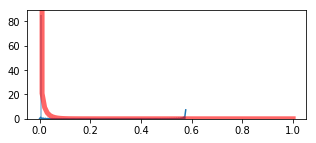

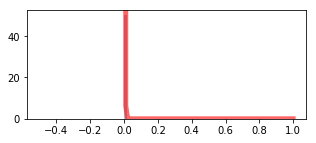

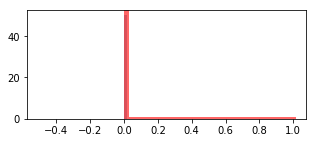

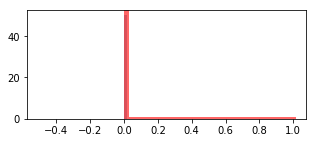

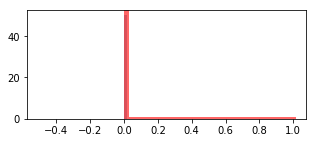

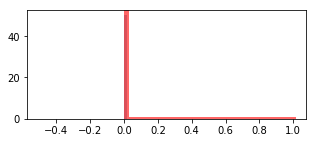

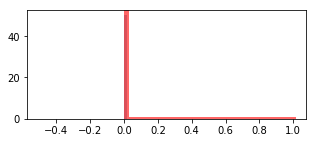

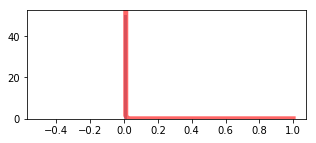

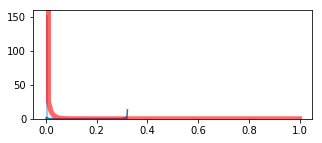

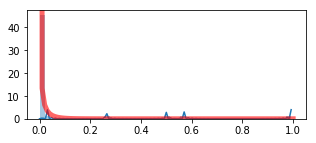

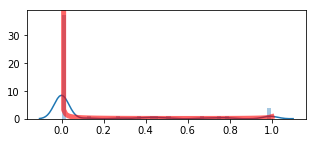

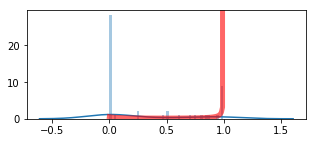

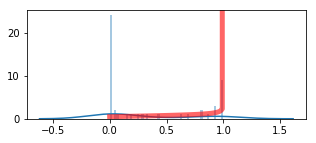

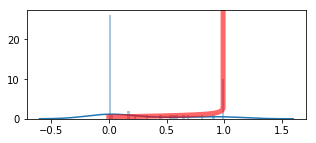

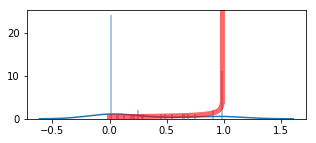

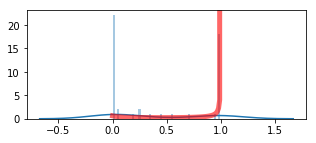

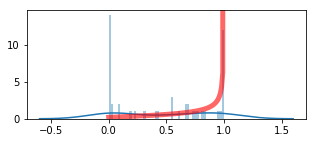

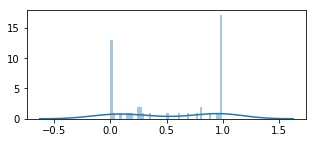

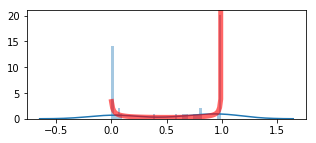

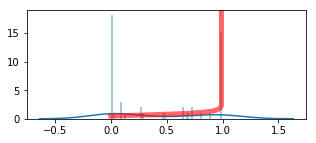

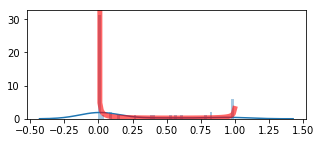

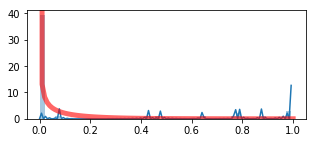

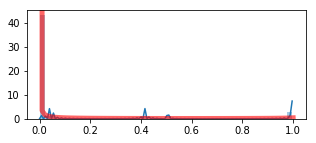

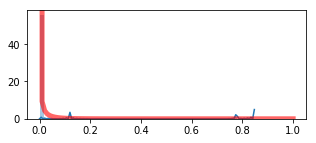

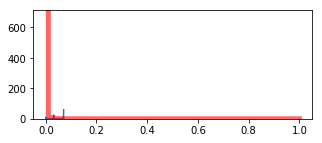

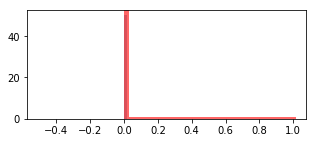

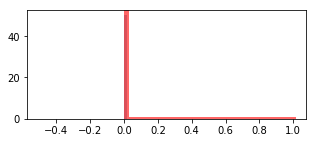

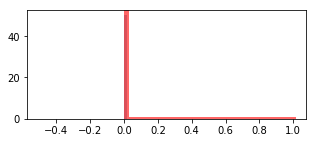

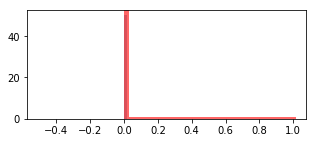

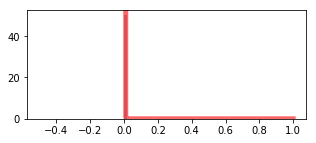

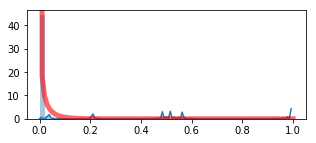

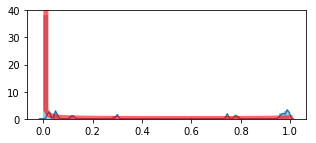

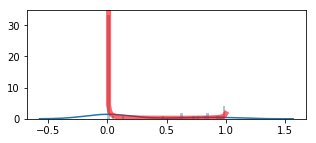

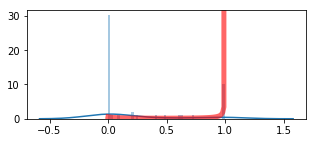

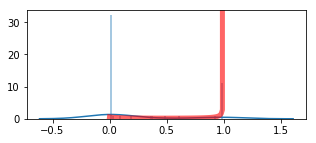

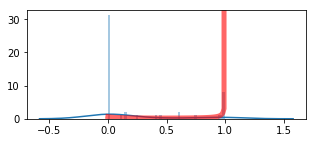

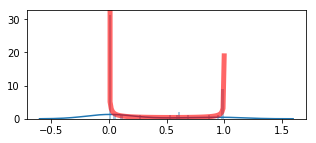

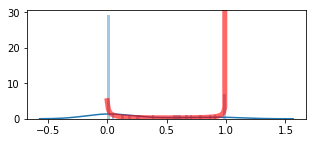

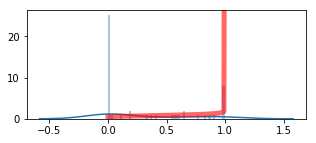

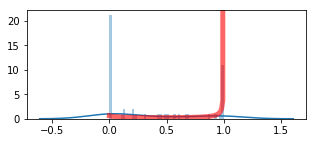

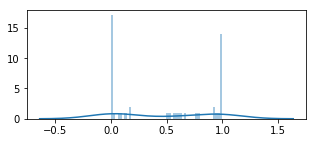

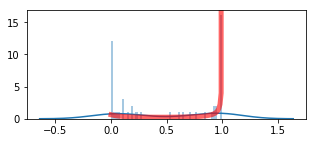

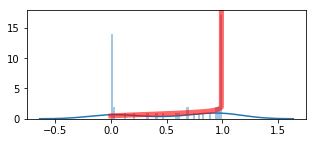

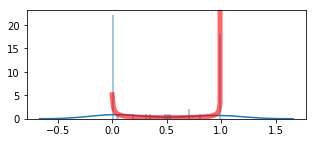

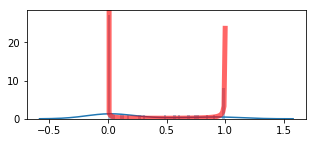

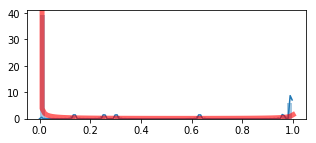

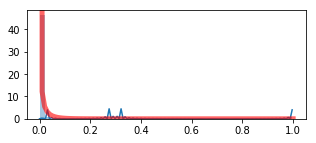

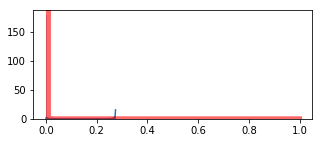

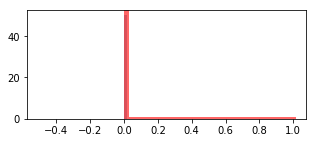

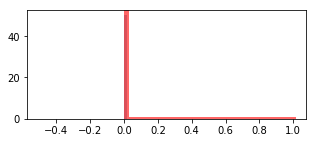

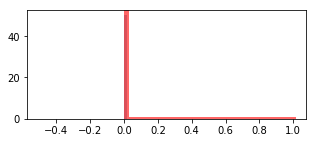

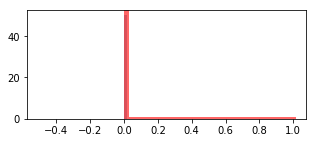

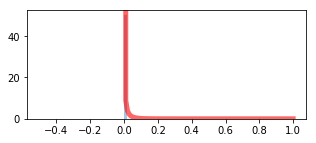

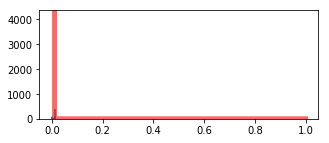

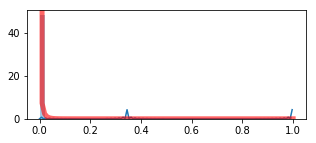

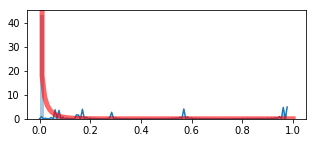

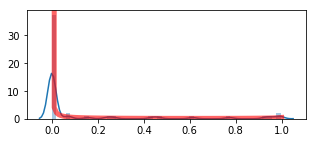

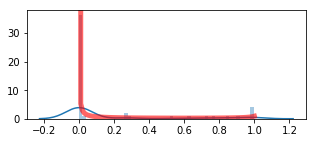

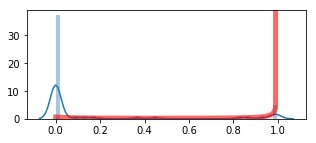

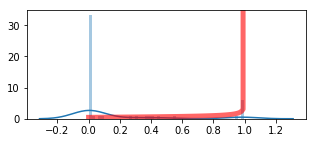

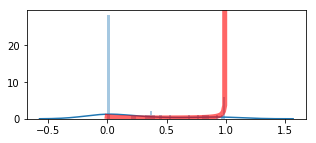

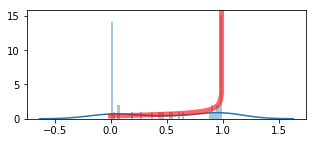

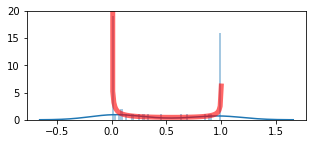

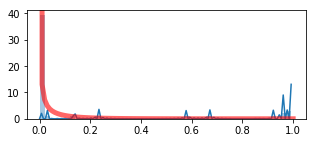

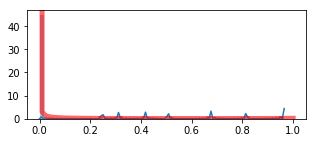

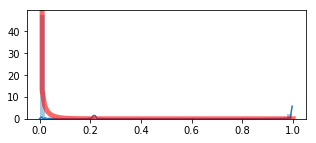

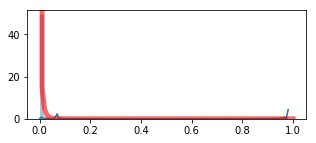

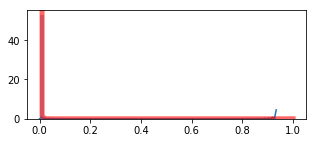

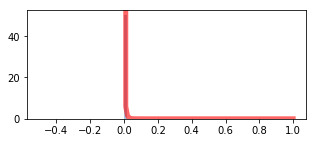

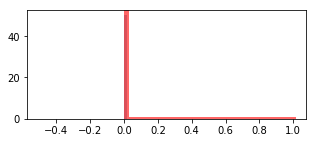

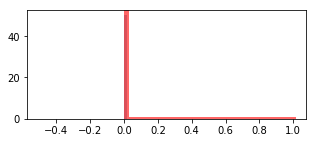

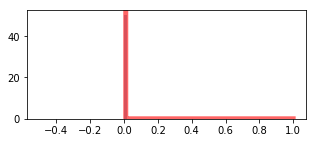

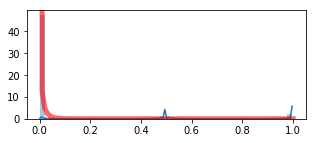

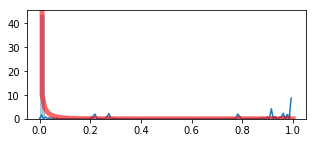

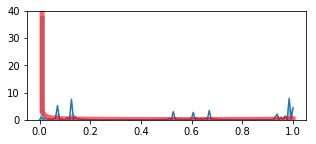

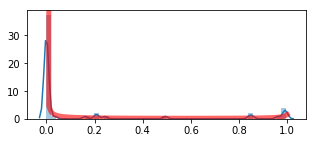

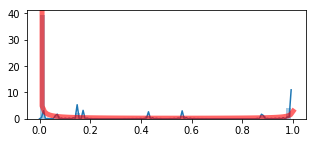

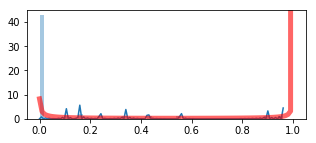

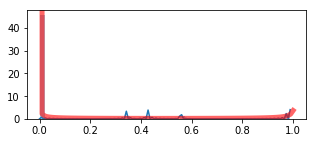

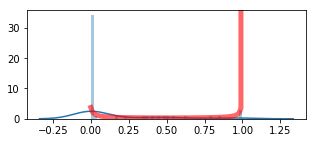

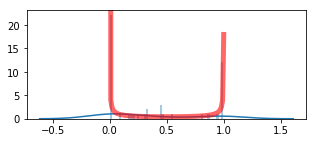

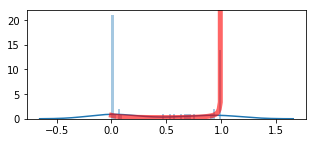

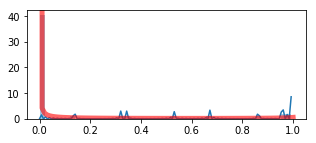

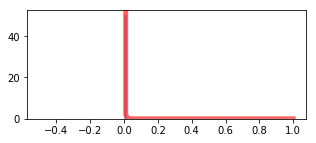

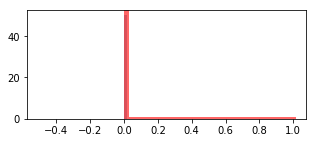

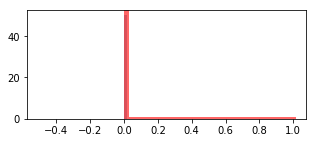

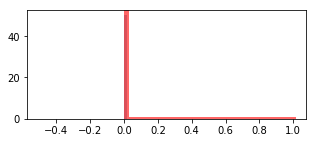

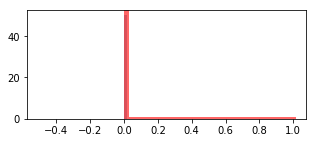

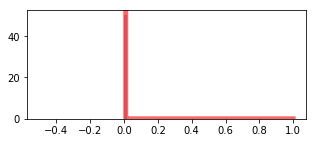

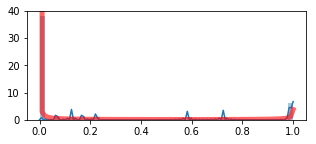

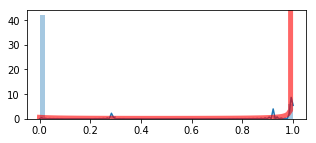

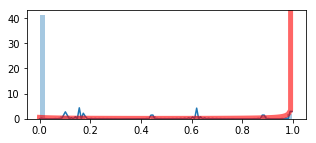

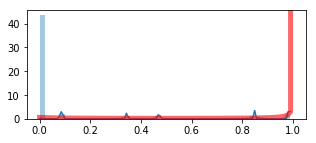

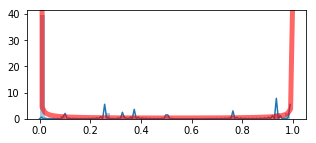

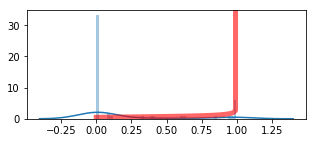

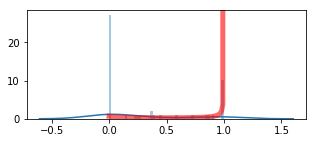

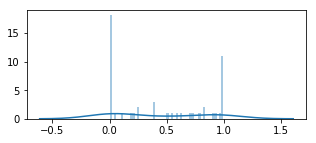

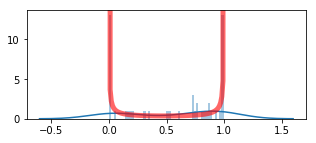

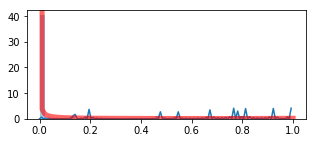

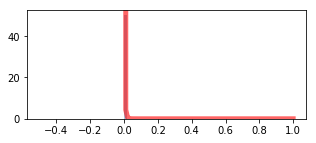

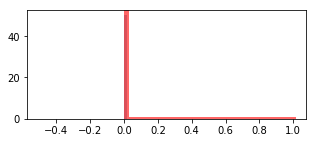

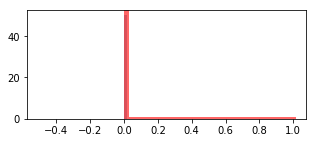

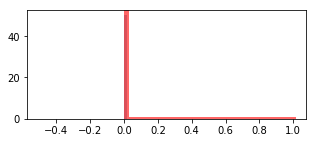

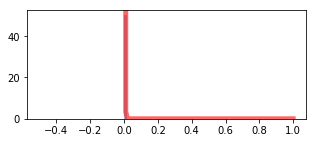

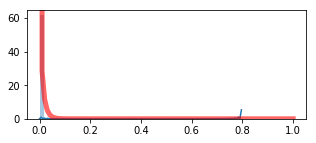

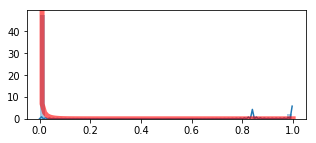

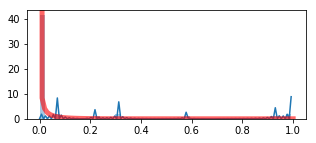

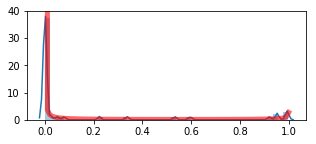

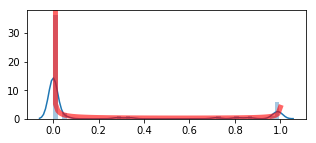

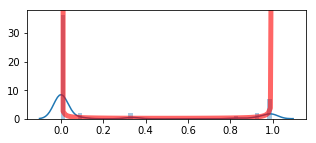

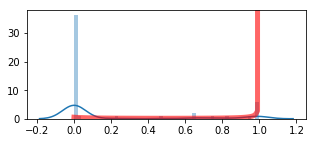

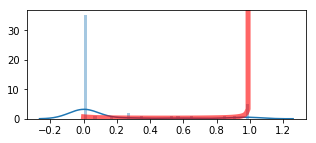

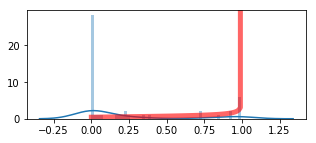

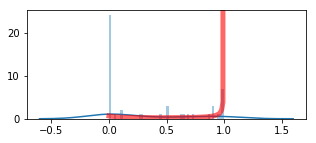

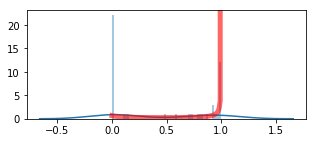

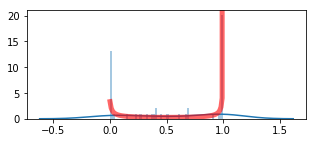

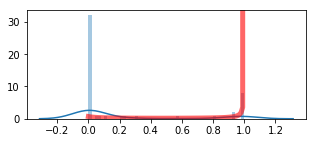

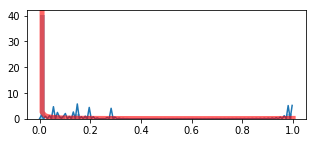

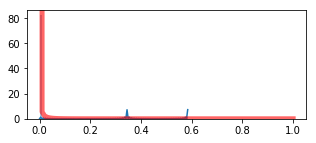

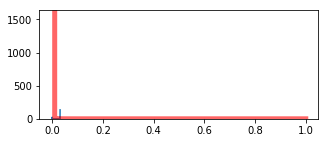

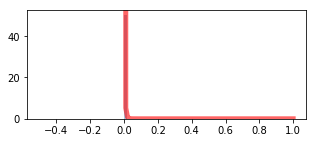

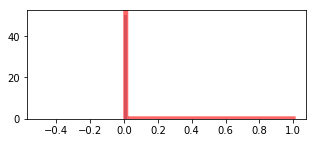

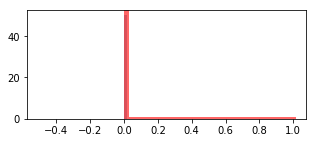

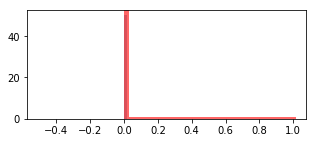

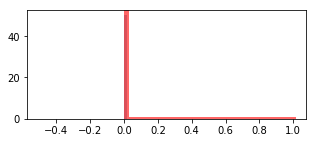

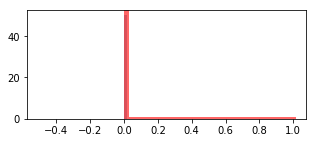

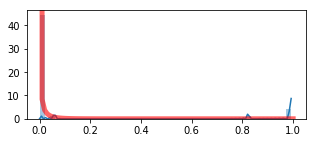

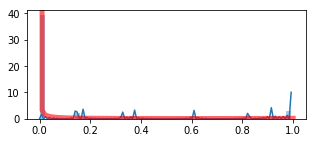

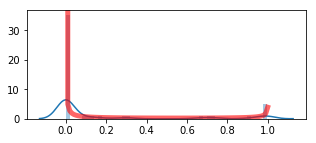

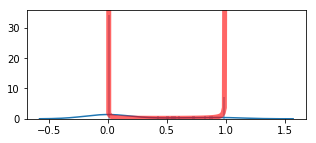

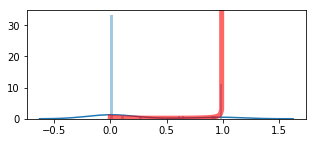

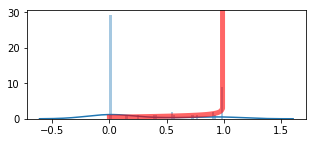

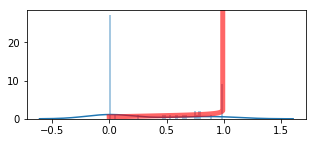

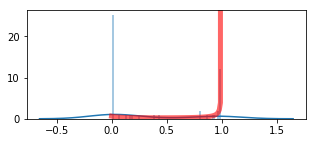

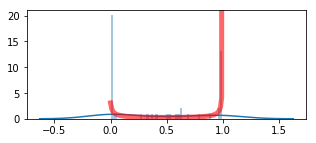

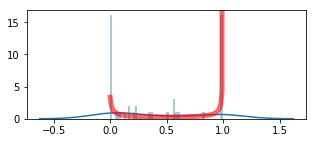

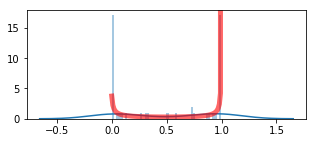

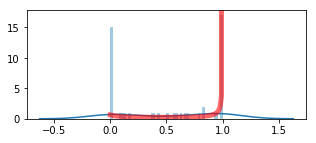

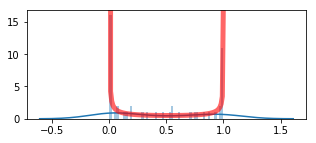

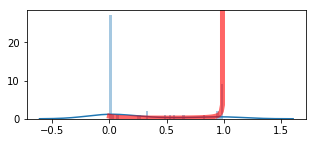

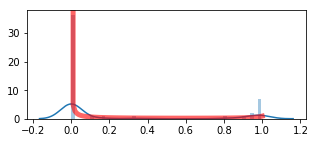

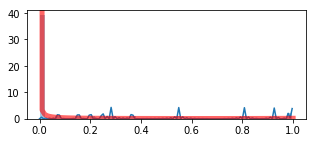

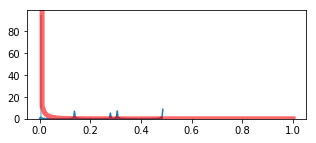

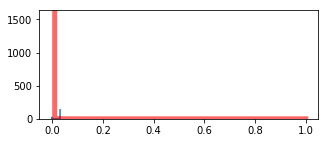

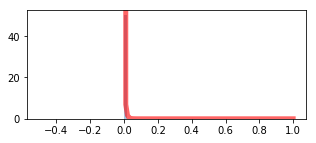

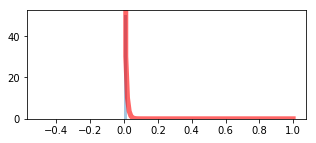

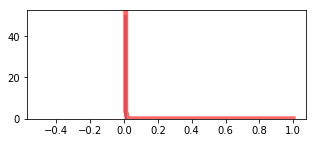

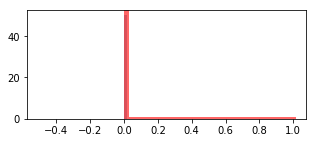

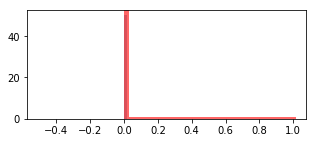

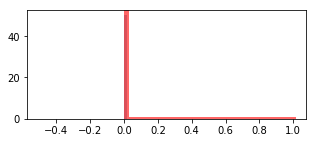

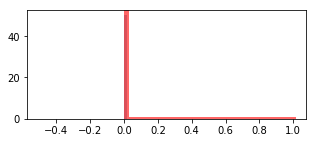

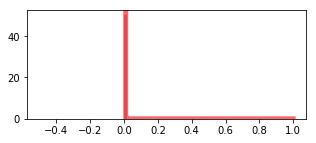

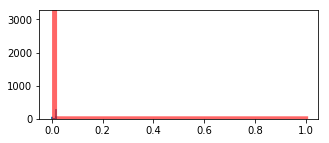

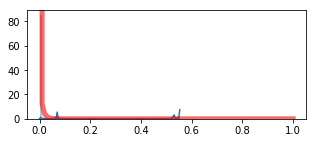

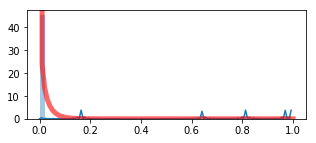

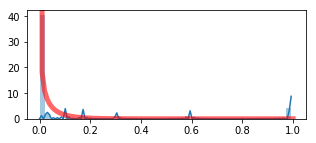

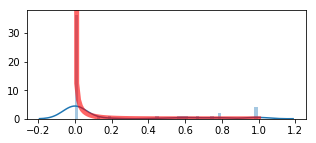

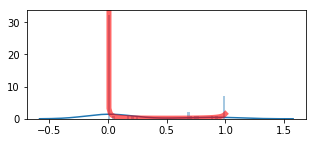

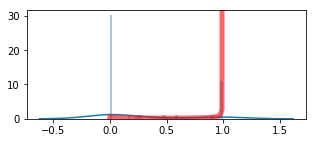

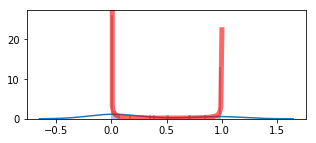

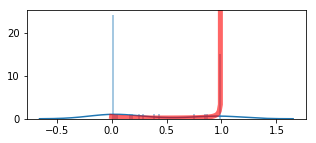

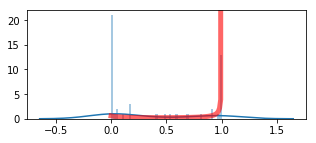

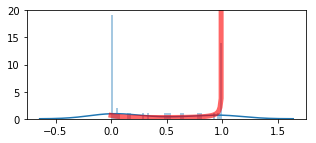

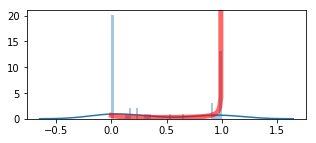

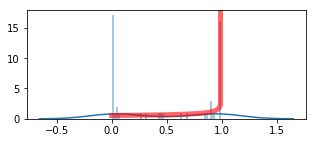

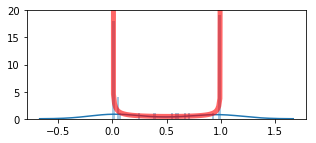

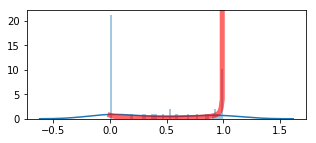

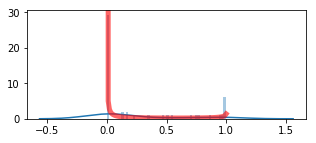

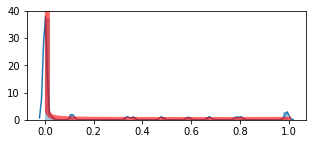

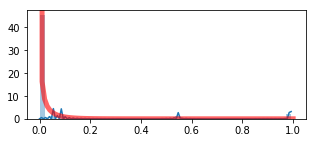

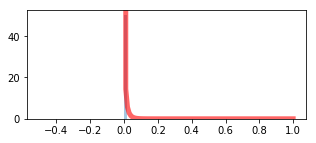

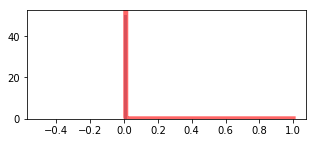

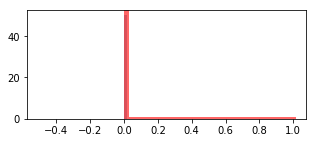

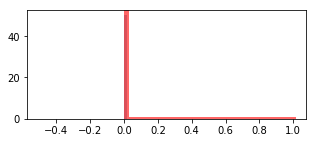

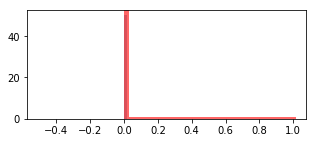

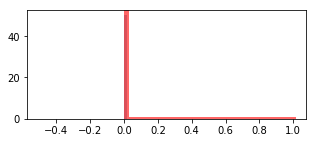

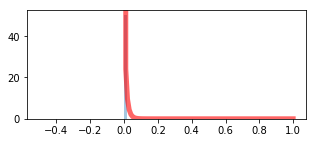

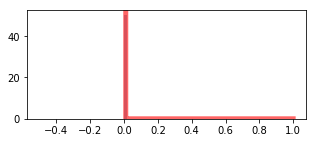

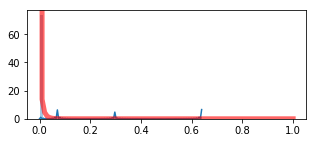

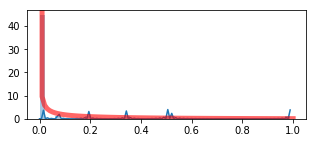

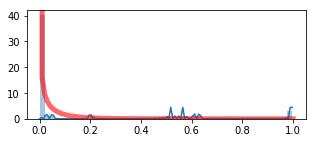

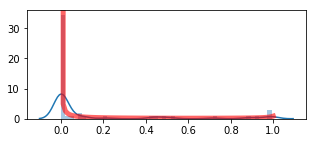

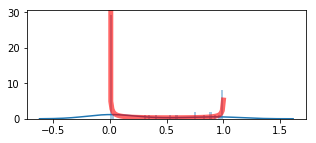

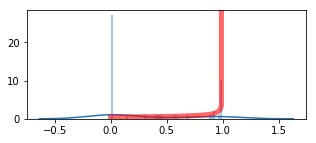

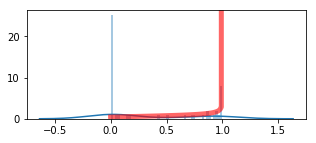

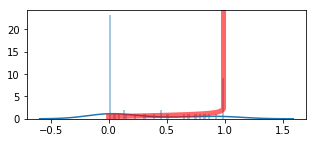

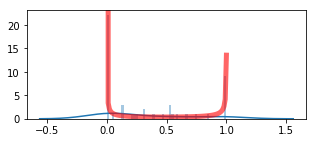

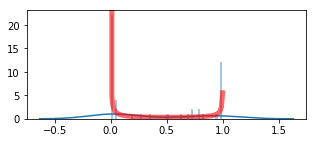

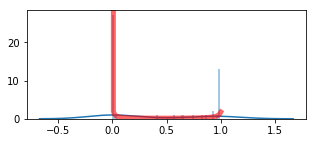

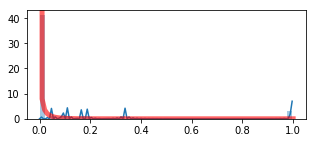

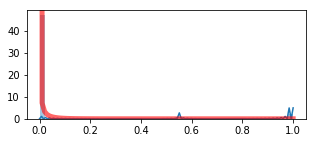

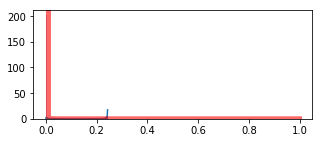

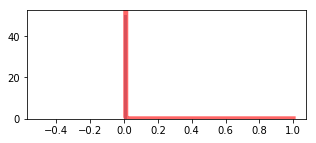

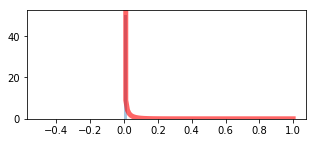

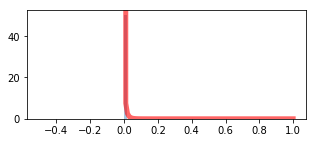

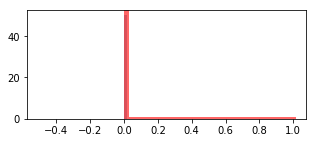

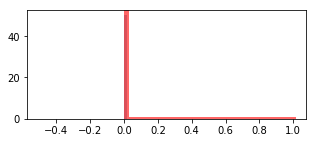

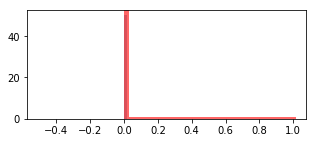

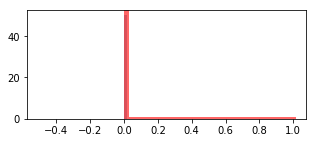

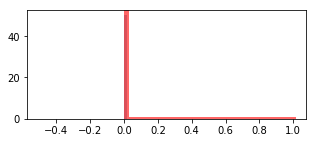

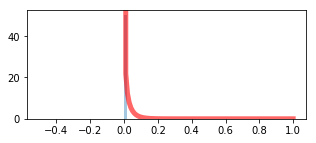

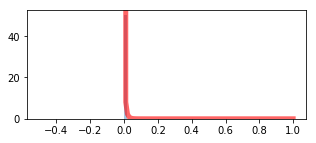

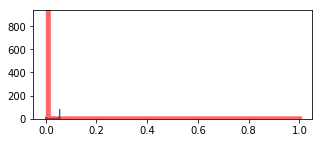

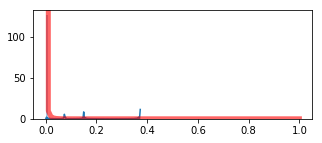

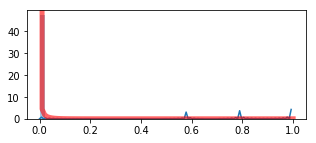

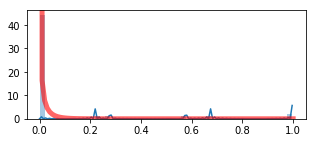

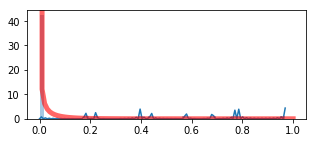

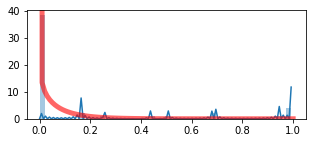

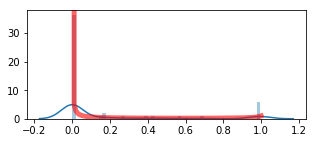

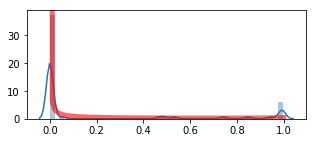

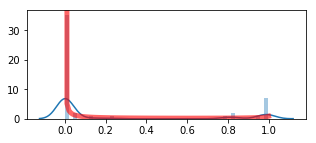

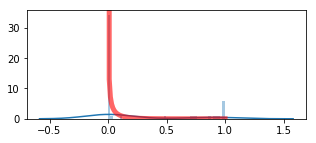

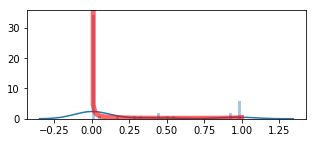

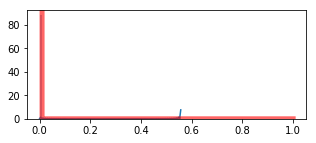

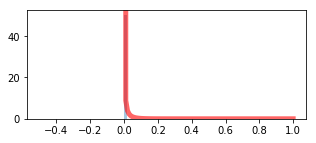

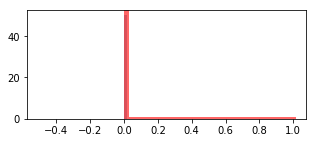

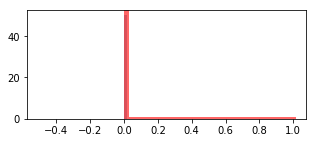

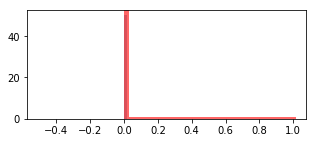

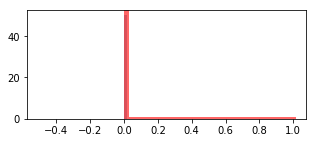

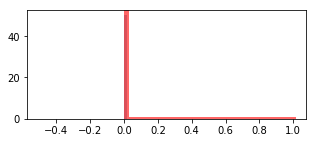

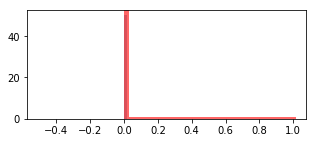

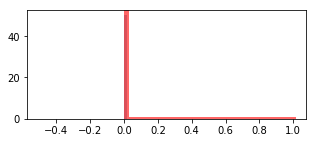

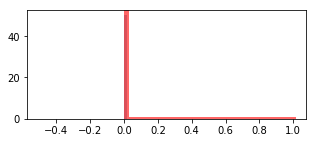

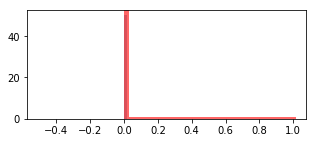

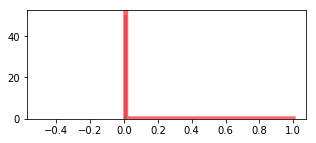

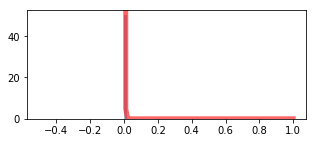

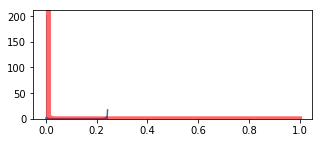

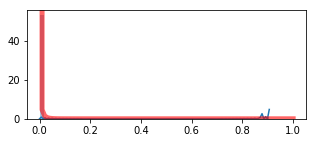

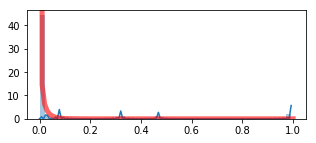

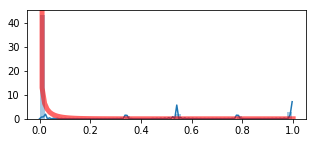

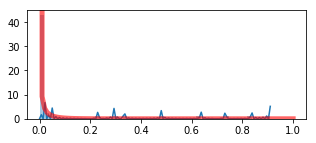

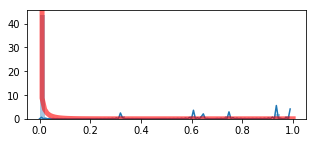

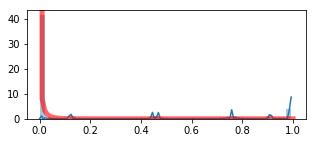

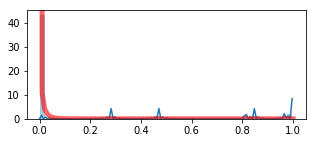

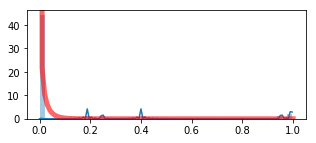

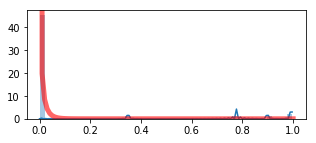

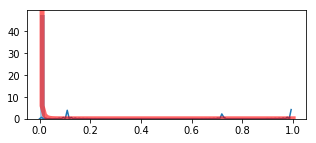

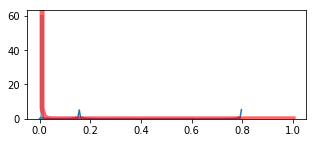

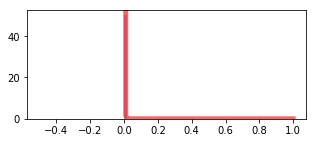

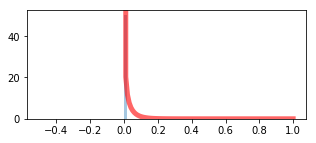

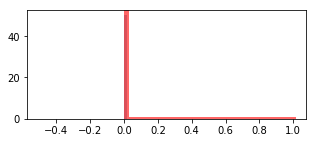

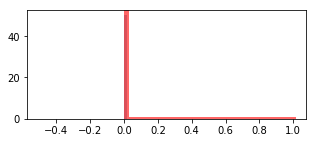

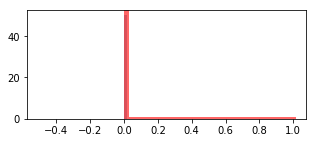

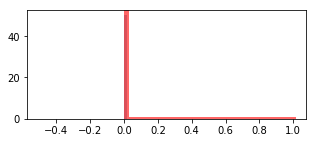

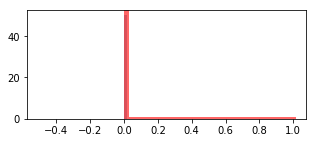

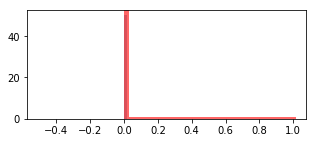

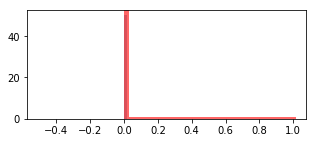

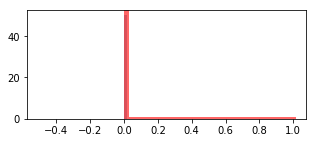

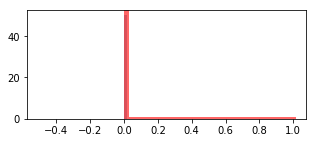

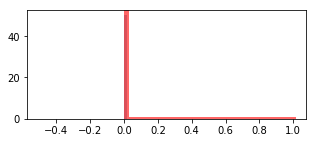

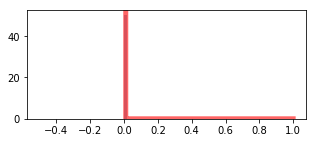

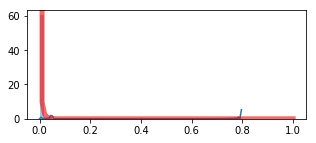

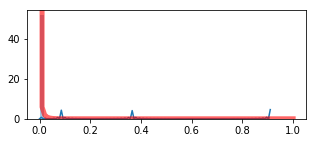

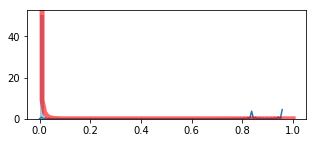

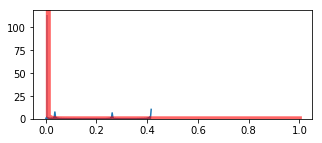

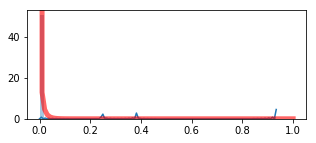

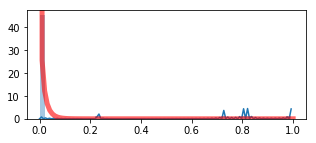

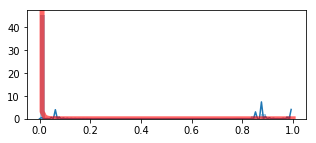

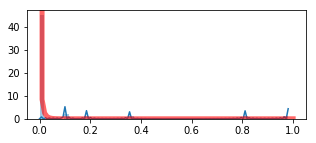

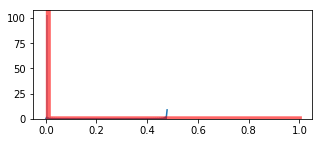

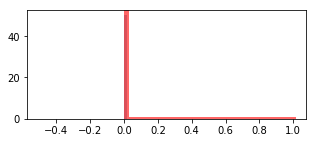

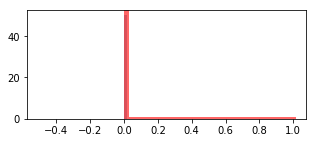

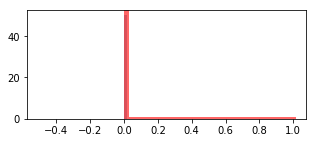

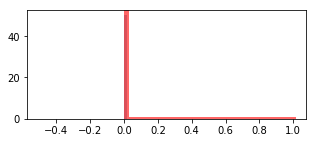

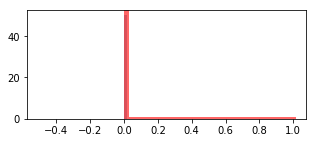

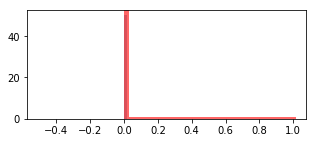

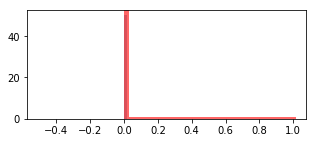

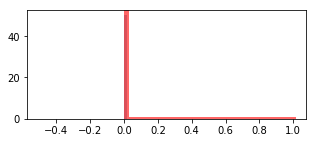

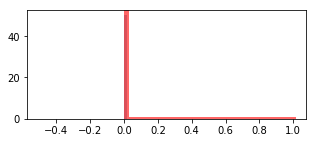

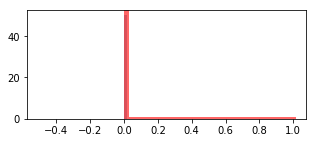

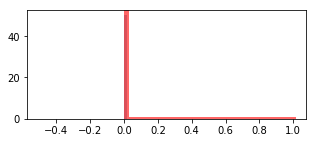

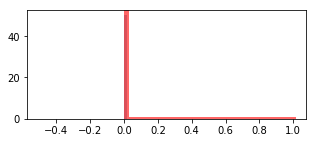

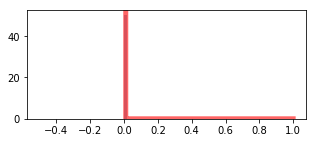

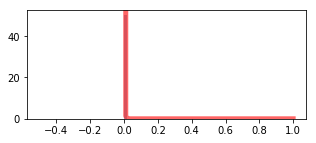

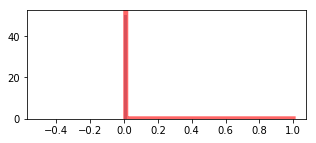

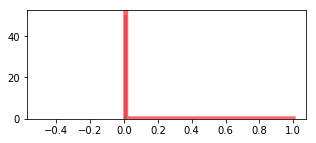

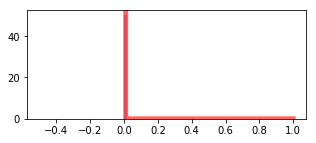

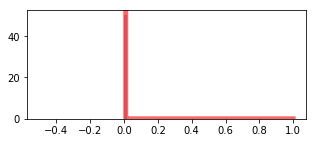

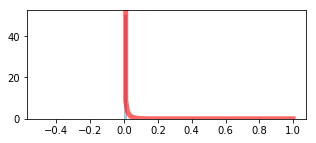

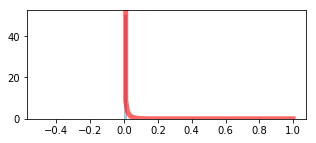

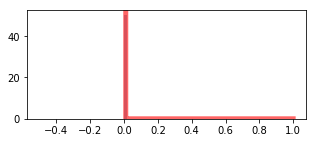

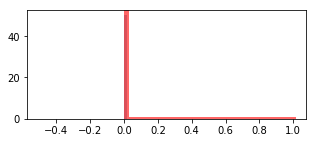

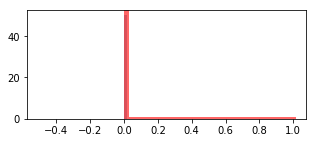

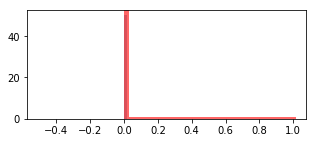

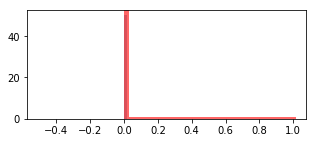

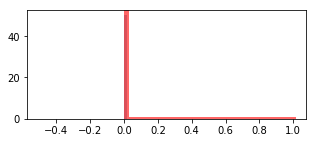

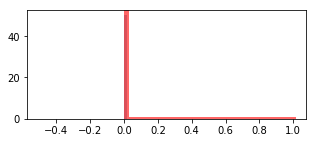

In [80]:
import seaborn as sns
#a,b,c,d=beta.fit(Xtrain[:,392],loc=0, scale=1)
for i in range(np.shape(Xtrain)[1]):  #int(np.sqrt(np.shape(Xtrain)[1]))
    
    i=i
    plt.figure(figsize=(5,2))
    sns.distplot(Xtrain[:,i],bins=50)
    x = np.linspace(0.0,1.0,100)
    plt.plot(x, beta.pdf(x, alpha_[i], beta_[i],c1_[i],d1_[i]),'r-', lw=5, alpha=0.6, label='beta pdf')
    plt.show()

In [65]:
from functools import reduce

In [71]:
x=[]
y=[]

x.append('a')
x.append('b')
x.append('c')

y.append('e')
y.append('f')
y.append('g')

In [72]:
x

['a', 'b', 'c']

In [73]:
y

['e', 'f', 'g']

In [74]:
new=[]

In [75]:
new.append(x)
new.append(y)

In [76]:
new

[['a', 'b', 'c'], ['e', 'f', 'g']]

In [77]:
np.shape(new)

(2, 3)

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


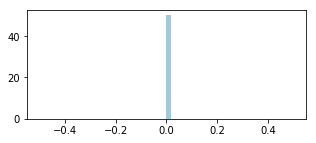

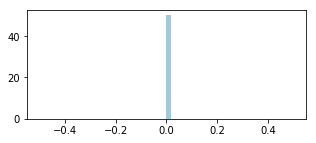

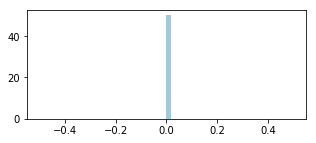

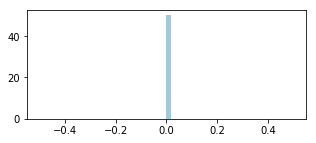

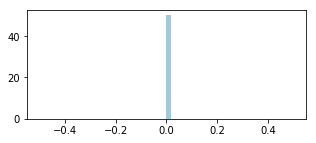

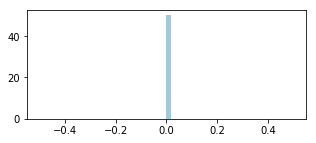

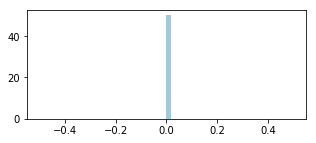

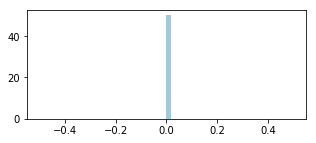

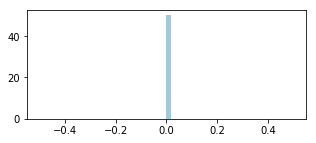

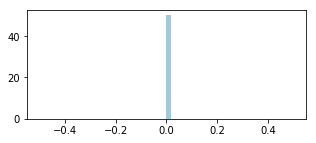

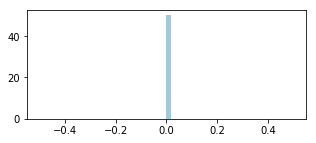

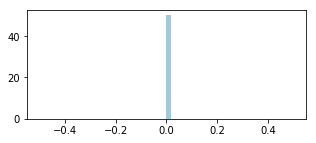

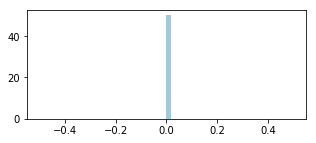

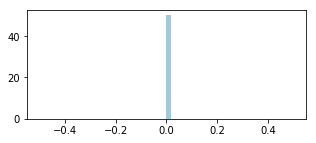

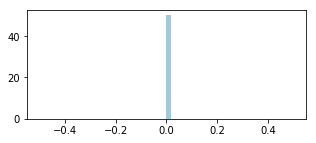

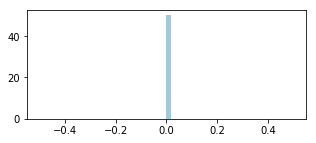

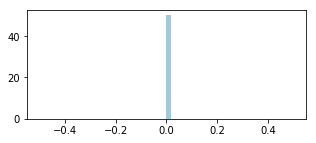

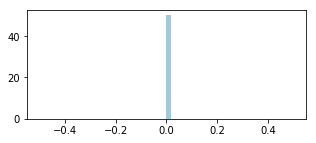

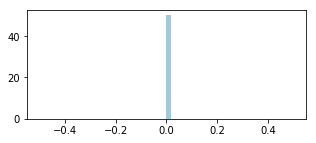

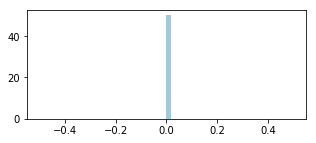

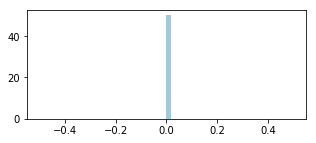

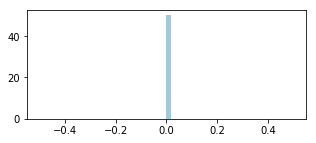

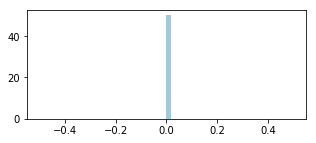

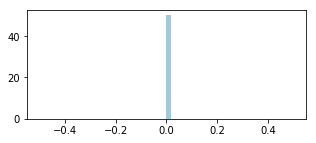

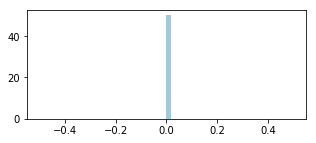

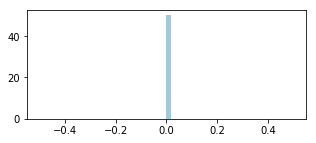

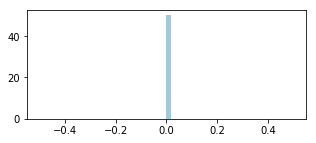

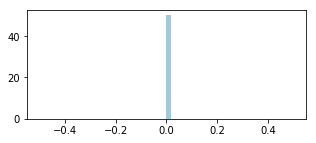

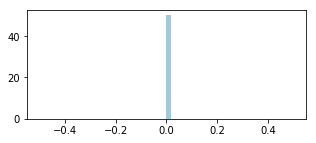

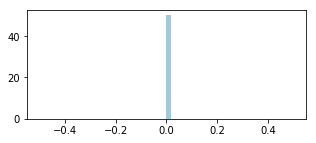

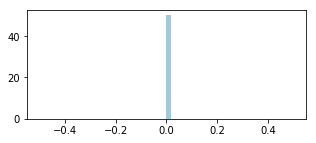

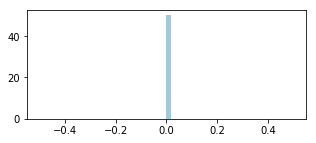

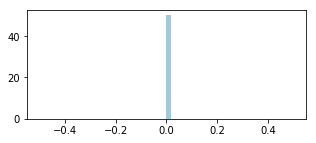

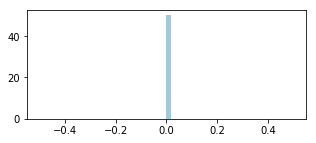

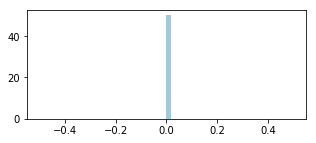

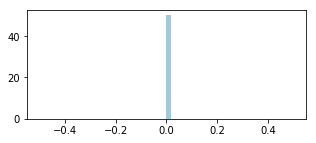

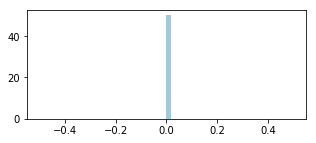

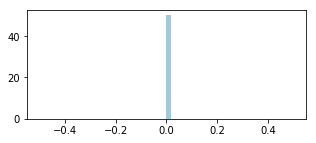

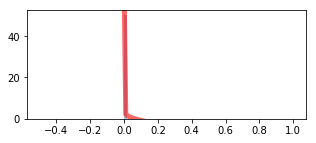

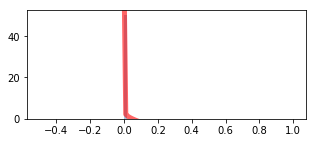

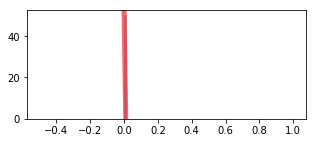

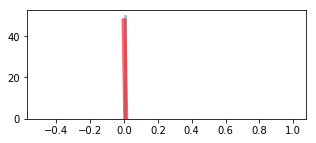

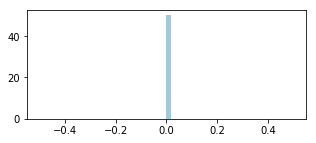

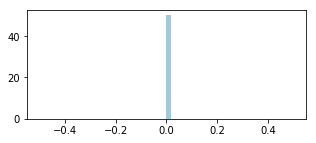

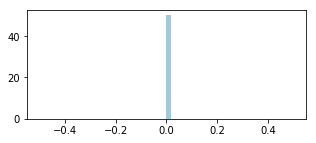

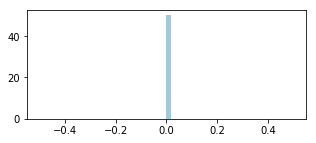

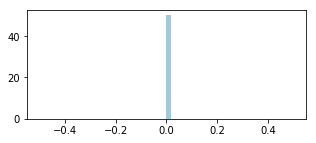

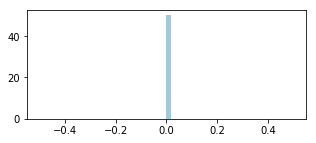

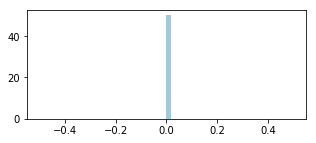

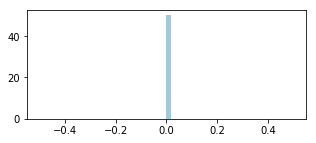

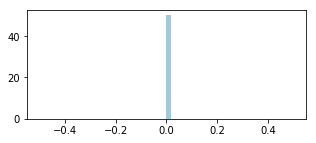

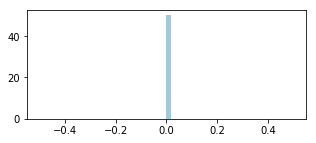

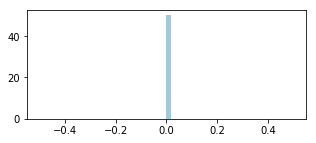

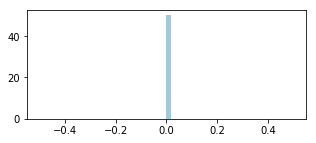

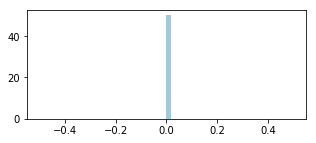

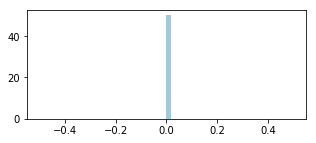

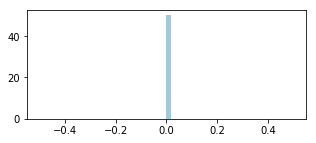

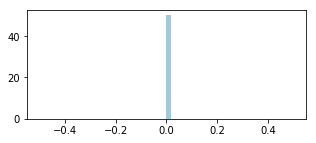

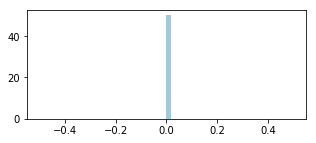

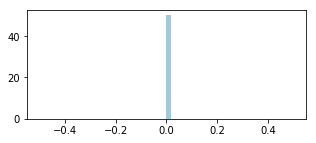

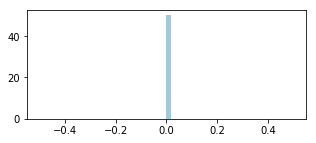

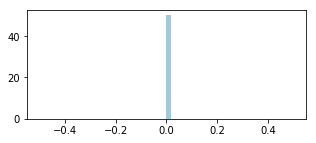

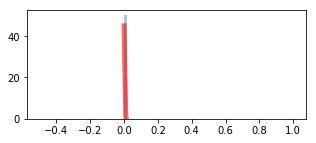

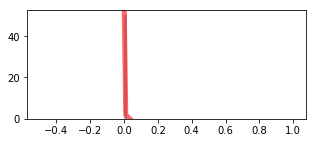

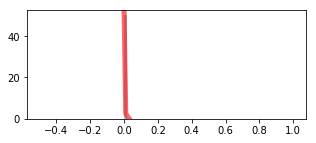

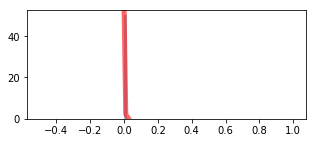

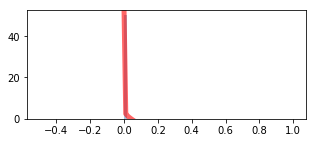

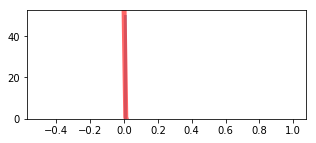

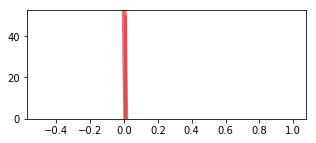

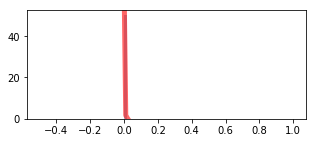

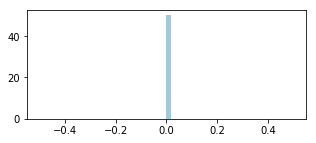

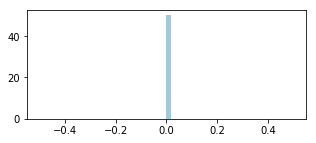

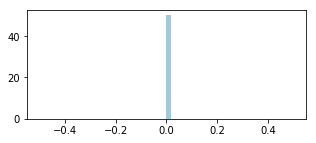

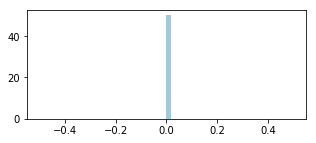

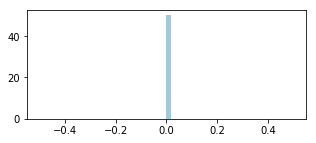

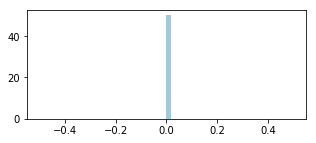

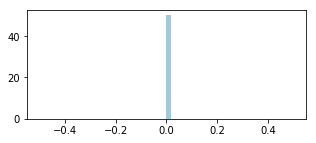

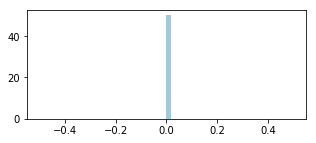

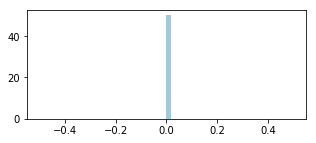

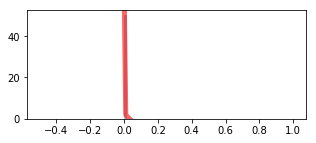

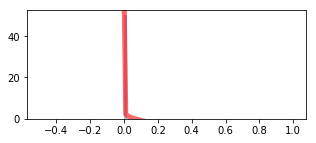

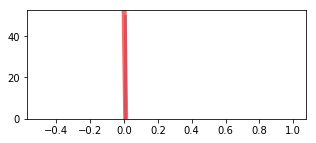

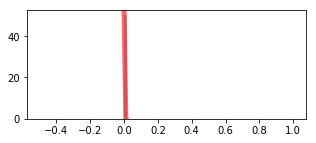

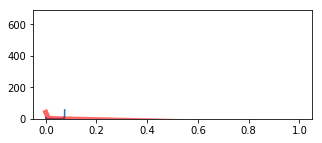

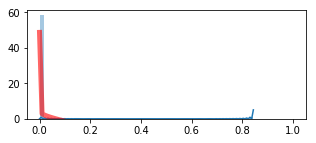

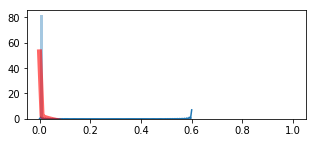

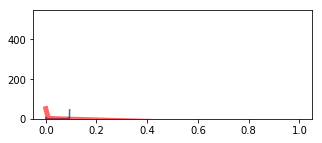

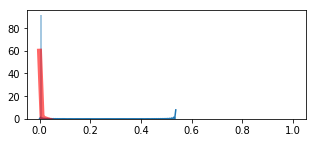

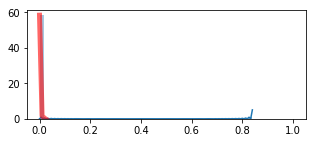

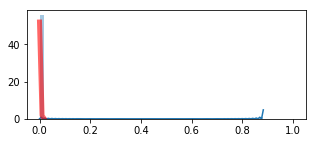

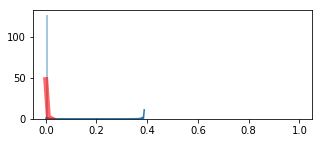

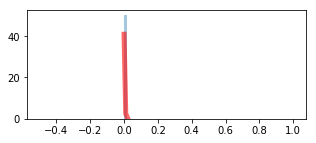

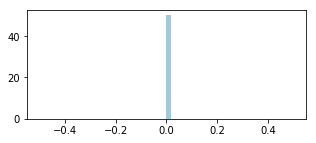

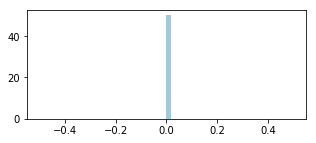

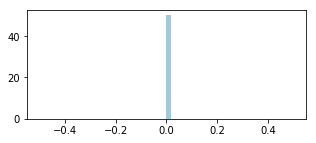

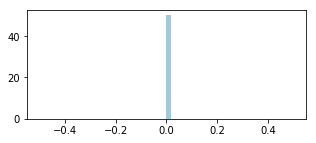

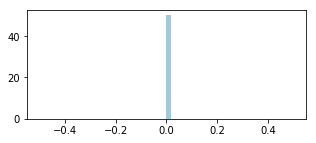

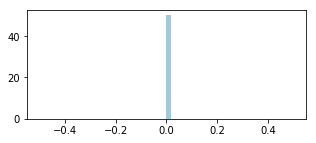

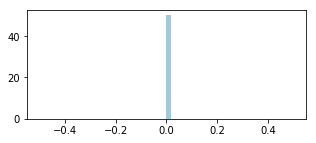

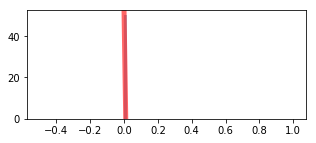

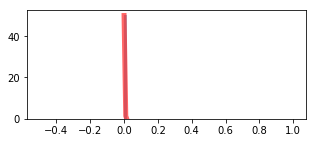

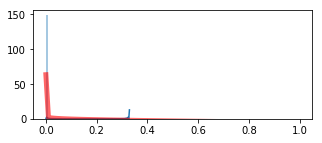

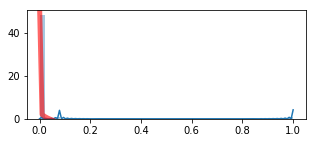

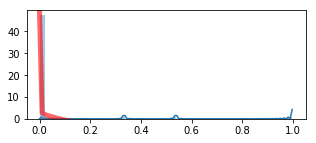

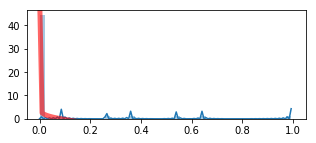

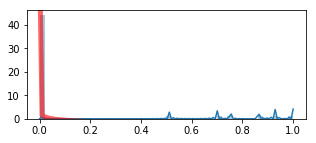

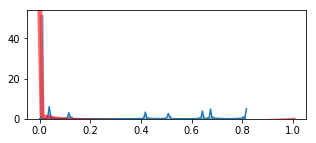

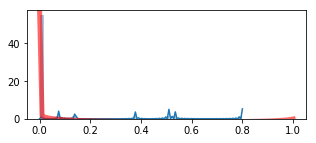

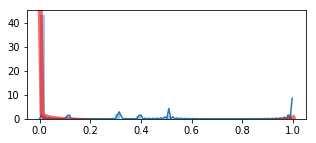

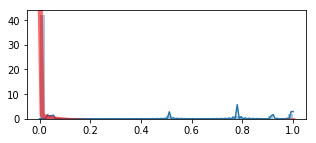

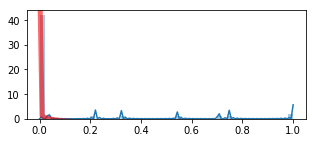

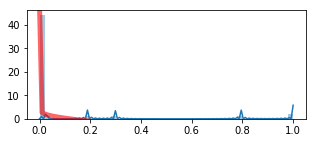

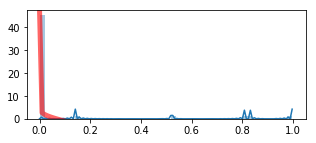

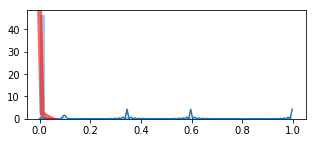

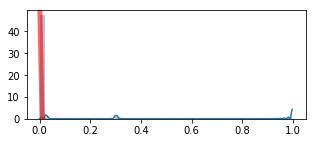

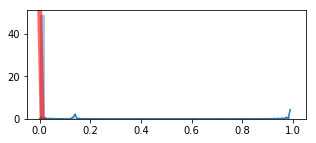

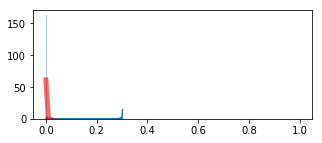

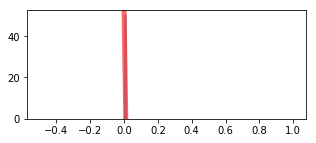

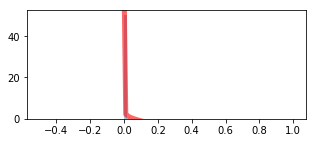

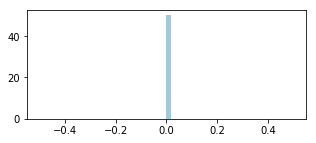

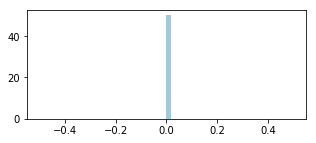

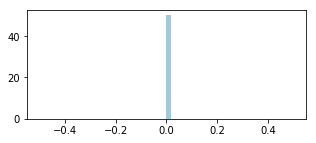

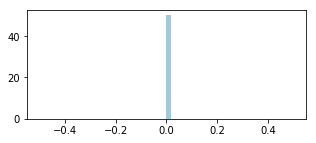

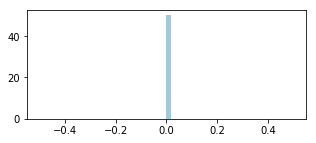

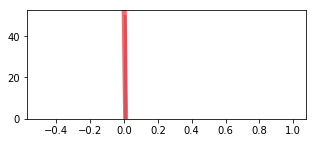

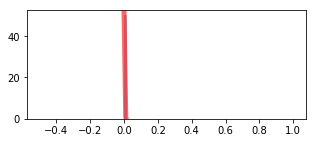

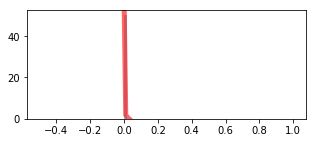

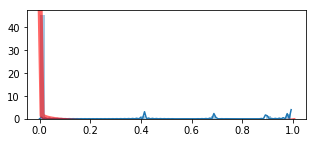

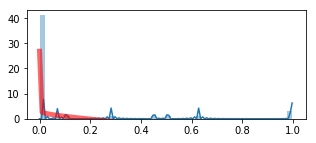

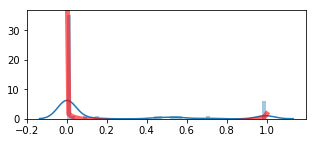

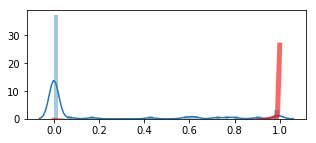

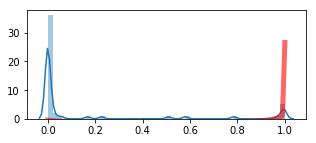

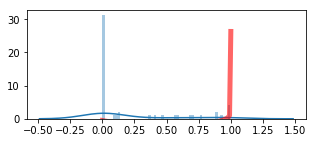

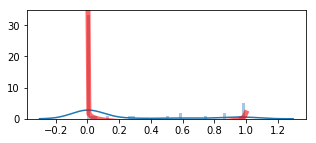

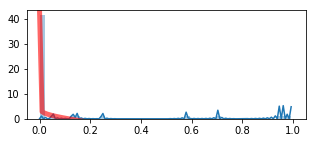

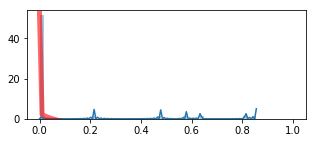

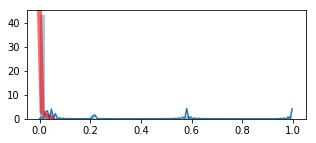

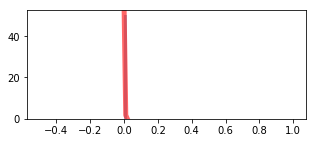

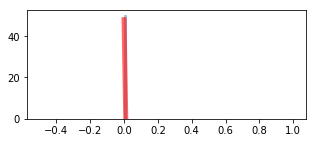

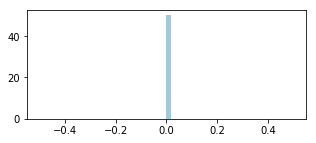

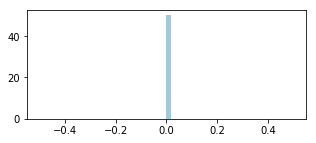

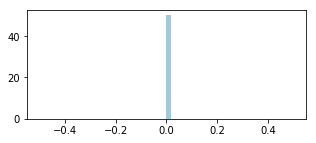

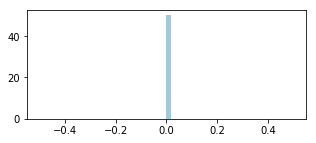

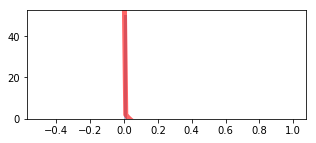

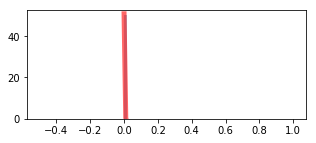

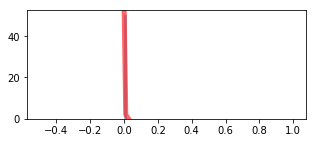

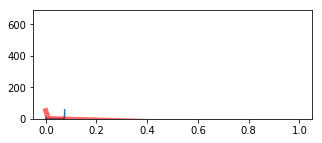

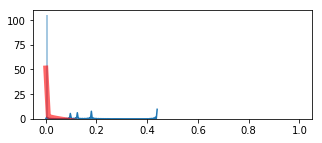

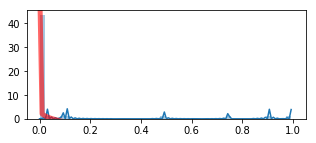

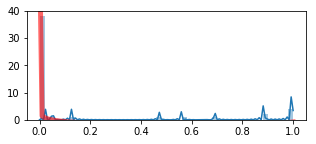

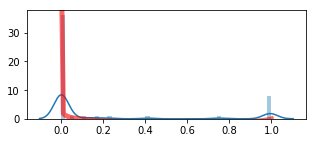

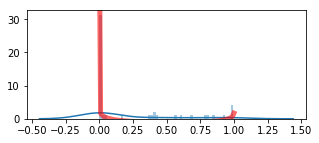

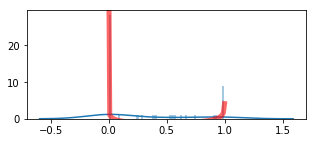

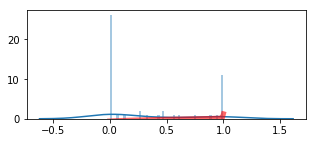

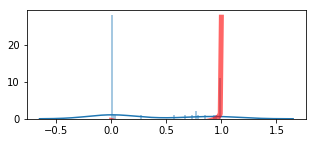

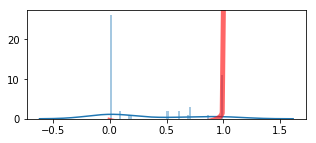

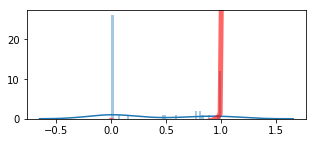

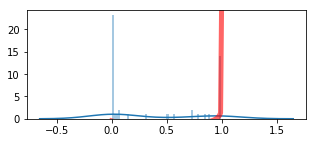

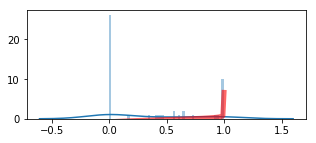

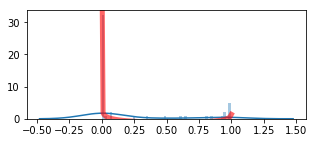

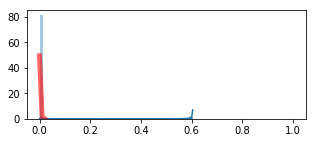

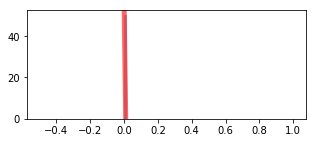

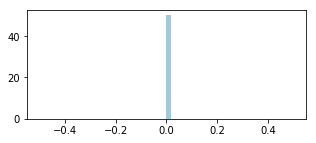

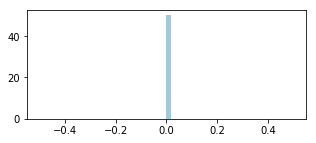

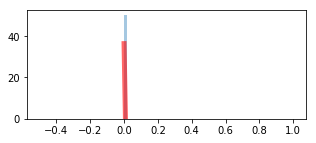

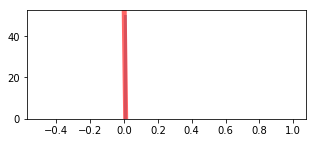

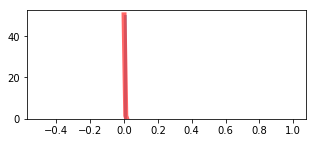

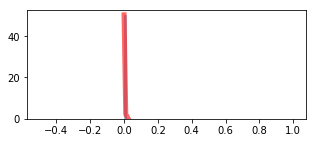

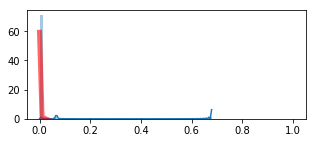

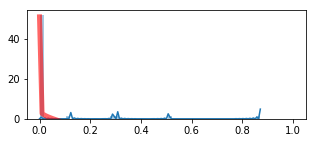

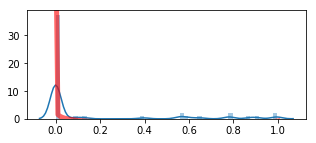

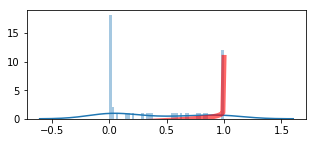

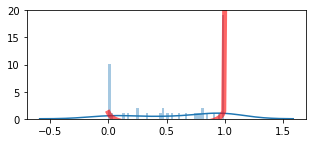

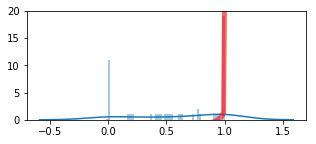

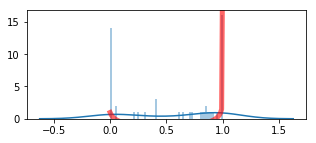

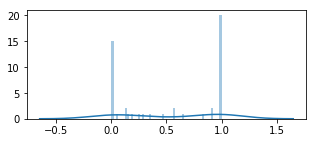

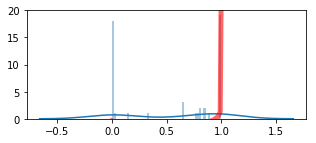

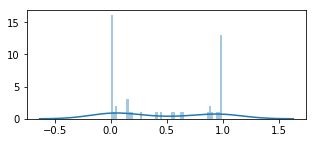

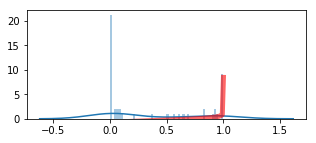

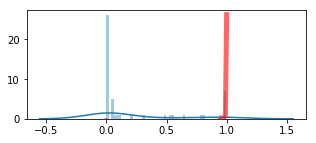

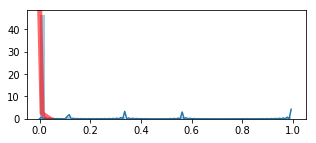

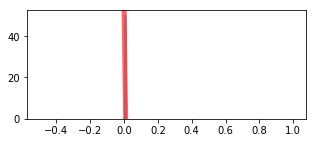

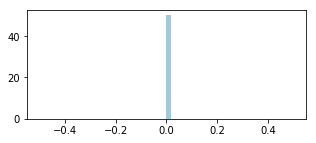

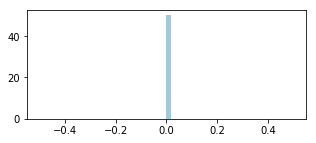

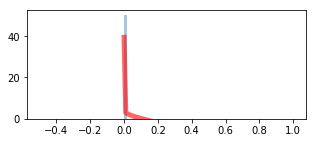

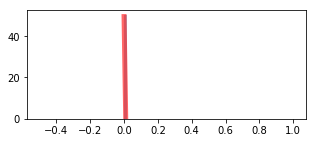

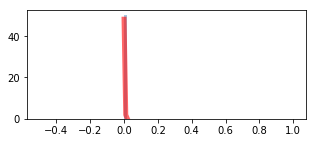

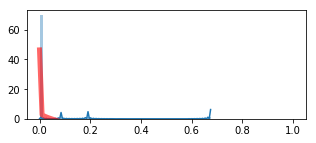

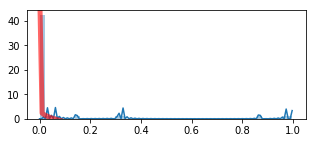

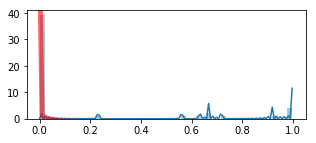

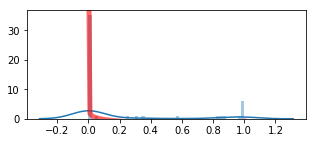

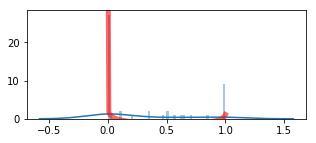

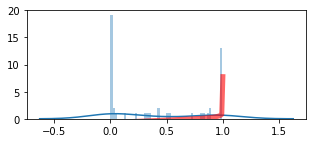

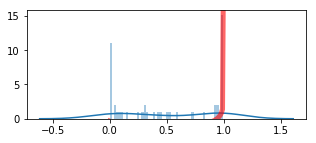

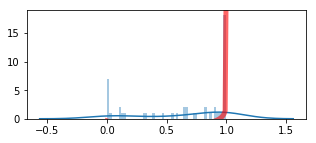

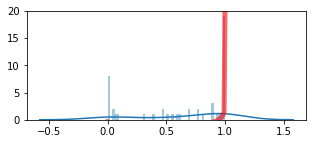

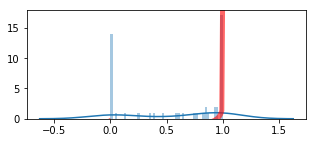

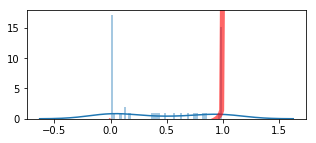

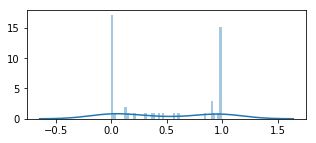

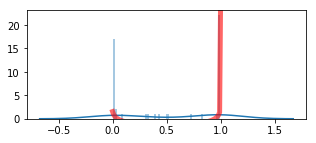

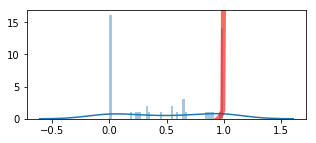

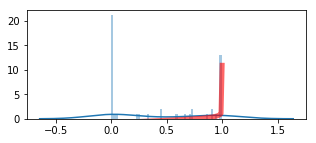

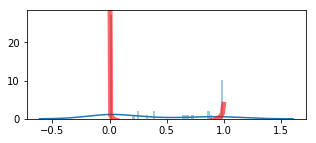

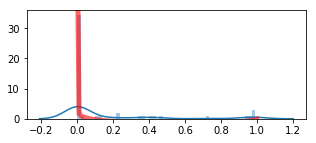

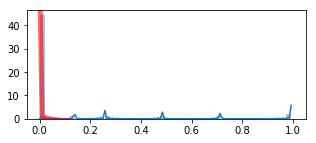

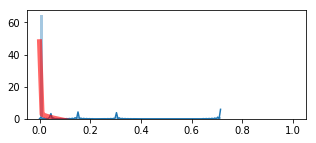

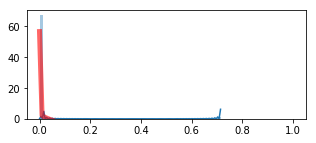

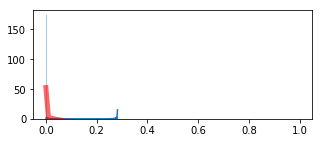

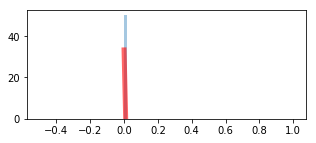

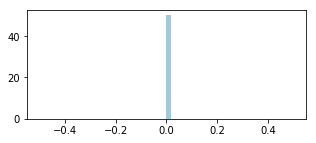

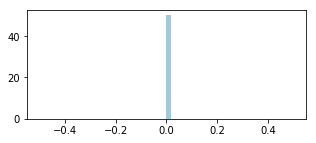

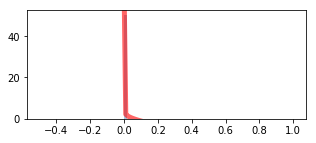

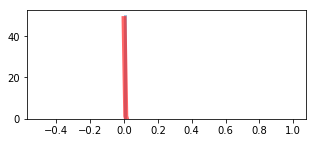

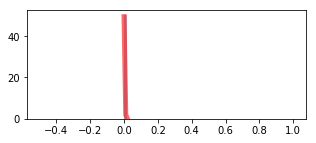

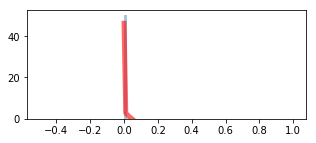

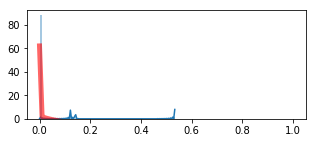

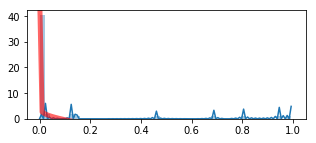

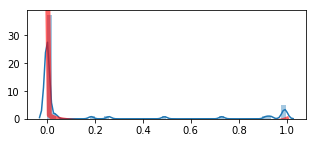

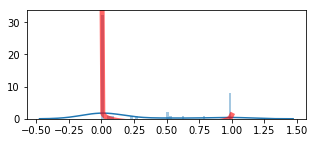

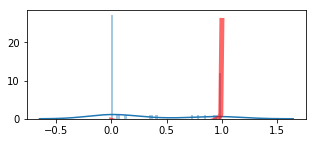

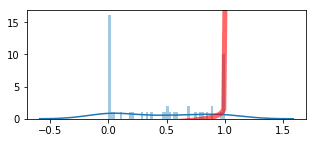

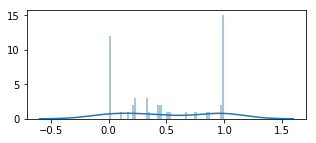

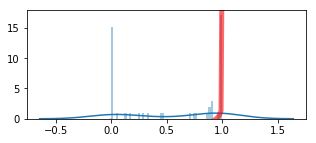

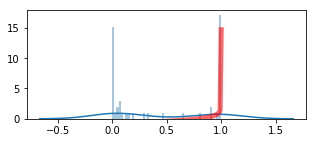

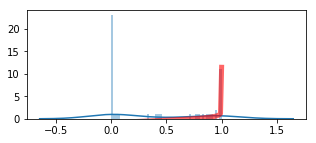

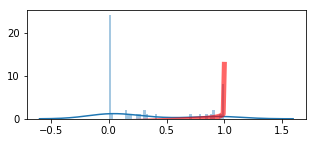

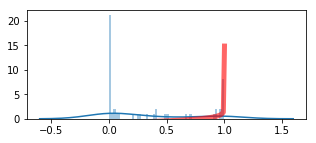

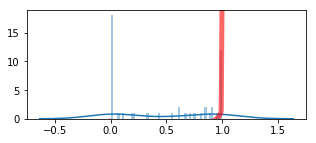

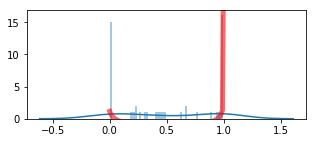

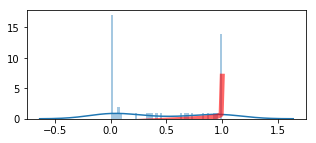

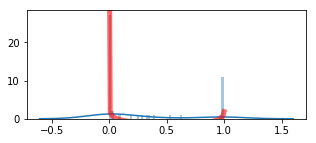

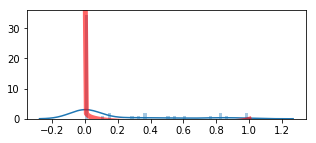

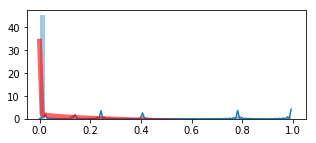

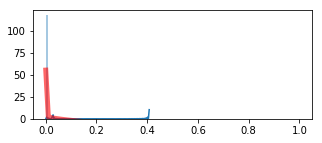

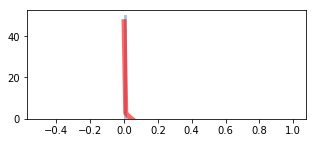

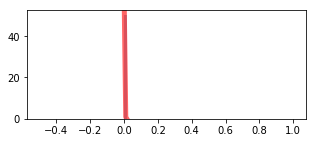

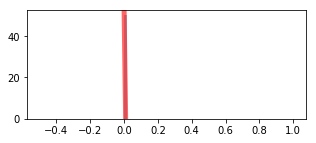

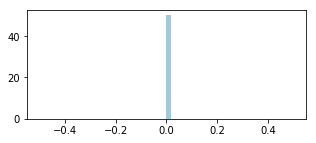

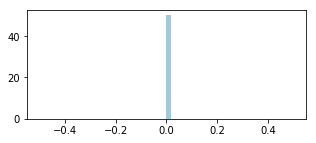

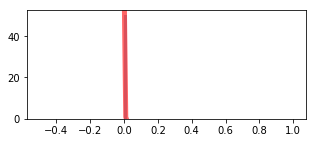

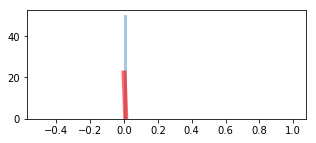

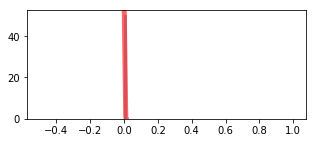

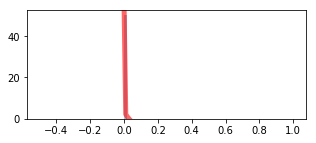

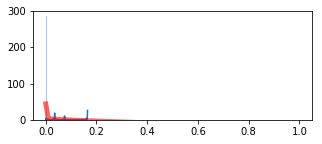

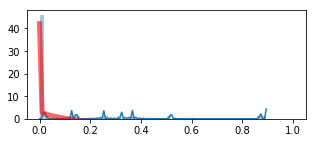

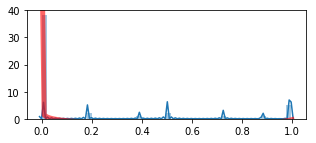

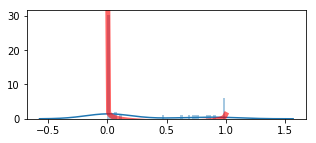

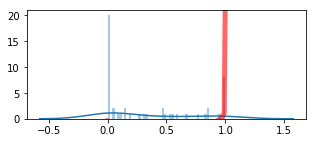

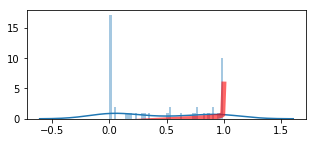

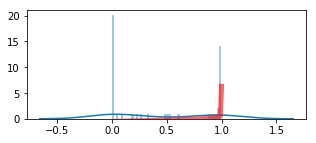

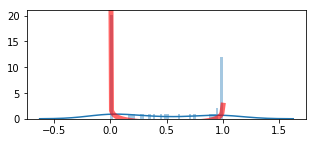

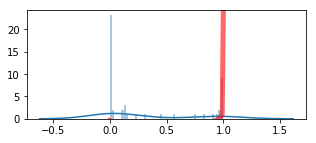

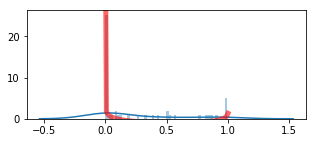

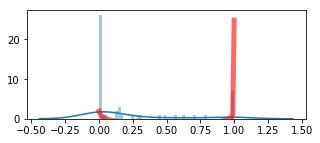

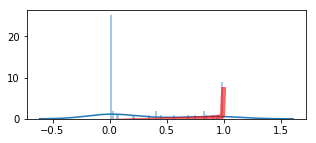

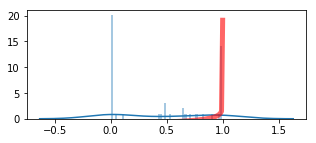

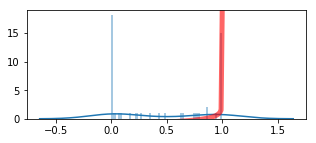

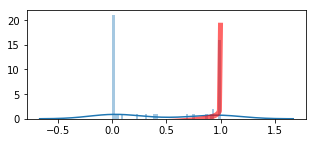

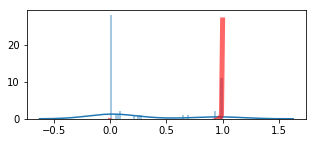

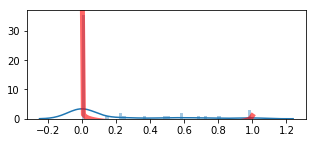

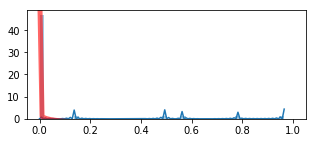

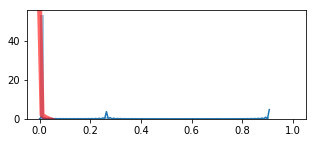

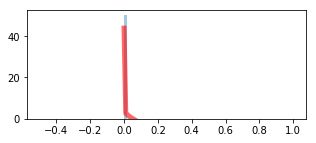

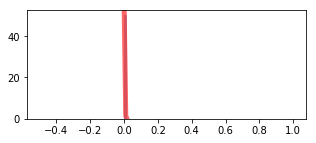

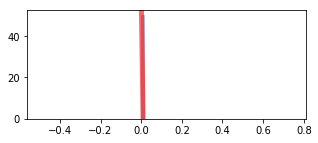

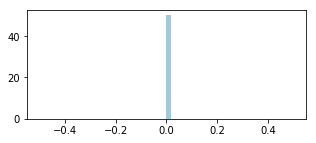

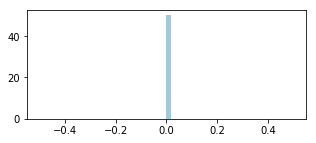

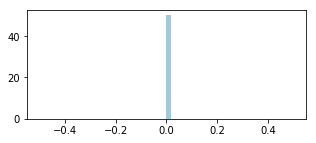

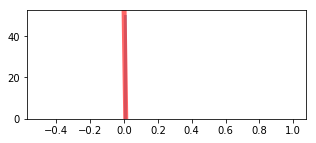

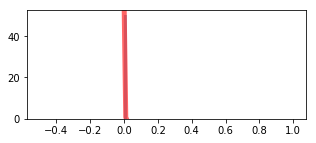

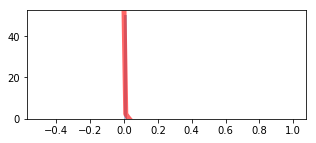

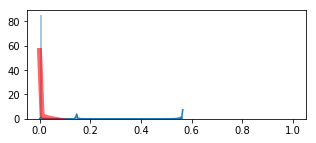

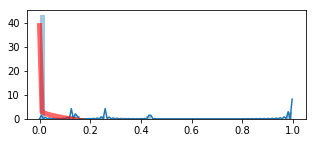

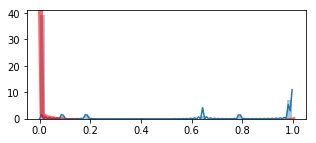

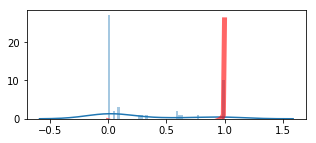

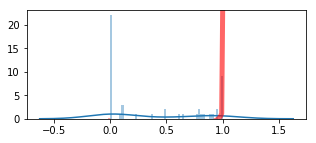

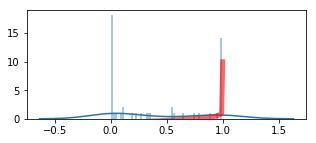

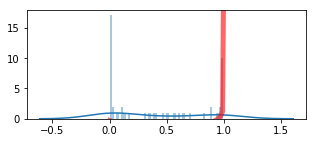

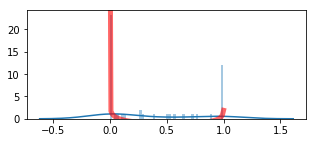

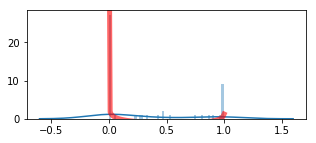

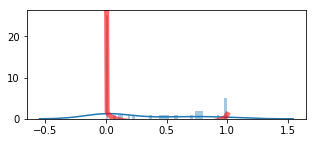

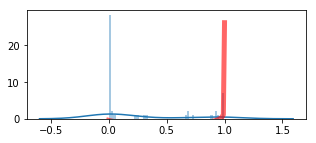

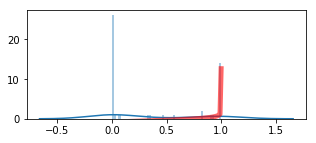

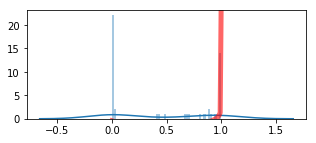

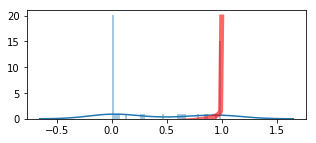

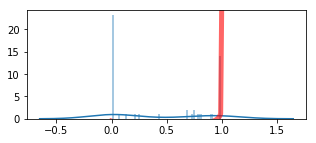

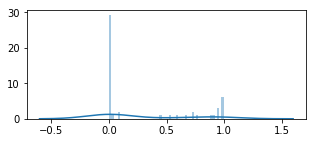

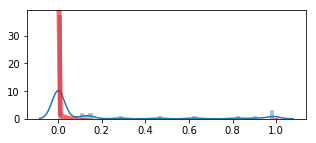

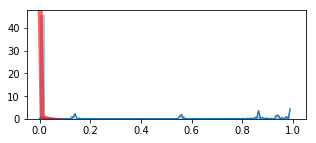

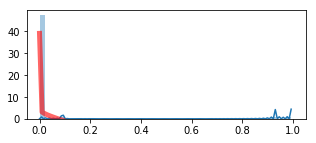

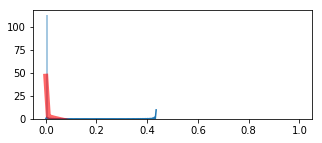

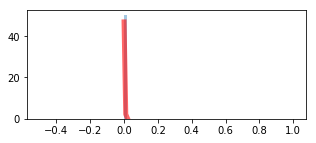

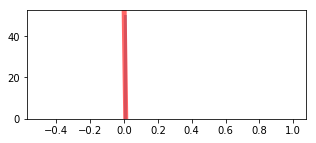

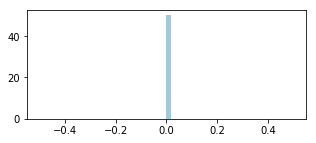

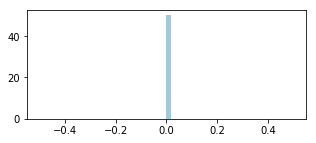

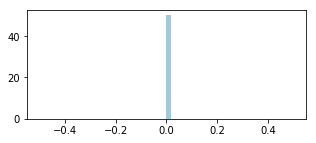

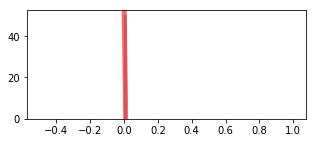

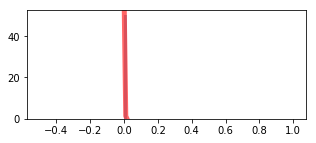

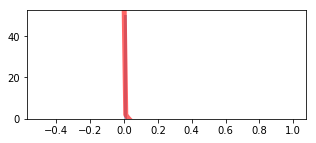

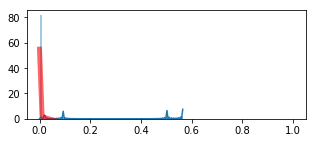

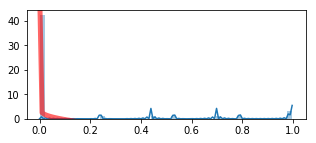

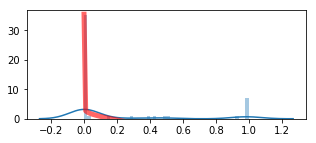

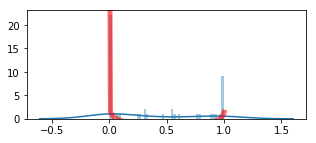

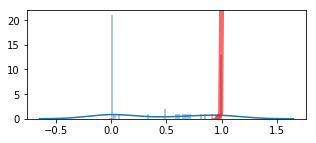

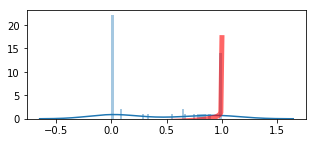

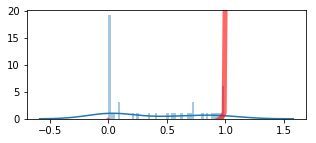

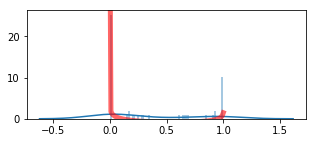

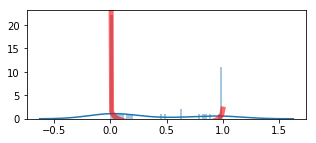

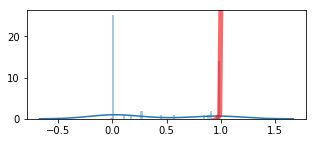

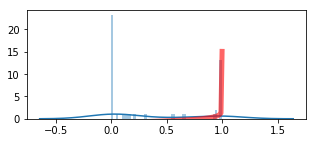

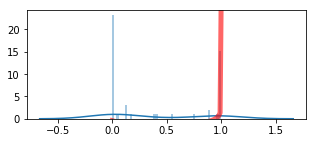

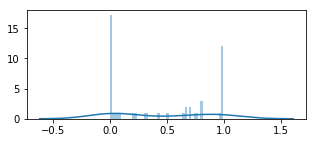

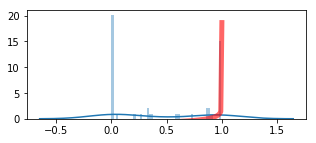

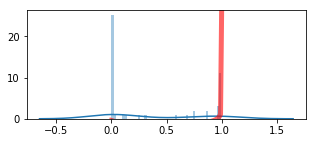

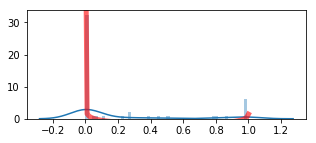

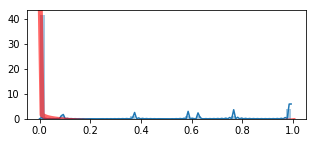

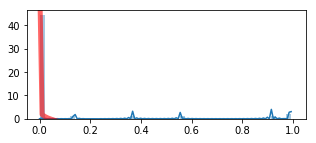

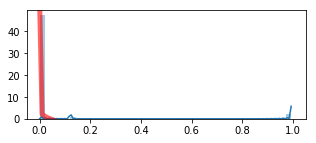

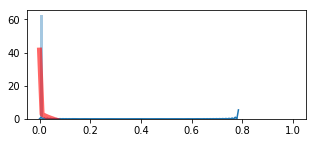

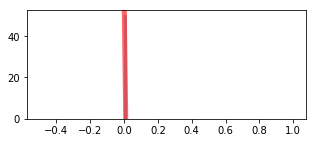

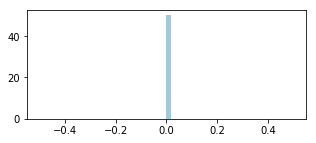

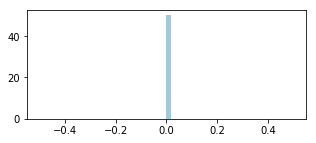

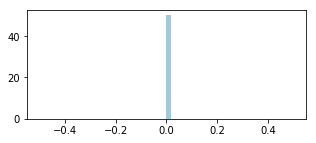

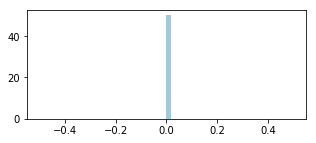

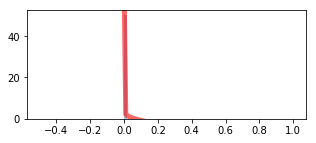

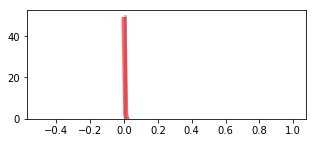

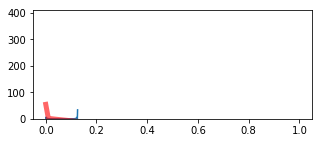

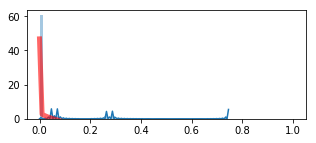

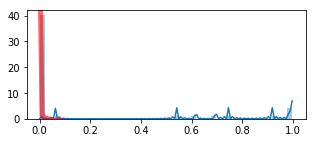

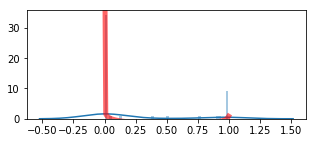

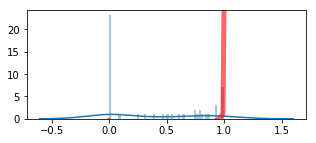

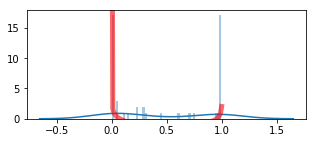

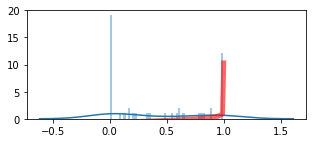

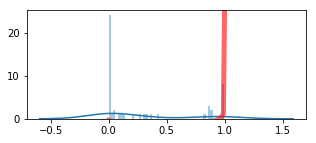

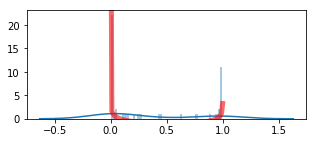

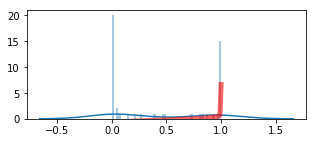

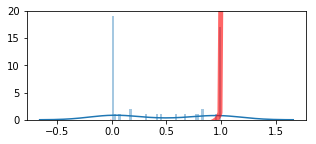

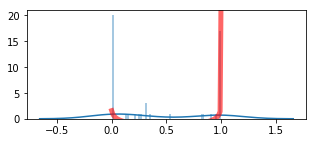

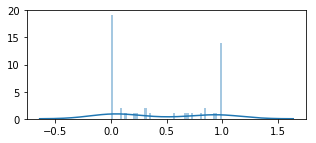

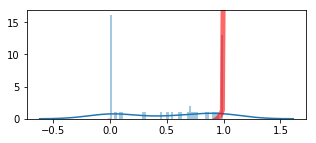

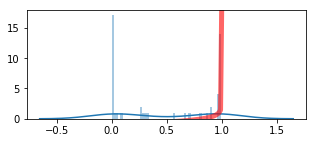

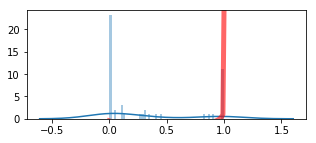

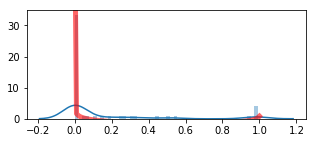

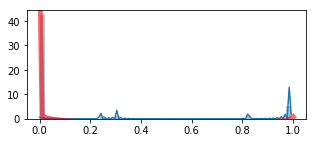

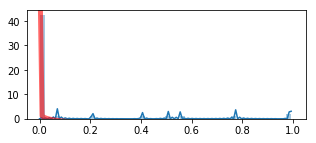

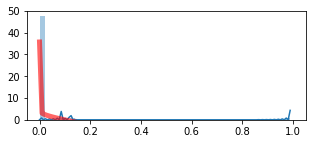

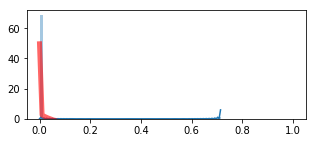

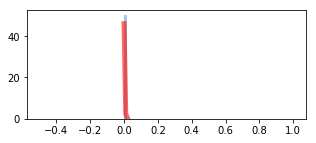

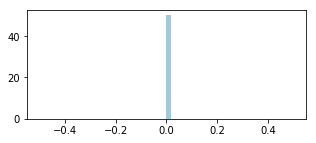

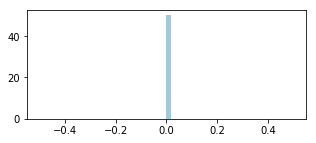

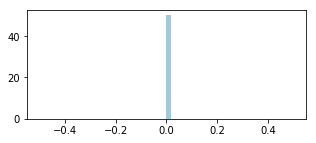

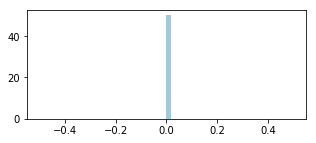

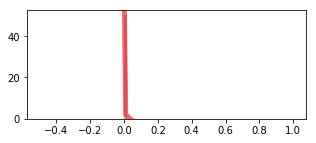

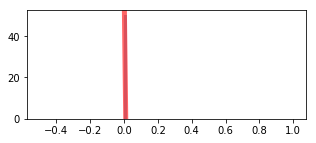

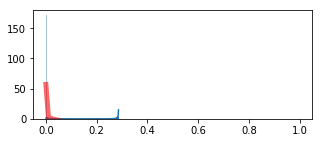

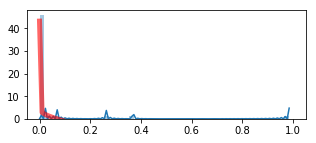

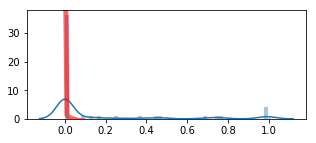

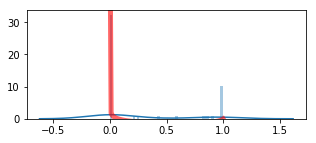

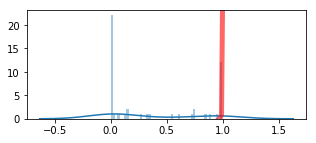

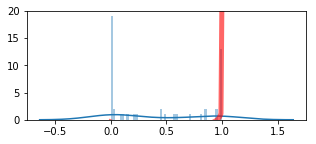

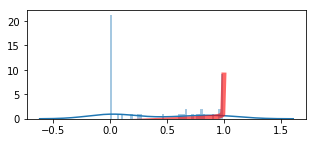

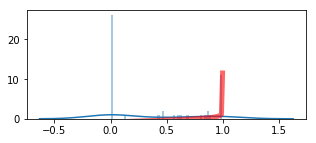

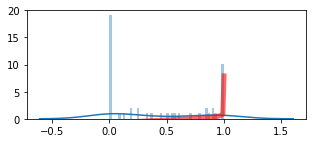

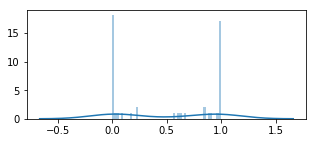

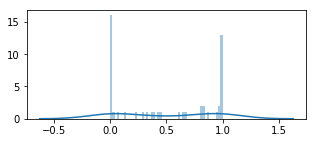

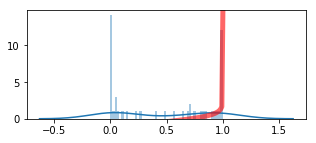

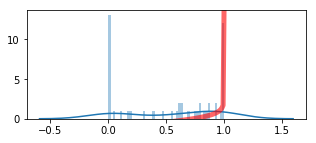

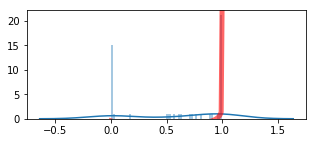

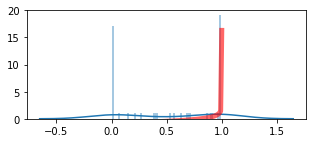

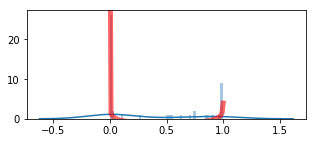

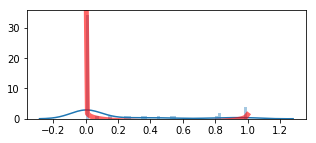

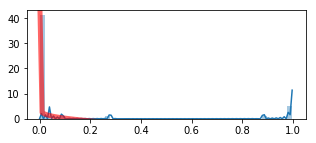

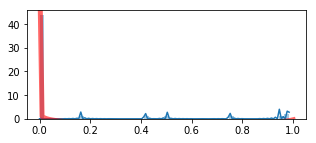

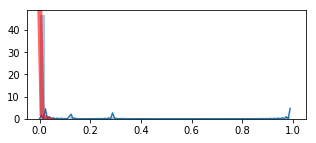

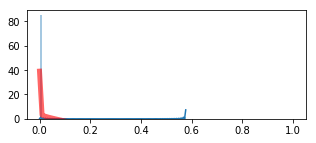

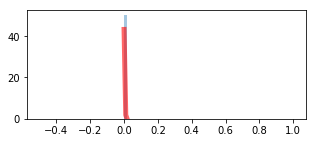

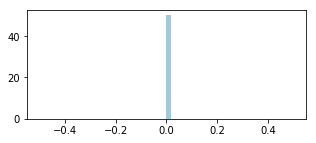

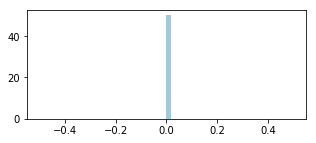

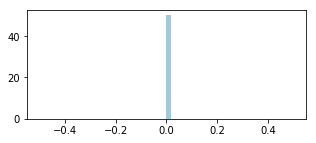

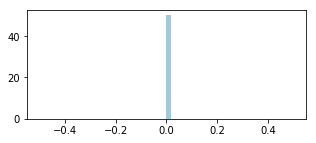

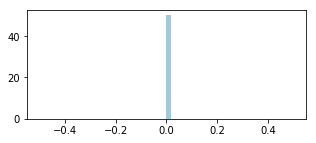

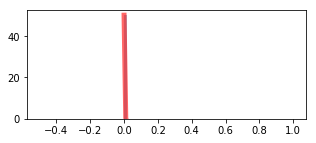

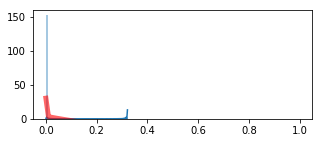

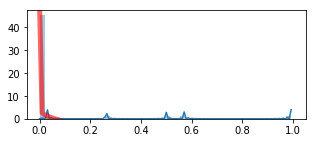

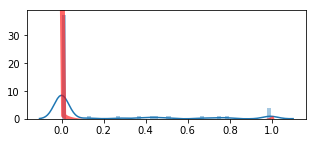

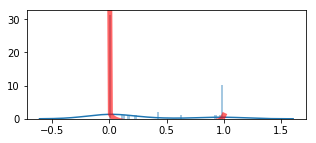

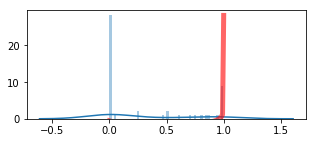

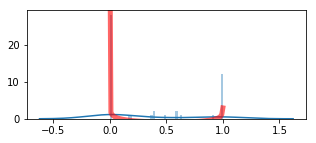

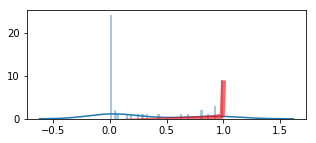

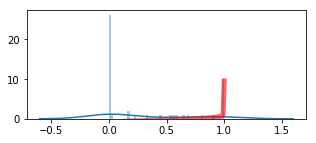

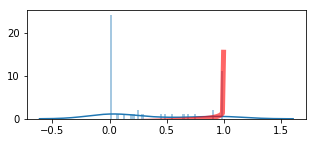

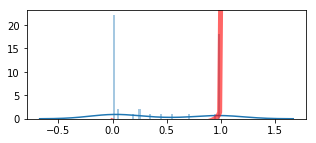

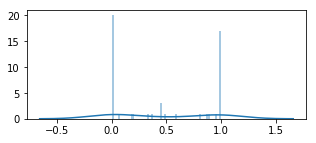

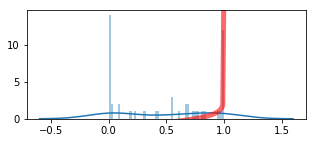

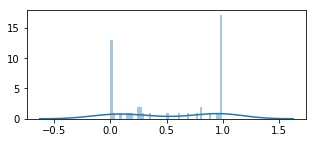

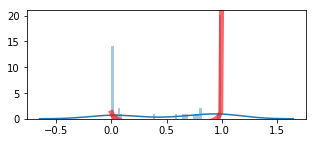

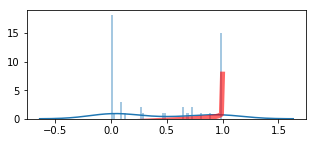

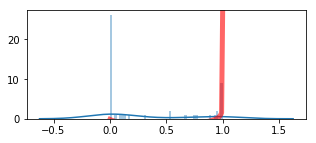

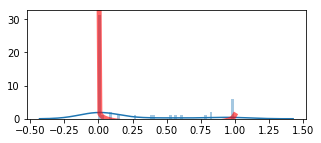

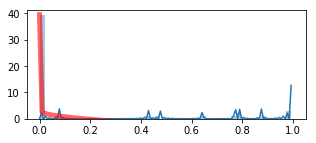

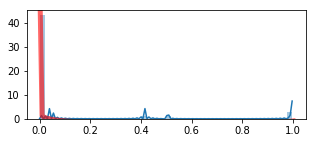

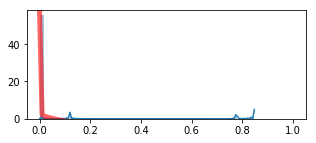

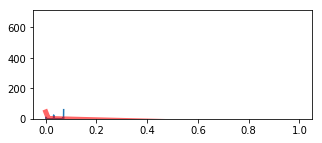

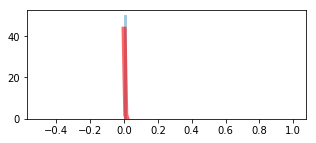

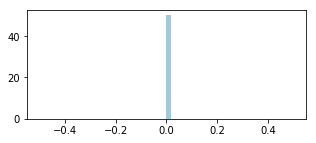

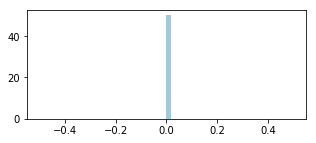

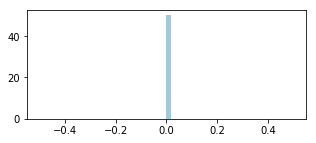

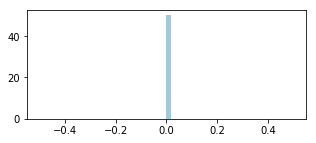

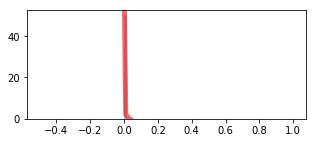

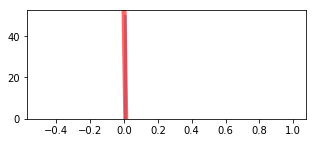

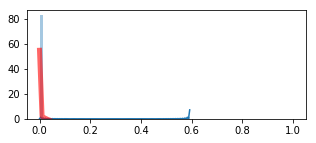

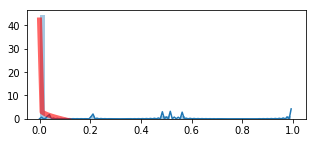

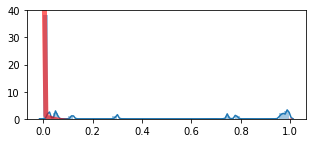

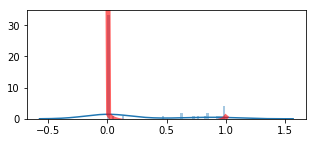

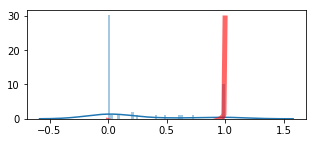

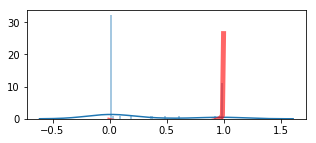

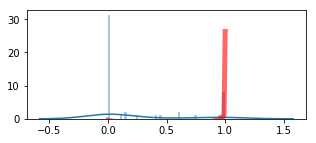

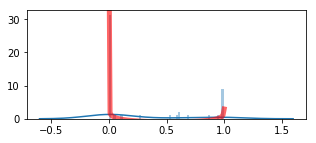

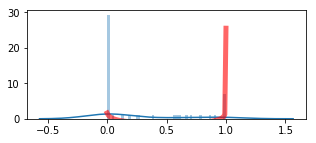

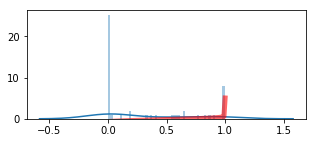

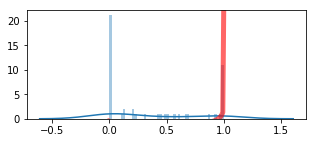

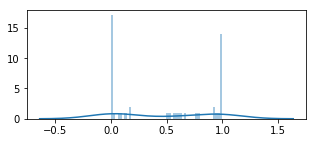

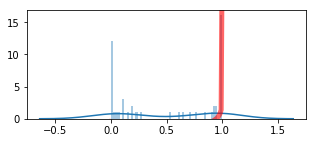

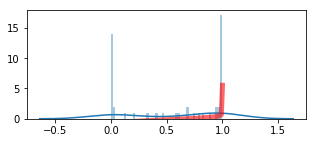

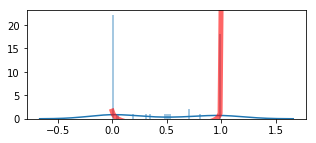

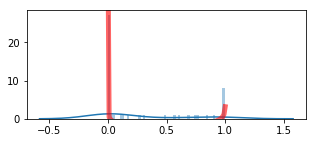

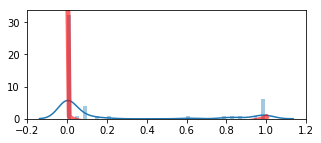

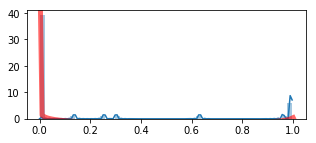

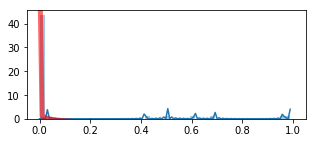

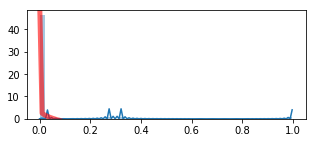

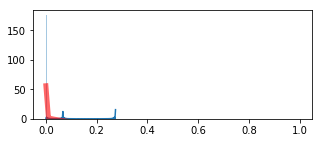

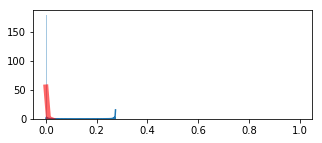

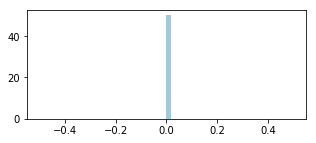

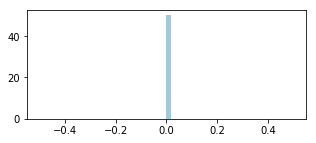

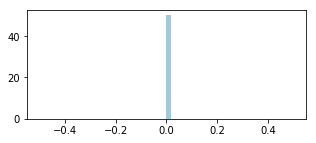

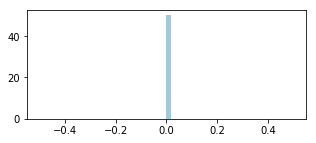

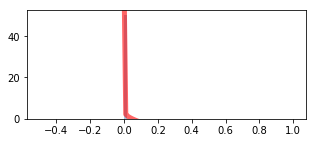

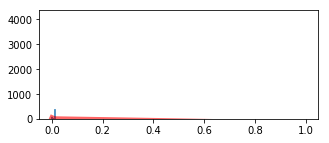

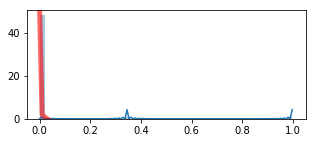

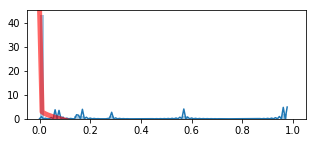

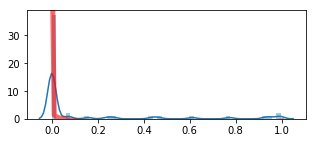

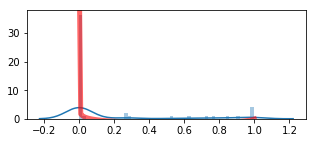

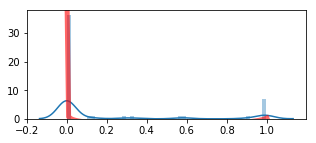

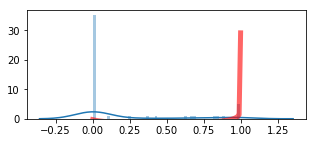

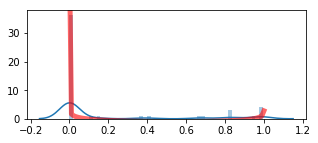

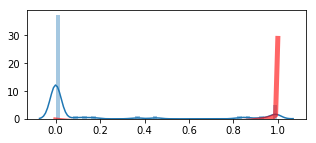

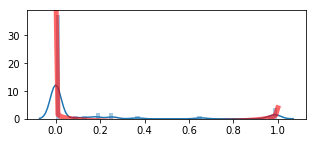

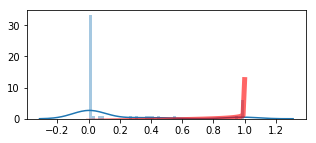

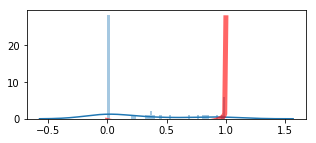

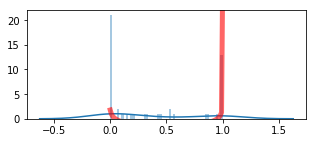

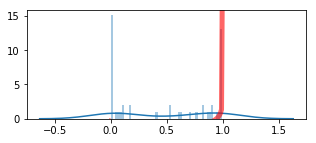

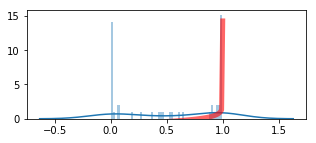

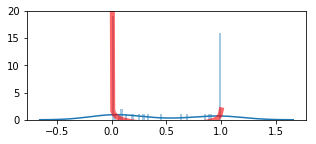

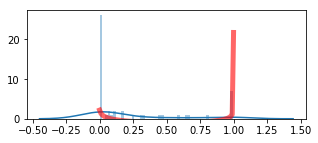

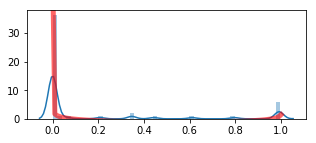

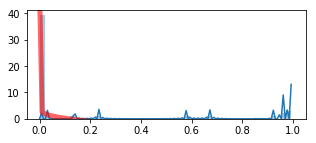

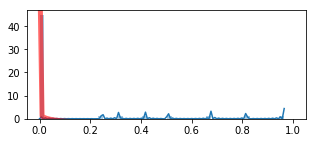

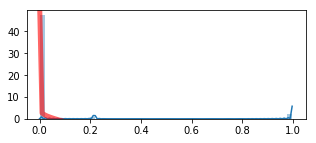

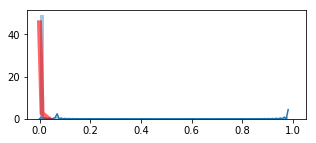

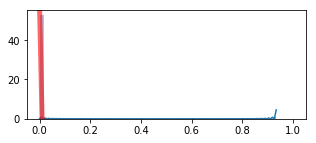

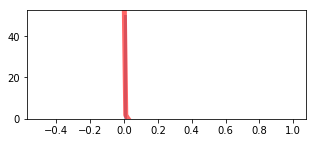

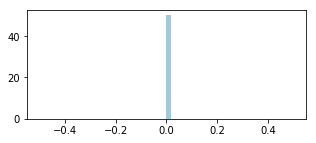

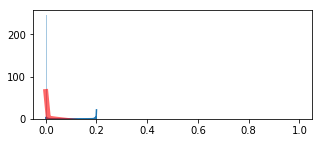

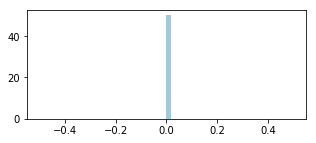

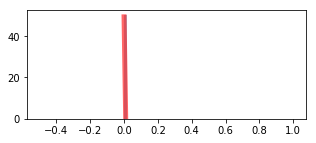

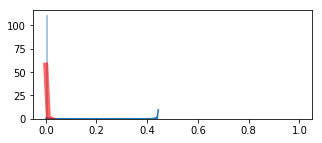

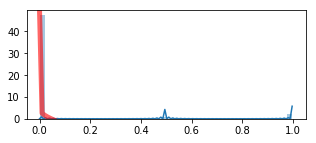

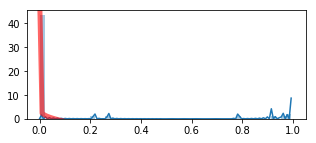

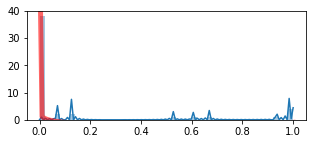

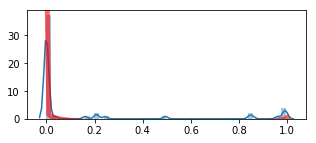

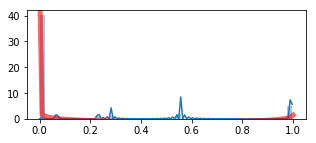

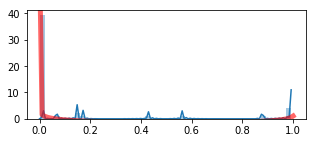

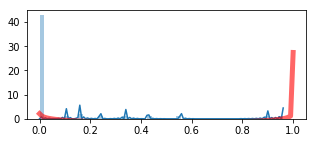

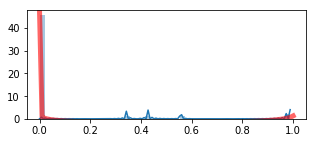

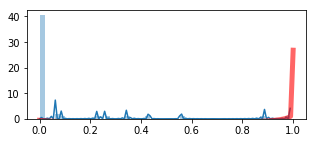

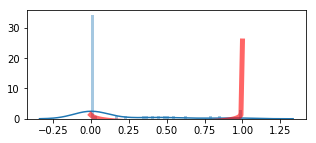

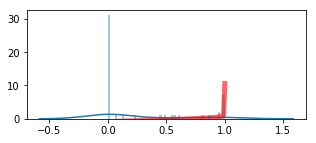

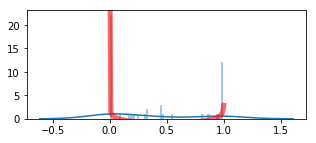

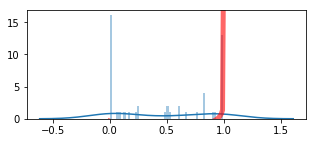

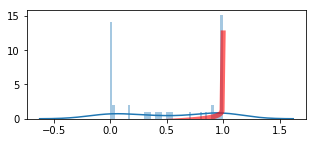

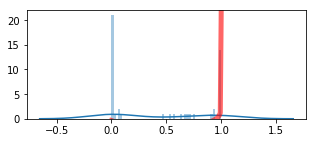

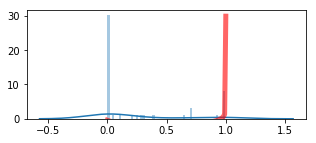

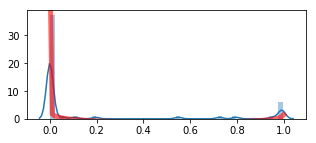

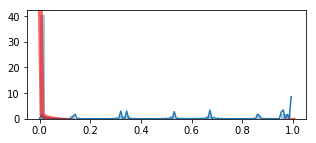

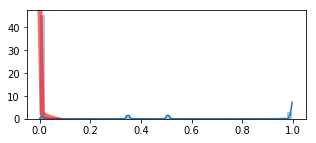

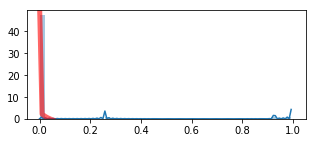

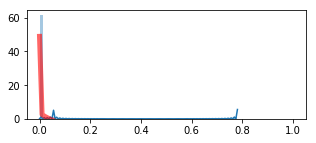

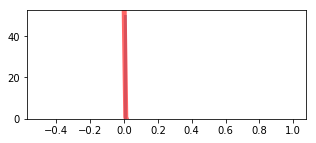

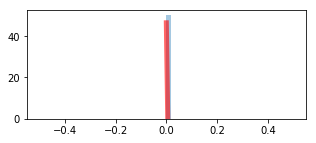

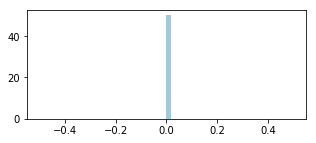

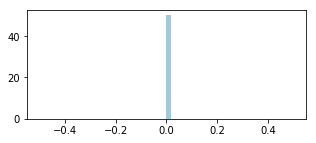

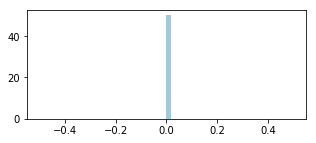

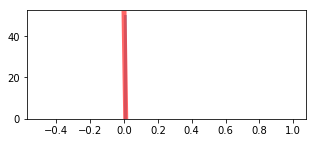

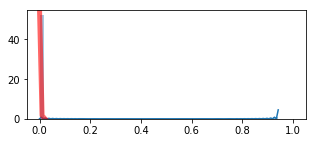

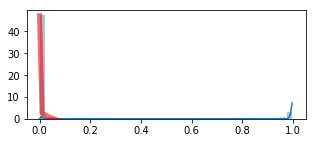

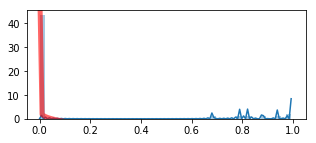

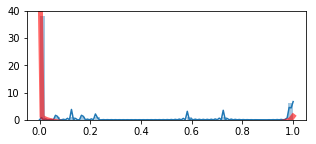

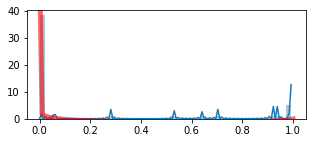

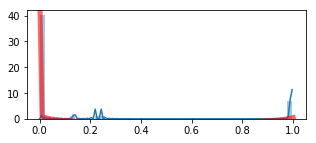

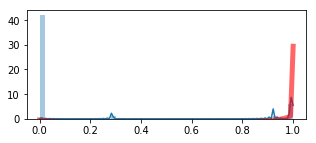

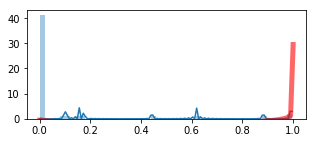

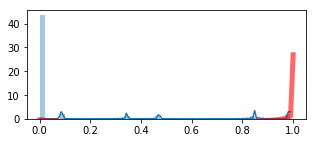

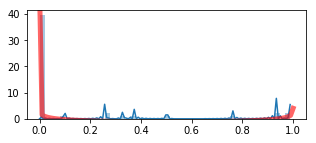

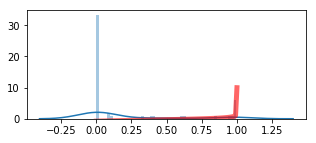

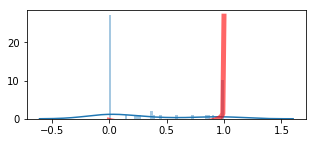

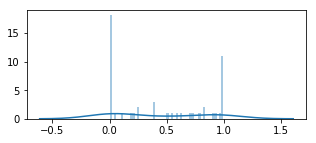

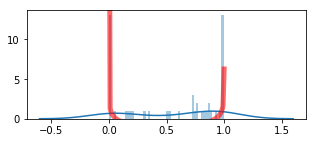

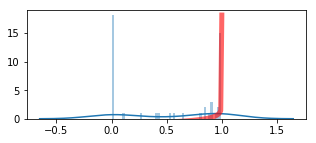

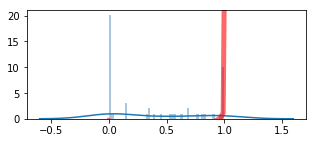

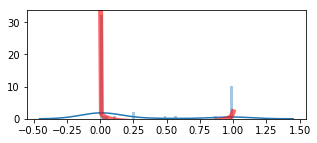

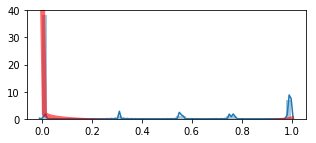

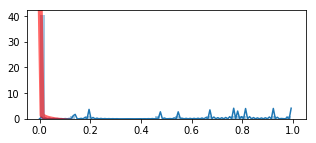

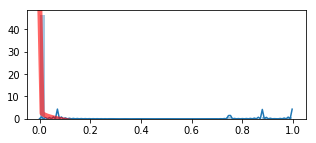

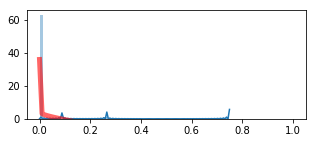

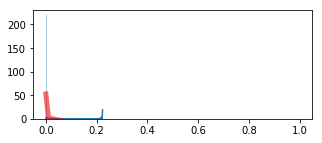

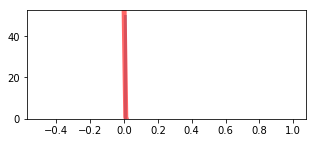

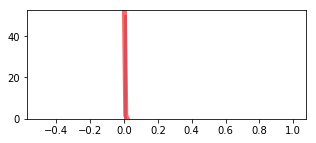

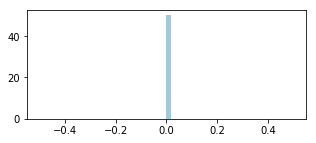

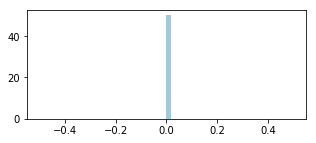

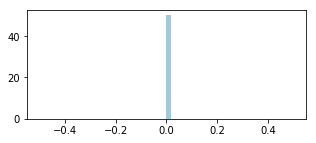

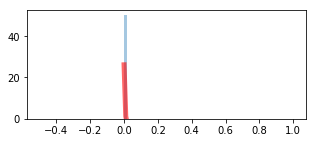

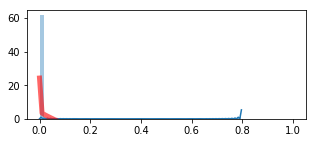

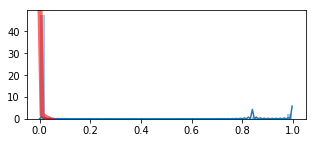

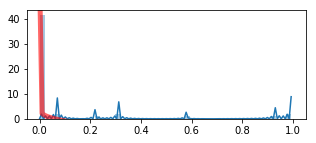

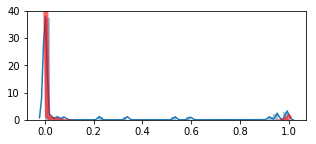

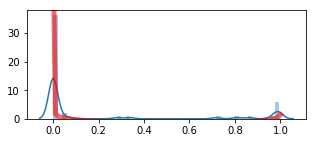

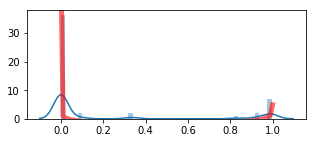

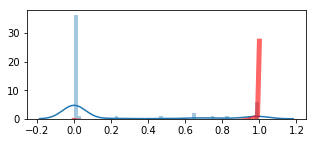

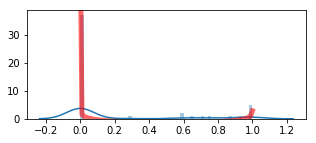

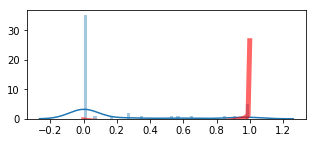

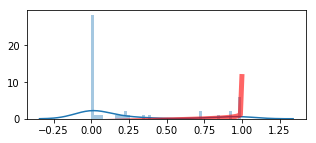

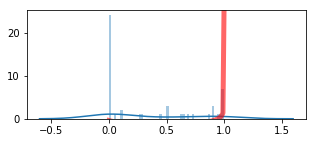

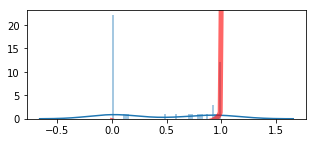

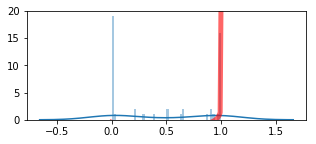

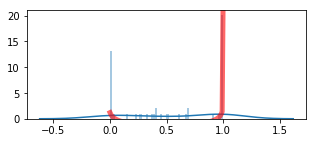

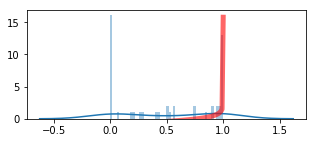

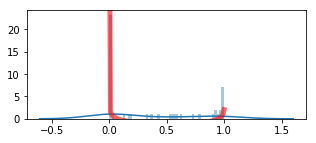

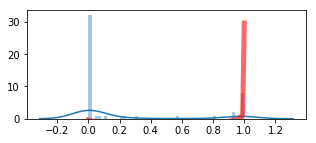

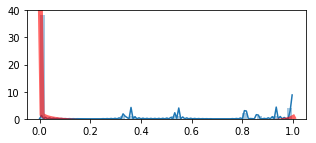

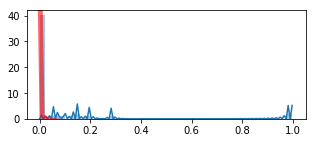

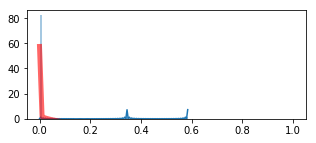

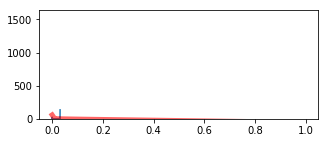

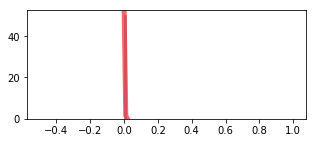

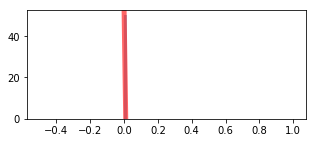

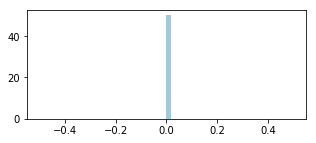

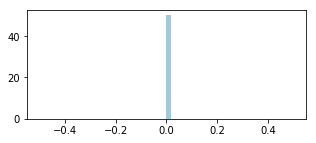

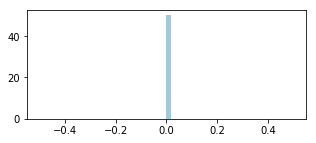

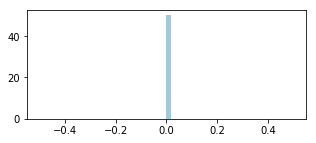

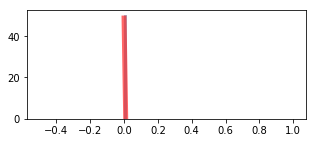

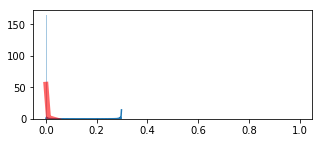

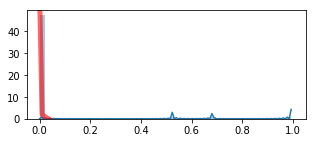

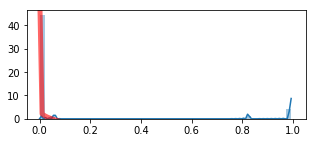

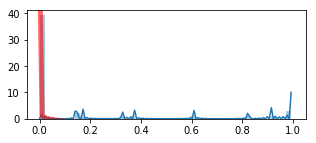

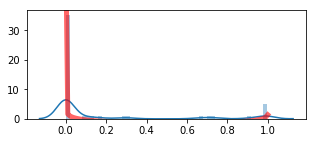

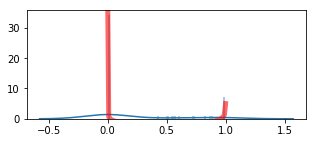

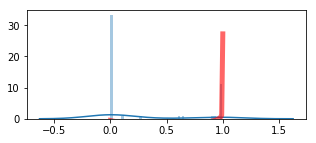

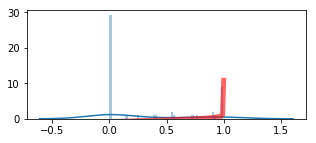

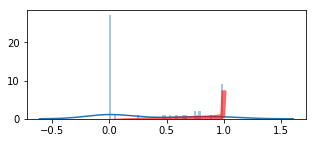

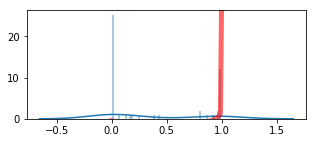

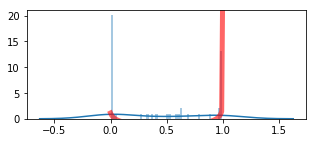

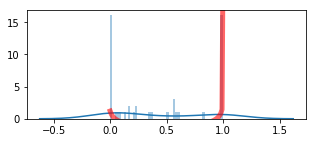

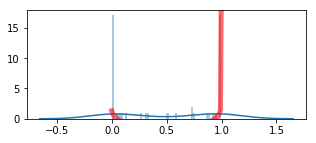

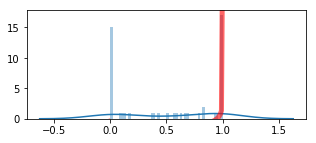

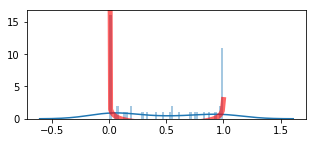

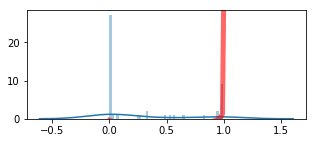

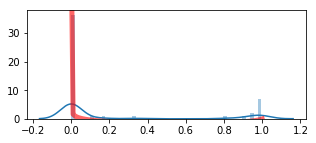

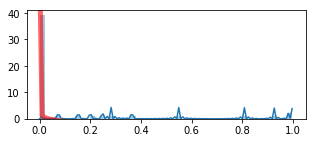

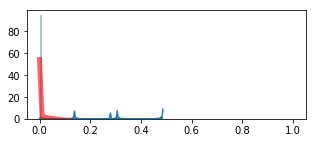

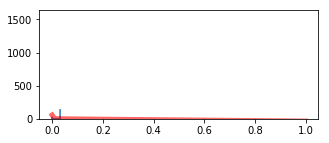

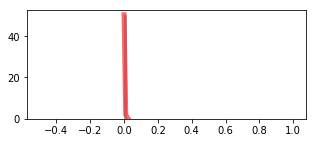

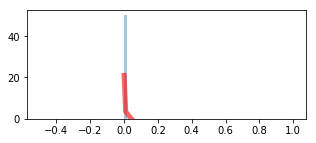

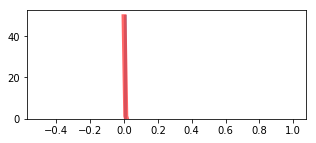

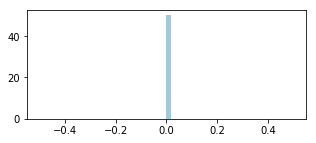

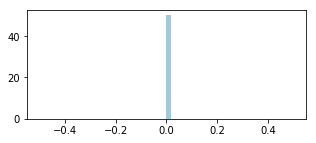

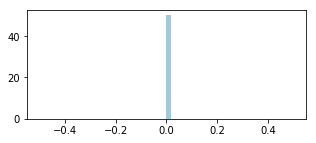

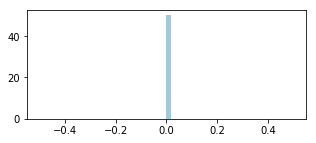

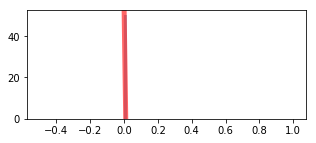

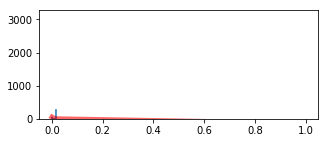

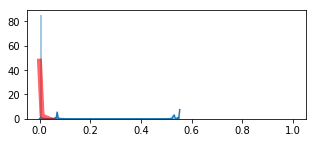

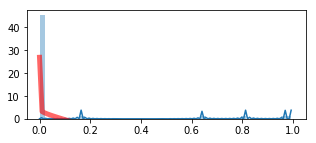

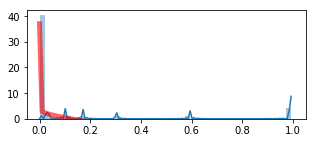

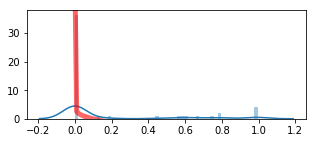

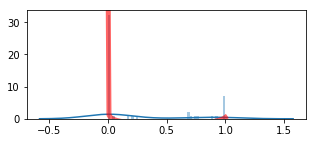

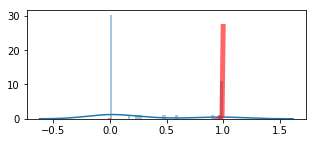

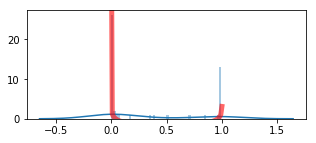

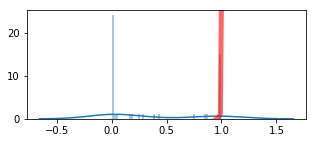

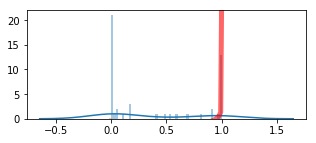

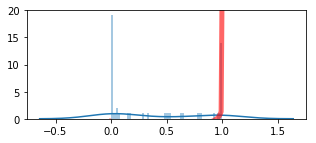

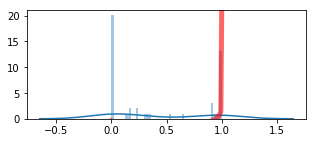

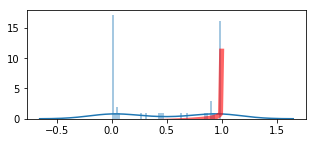

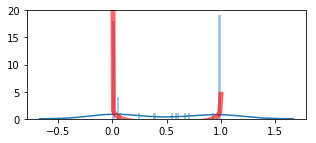

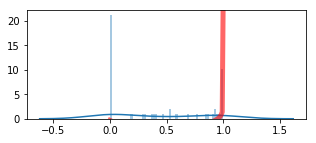

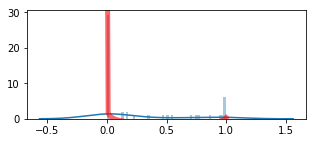

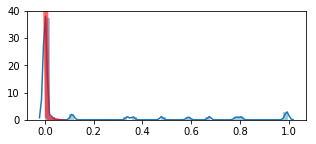

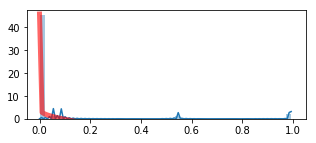

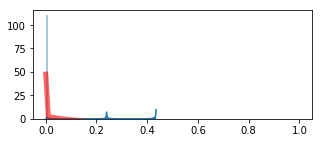

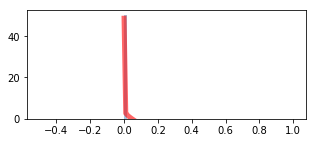

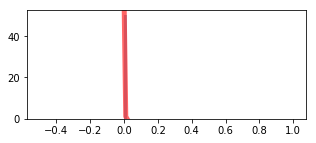

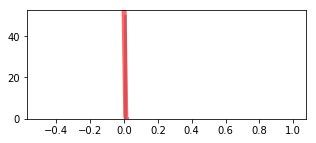

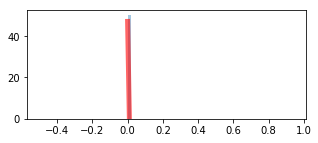

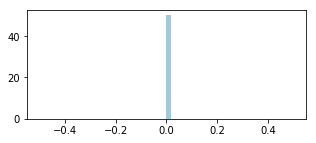

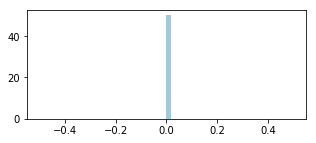

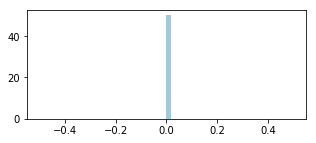

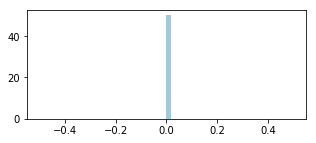

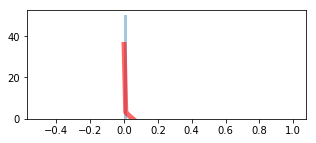

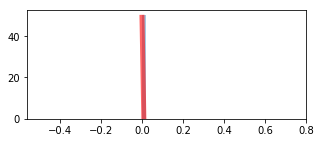

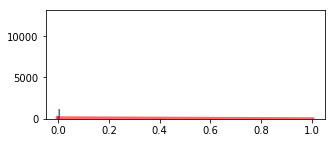

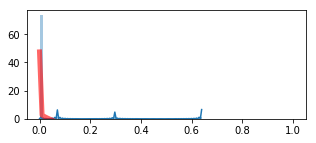

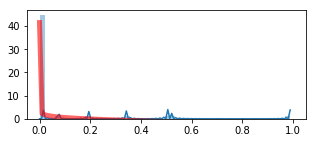

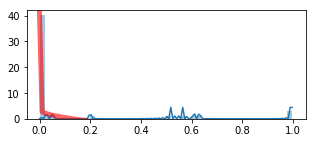

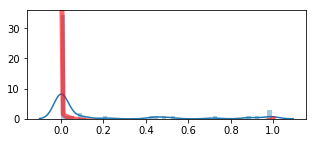

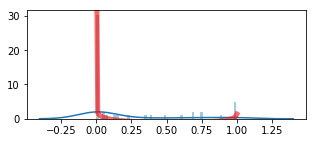

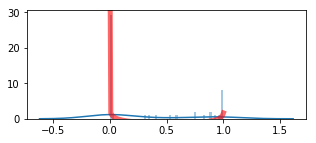

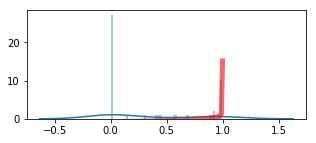

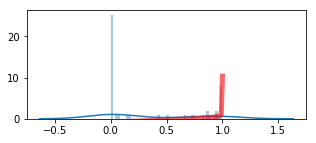

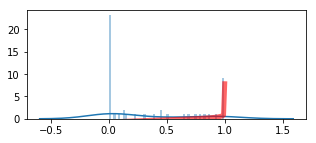

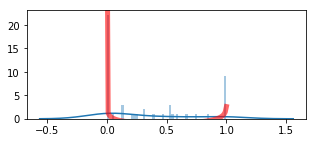

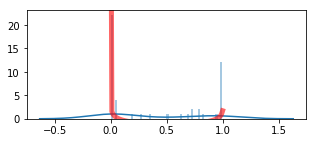

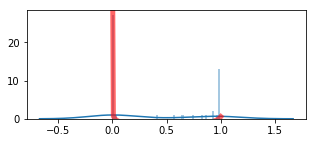

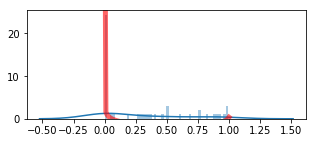

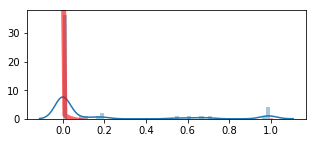

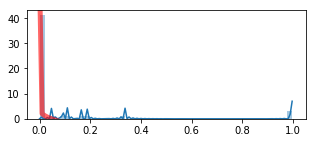

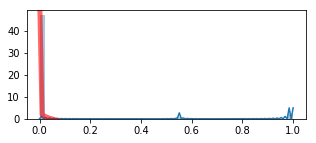

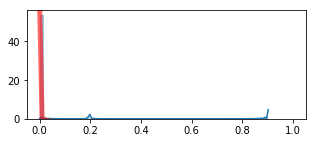

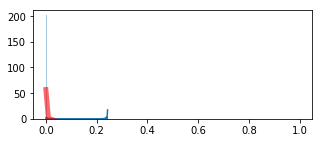

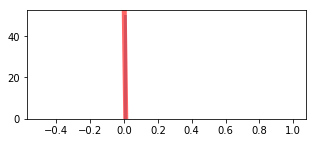

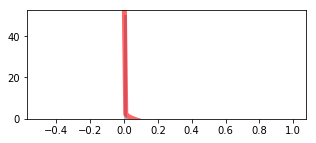

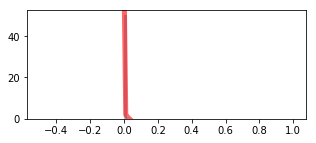

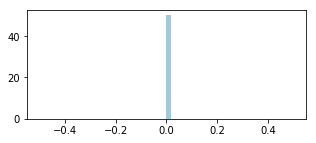

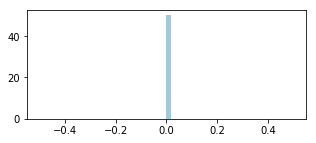

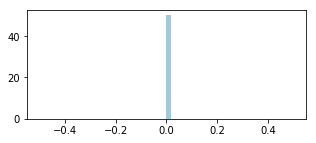

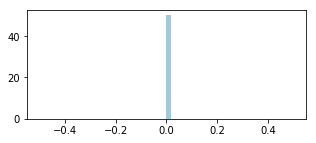

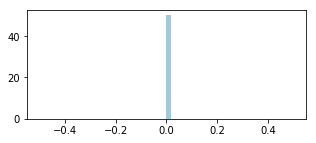

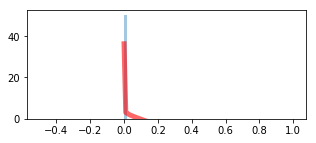

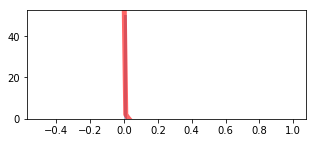

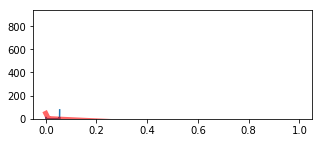

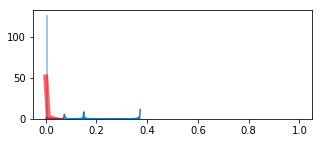

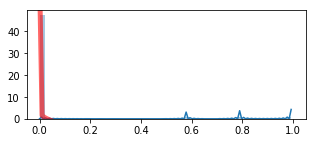

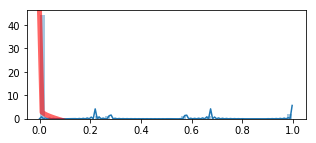

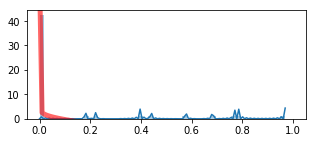

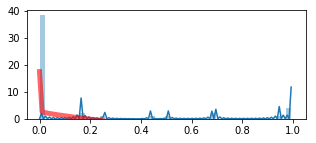

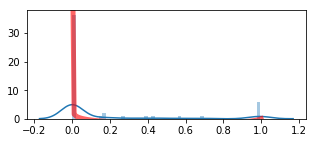

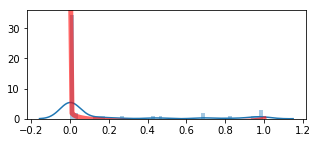

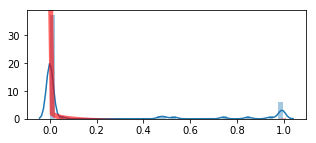

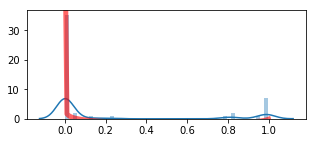

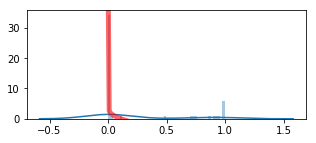

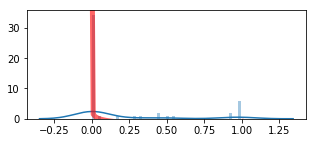

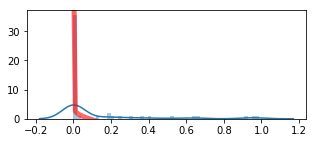

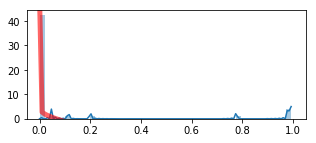

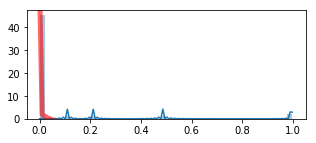

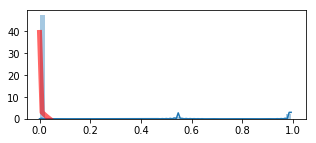

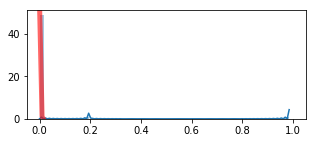

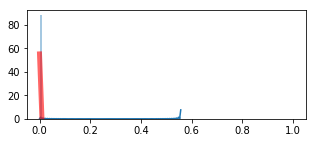

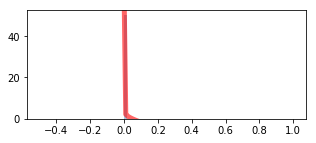

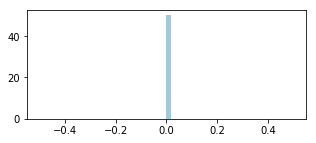

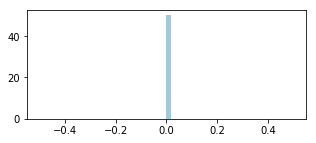

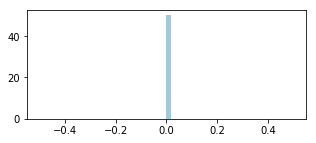

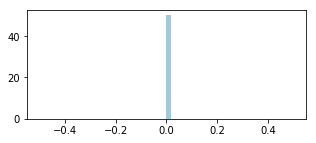

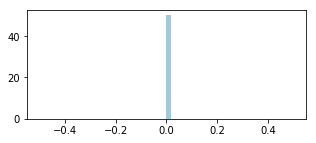

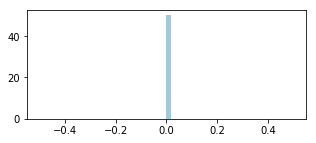

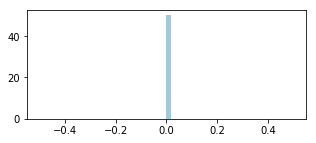

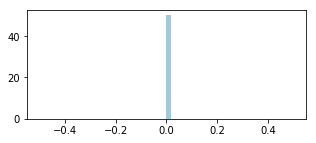

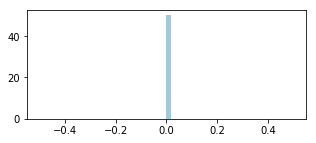

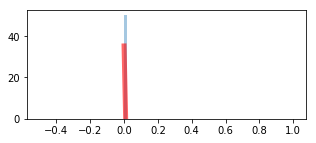

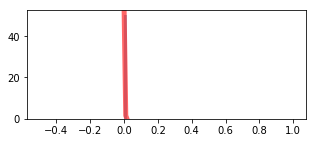

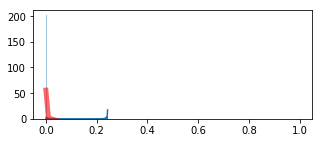

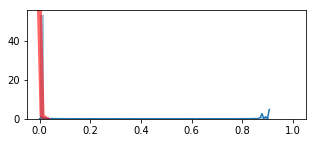

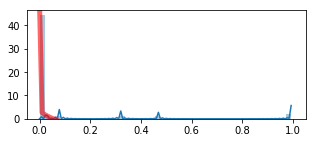

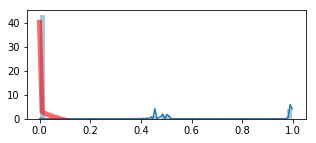

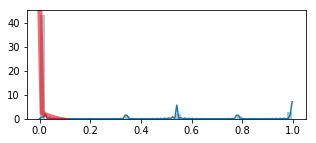

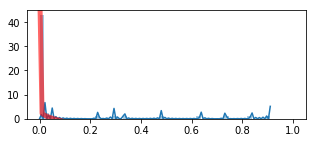

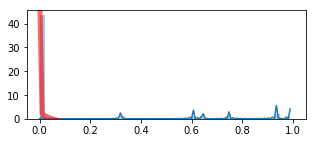

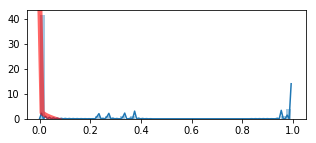

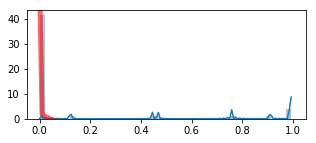

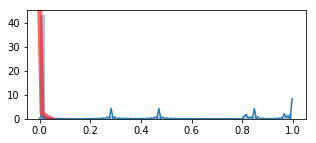

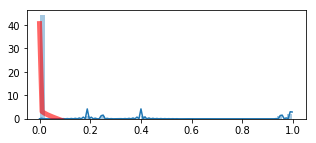

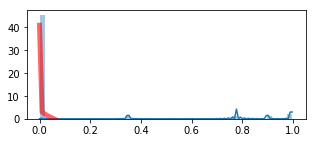

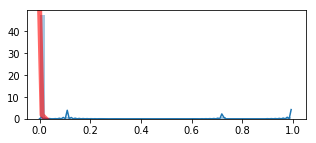

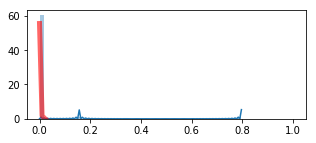

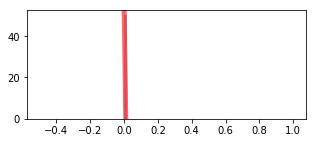

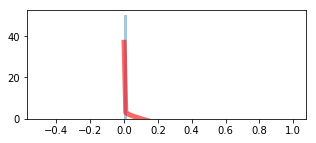

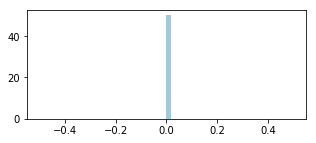

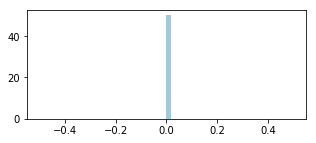

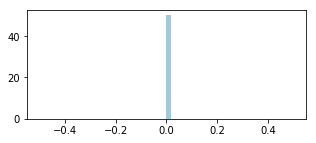

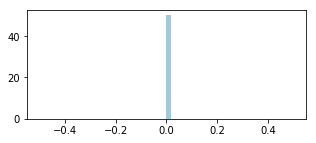

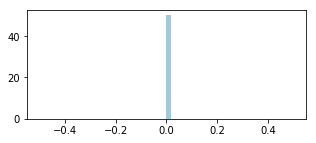

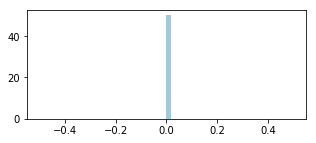

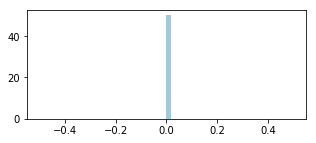

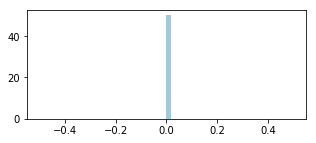

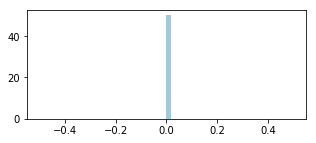

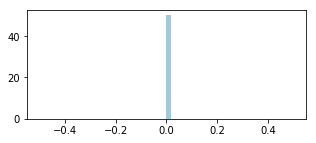

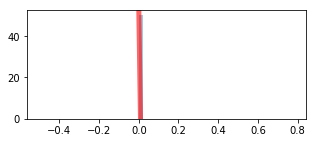

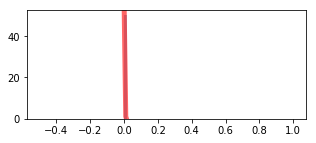

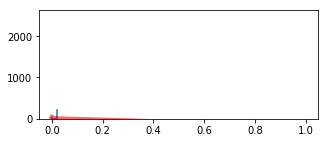

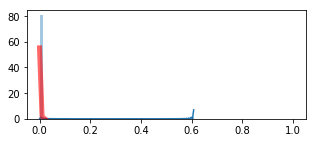

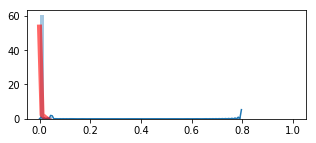

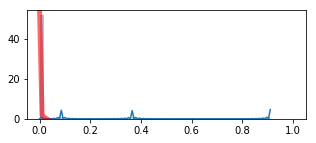

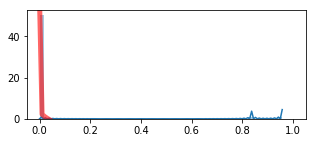

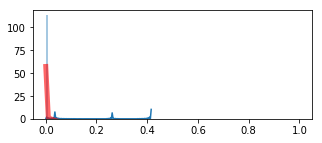

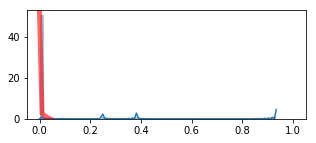

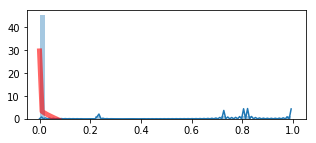

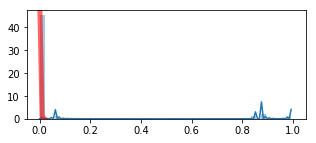

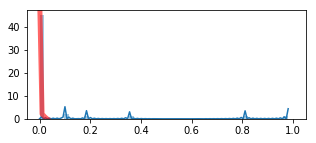

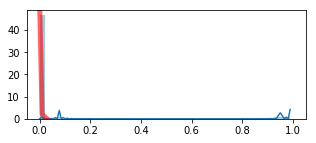

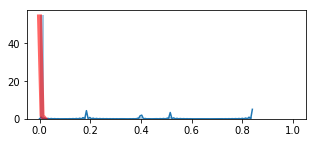

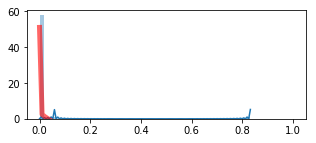

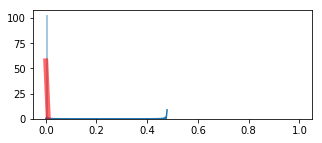

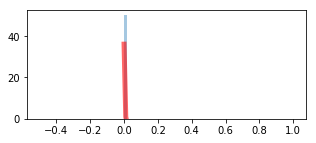

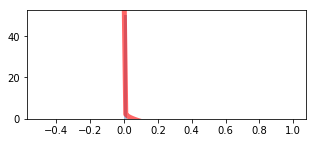

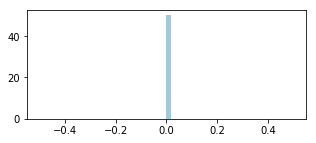

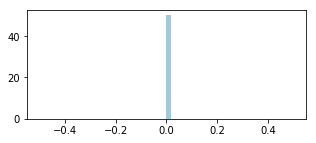

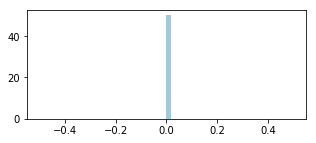

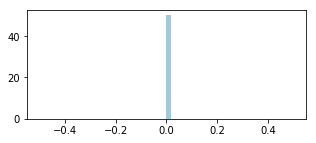

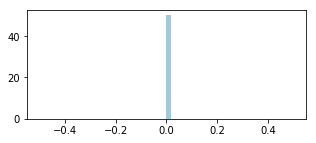

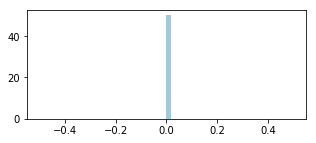

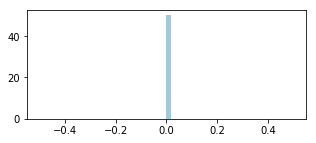

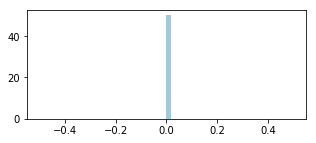

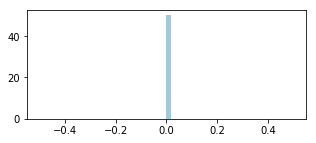

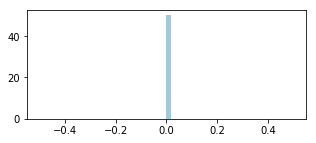

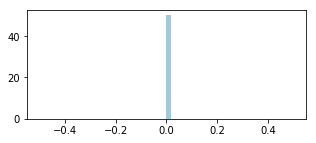

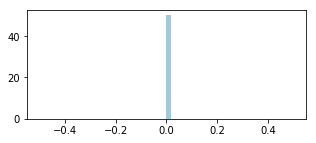

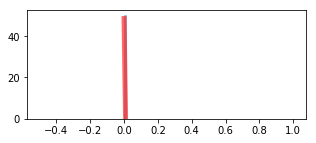

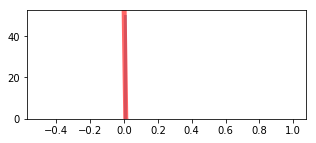

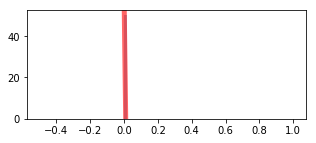

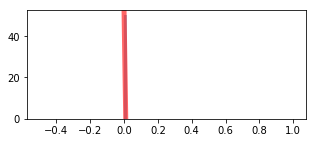

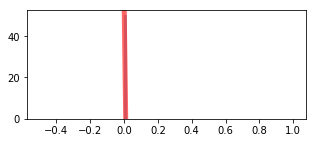

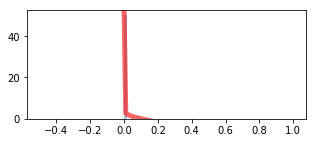

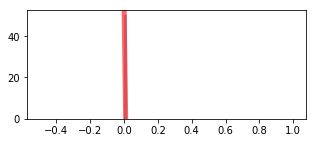

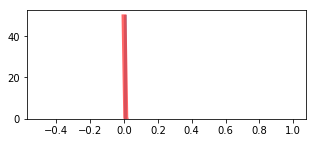

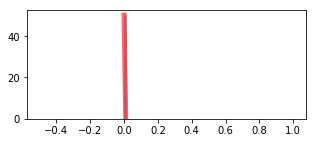

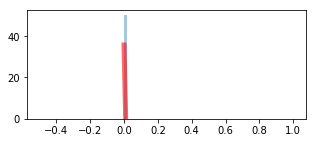

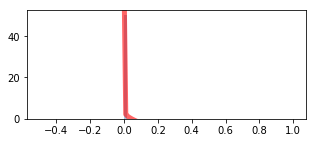

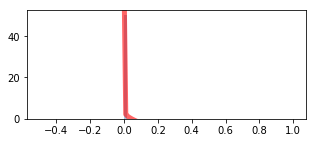

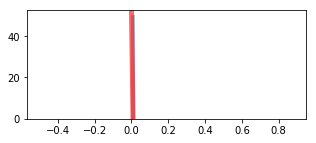

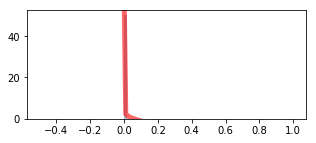

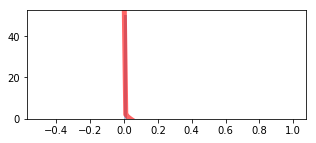

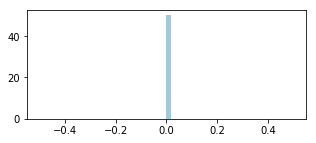

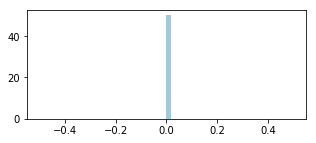

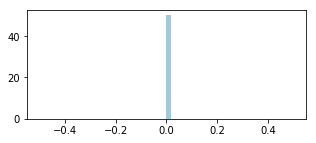

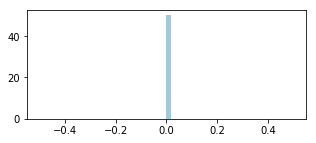

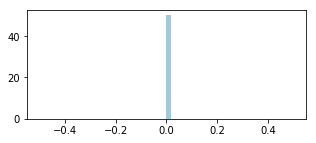

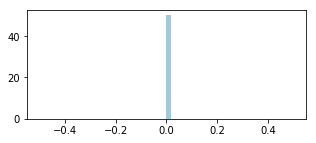

In [81]:
import seaborn as sns
#a,b,c,d=beta.fit(Xtrain[:,392],loc=0, scale=1)
for i in range(np.shape(Xtrain)[1]):  #int(np.sqrt(np.shape(Xtrain)[1]))
    
    i=i
    plt.figure(figsize=(5,2))
    sns.distplot(Xtrain[:,i],bins=50)
    x = np.linspace(0.0,1.0,100)
    plt.plot(x, beta.logpdf(x, alpha_[i], beta_[i],c1_[i],d1_[i]),'r-', lw=5, alpha=0.6, label='beta pdf')
    plt.show()

In [102]:
from scipy.stats import norm,beta,weibull_min

alpha_=[]
beta_=[]
c1_=[]
d1_=[]

for i in range(np.shape(Xtrain)[1]):
    
    a,b,c=weibull_min.fit(Xtrain[:,i],loc=0,scale=1)
    
    alpha_.append(a)
#    beta_.append(b)

    
    

In [105]:
np.shape(alpha_)
alpha_

[0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400882599,
 0.2044717400

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\niava\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: operands could not be broadcast together with shapes (3,) (100,) 

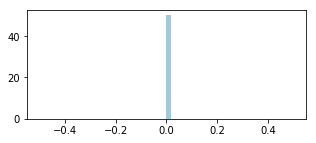

In [100]:
import seaborn as sns
#a,b,c,d=beta.fit(Xtrain[:,392],loc=0, scale=1)
for i in range(np.shape(Xtrain)[1]):  #int(np.sqrt(np.shape(Xtrain)[1]))
    
    i=i
    plt.figure(figsize=(5,2))
    sns.distplot(Xtrain[:,i],bins=50)
    x = np.linspace(0.0,1.0,100)
    plt.plot(x, weibull_min.pdf(x, alpha_[i]),'r-', lw=5, alpha=0.6, label='weibull pdf')
    plt.show()

In [101]:
weibull_min.fit(Xtrain[:,200])

(0.2044717400882599, -1.0156667046037815e-29, 1.1273632234689426)

In [106]:
alpha__=[]
beta__=[]
c1__=[]
d1__=[]   


for j in range(np.shape(Xtrain)[1]):

    a,b,c=weibull_min.fit(Xtrain[:,j],loc=0, scale=1)

    alpha__.append(a)
    beta__.append(b)
    c1__.append(c)
    #d1__.append(d)   

#self.alpha_.append(np.array(alpha__))
#self.beta_.append(np.array(beta__)+smoothing)
#self.c1_.append(c1__)
#self.d1_.append(d1__)  





In [112]:
np.shape(alpha__)

(784,)

(784,)


C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\niava\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1642: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


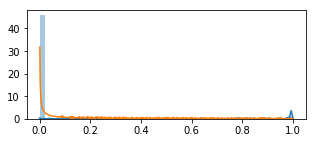

(784,)


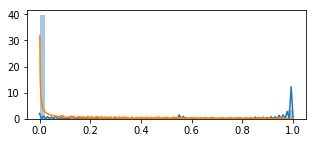

(784,)


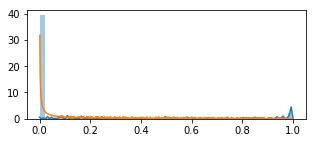

(784,)


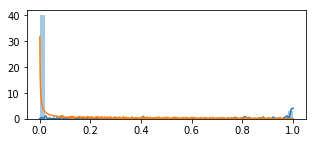

(784,)


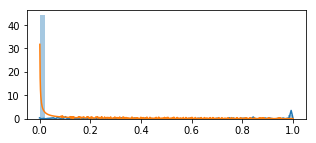

(784,)


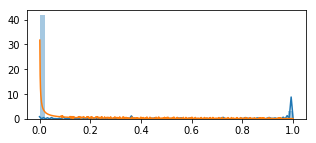

(784,)


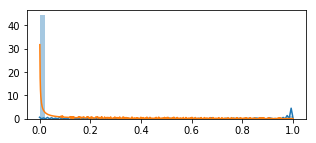

(784,)


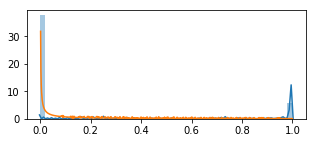

(784,)


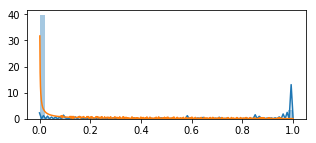

(784,)


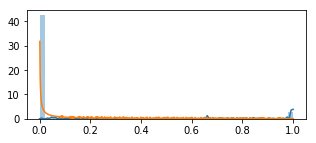

(784,)


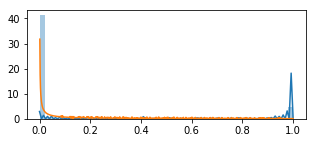

(784,)


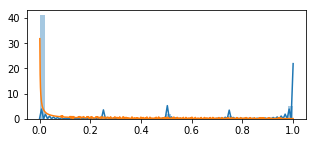

(784,)


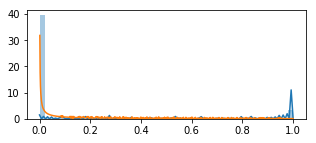

(784,)


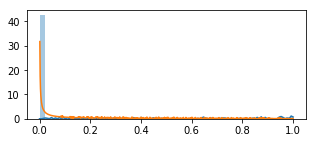

(784,)


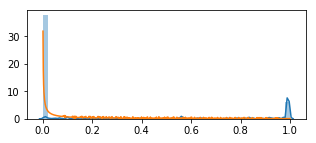

(784,)


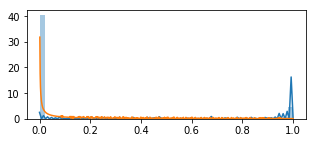

(784,)


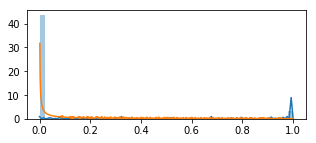

(784,)


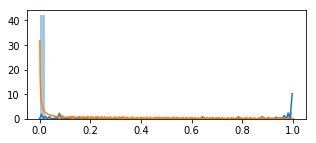

(784,)


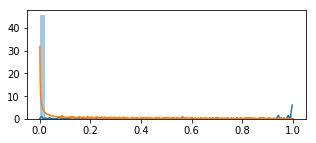

(784,)


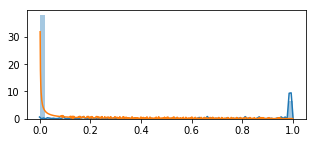

(784,)


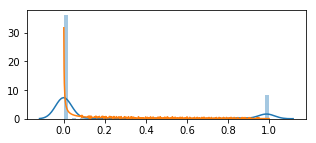

(784,)


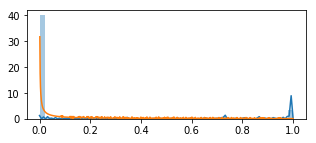

(784,)


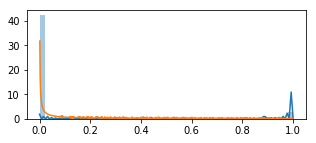

(784,)


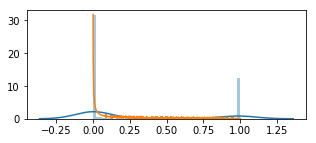

(784,)


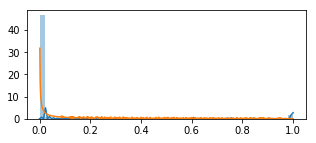

(784,)


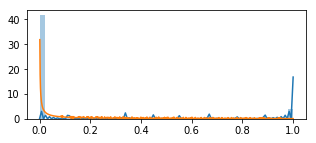

(784,)


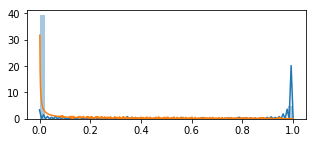

(784,)


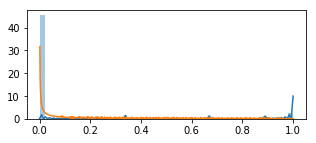

(784,)


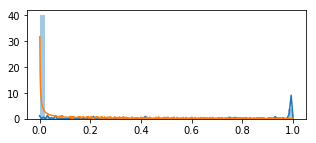

(784,)


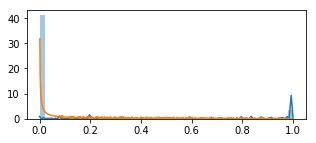

(784,)


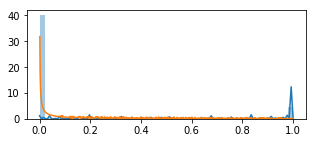

(784,)


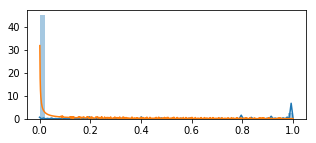

(784,)


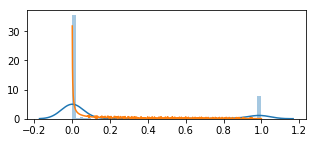

(784,)


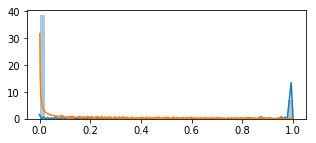

(784,)


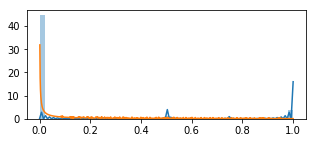

(784,)


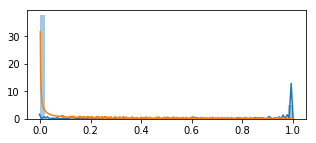

(784,)


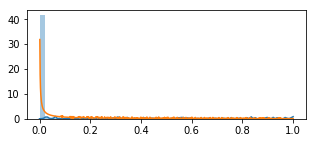

(784,)


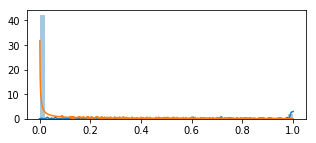

(784,)


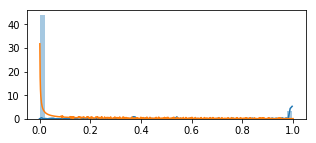

(784,)


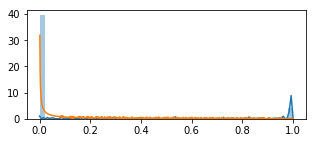

(784,)


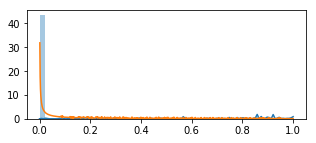

(784,)


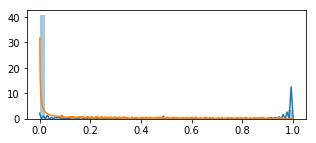

(784,)


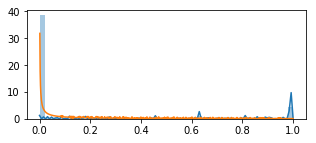

(784,)


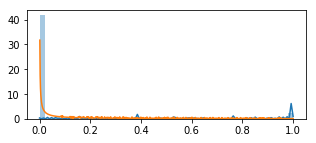

(784,)


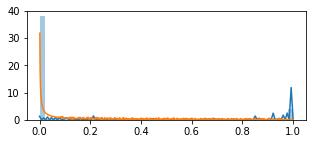

(784,)


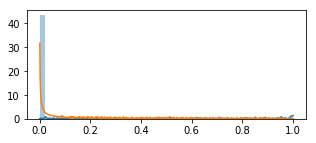

(784,)


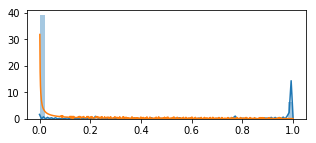

(784,)


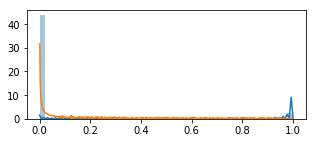

(784,)


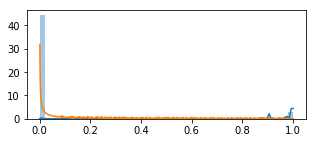

(784,)


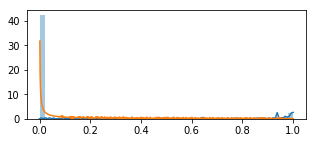

In [115]:
for i,xx in enumerate(Xtrain):
    
    print(np.shape(xx))
    plt.figure(figsize=(5,2))
    sns.distplot(xx,bins=50)
    x = np.linspace(0.0,1.0,784)
    plt.plot(x, weibull_min.pdf(x, alpha__))
    plt.show()